## RC studies 2022-2023

In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import uproot
import uproot3
import root_pandas as rpd
from root_pandas import read_root
from matplotlib import rc
#import cupy as cp, math, pylab
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.pyplot import imshow
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
rc('font', weight='bold')
colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'


colors2 = {}
colors2['C'] = '#9C661F'
colors2['Fe'] = '#3D59AB'
colors2['Pb']=  '#0D0D0D'

import math as m


mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'sans'
mpl.rcParams['mathtext.it'] = 'sans:italic'
mpl.rcParams['mathtext.default'] = 'it'
import numpy as np, pandas as pd, ROOT, matplotlib.pyplot as plt,matplotlib
import mplhep as hep
from scipy.optimize import curve_fit

hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'


Welcome to JupyROOT 6.22/09


/home/miguel/root_install/lib/ROOT/_facade.py:121: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  return _orig_ihook(name, *args, **kwds)


In [2]:
def sumColumn(matrix):
    return np.sum(matrix, axis=0) 


# Barack's points, extracted from 'https://arxiv.org/ftp/arxiv/papers/2004/2004.12065.pdf', page 18

In [3]:
y_scmookler={}
x_scmookler = np.array([  0.220, 0.247, 0.260,0.273,0.287,0.3,0.313,0.327,0.340,0.353,0.367,0.380,
                        0.393,0.407,0.420,0.433,0.447,0.460,0.473,0.487,0.500,0.513,0.527,0.540,0.553,0.580  ])

y_scmookler['C'] = np.array([1.0549019607843138, 1.032434640522876, 1.0226307189542483, 1.0185457516339869, 
                             1.0095588235294117, 1.0058823529411764, 1.0083333333333333, 1.0091503267973856, 
                             1.0054738562091503, 0.9940359477124183, 0.9895424836601308, 0.9858660130718955,
                             0.9760620915032681, 0.9915849673202615, 0.9805555555555556, 0.9593137254901961, 
                             0.9576797385620915, 0.950326797385621, 0.956045751633987, 0.9401143790849673, 
                             0.9388888888888889, 0.9482843137254902, 0.936437908496732, 0.9311274509803923, 
                             0.9062091503267975, 0.9262254901960785])
y_scmookler['Fe'] = np.array([ 1.0179276315789474, 1.0105263157894737, 1.005592105263158, 1.003125, 
                              0.9957236842105264, 0.9907894736842106, 0.9916118421052632, 0.9903782894736842, 
                              0.9833881578947369, 0.9685855263157895, 0.9636513157894737, 0.958717105263158, 
                              0.9484375, 0.9578947368421054, 0.9488486842105264, 0.9282894736842106, 
                              0.9245888157894737, 0.9138980263157895, 0.918421052631579, 0.9015625, 
                              0.8921052631578947, 0.9011513157894737, 0.8797697368421054, 0.8740131578947369, 
                              0.855921052631579, 0.8879934210526317])
y_scmookler['Pb'] = np.array([ 1.015678627145086, 0.9981279251170049, 0.9879875195007801, 0.9821372854914198, 
                              0.9743369734789393, 0.9665366614664588, 0.9634165366614666, 0.9641965678627147, 
                              0.9571762870514822, 0.9446957878315134, 0.9376755070202809, 0.9310452418096725, 
                              0.9189547581903277, 0.9314352574102965, 0.9142745709828394, 0.8959438377535103, 
                              0.8959438377535103, 0.8807332293291733, 0.8861934477379096, 0.8729329173166928, 
                              0.861232449297972, 0.8616224648985961, 0.8436817472698909, 0.8393915756630266, 
                              0.812870514820593, 0.8128705148205929])
erry_scmookler={}
erry_scmookler['C']=np.array([0.053, 0.008, 0.008, 0.008,0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 
                              0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 
                              0.008, 0.008, 0.008, 0.008, 0.019, 0.047])


erry_scmookler['Fe']=np.array([0.051, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 
                               0.008, 0.008, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007, 0.007, 
                               0.007, 0.007, 0.007, 0.007, 0.017,0.045])

erry_scmookler['Pb']=np.array([0.051,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.007,
                               0.007,0.008,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.008,0.008,0.008,
                               0.017,0.041]) 

In [4]:
## there are 26 points reported
def getBarak_EMC(target):
    ## Including normalization uncertainty for C/Fe/Pb are 1.081%/1.83%/1.94% , respectively to the errors
    if target=='C':
        tot_erry_scmookler = np.sqrt(np.power(np.array(erry_scmookler['C']),2) + 
                                  np.power(np.array(y_scmookler['C'])*0.0181,2))
        y_barak = y_scmookler['C']
    if target=='Fe':    
        tot_erry_scmookler = np.sqrt(np.power(np.array(erry_scmookler['Fe']),2) + 
                                  np.power(np.array(y_scmookler['Fe'])*0.0183,2))
        y_barak = y_scmookler['Fe']
    if target=='Pb':    
        tot_erry_scmookler = np.sqrt(np.power(np.array(erry_scmookler['Pb']),2) + 
                                  np.power(np.array(y_scmookler['Pb'])*0.0194,2))
        y_barak = y_scmookler['Pb']

    return x_scmookler, tot_erry_scmookler, y_barak



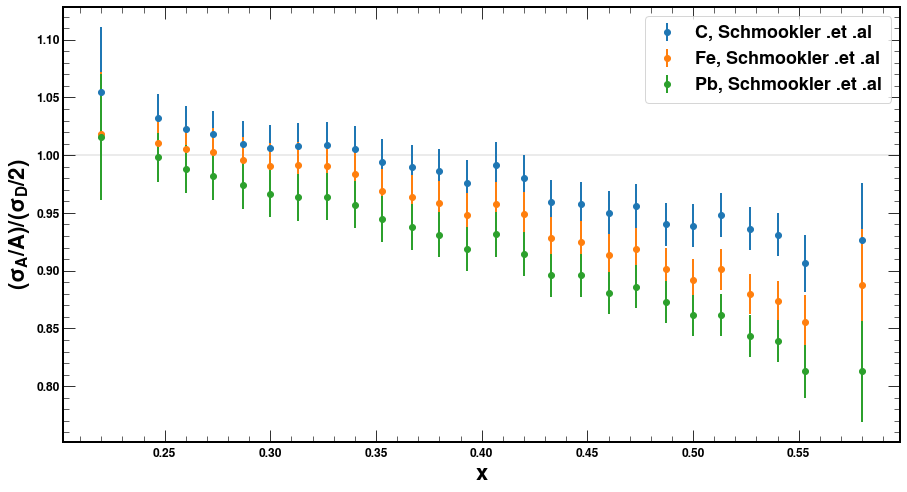

In [5]:
fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )

for target in ['C', 'Fe', 'Pb']:
    x, err, y = getBarak_EMC(target)
    plt.errorbar(x,y,yerr=err,lw=2,fmt='o',label="%s, Schmookler .et .al"%target, color=colors[target]  ) 
#plt.ylim([0.71,1.1])
#plt.xlim([0.12,0.57])
plt.xlabel('$x$',fontsize=22, loc='center', fontweight='bold')
plt.ylabel('$(\sigma_{A}/A)/(\sigma_{D}/2)$',fontsize=22, loc='center', fontweight='bold')
plt.legend(loc='best',ncol=1,frameon=True,fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()



# data from A and D for all bins in (x,q2) phase space.

In [6]:
y = {}
y['C_EMC_raw_ST_w20_q210']   = np.array([ 724087 , 958812 , 459196 , 194020 , 3630 , 0 , 0 , 0 , 0 , 0 , 0 , 7641 , 724700 , 736131 , 498019 , 235067 , 2387 , 0 , 0 , 0 , 0 , 0 , 0 , 49540 , 557220 , 484483 , 339576 , 145701 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 88120 , 380378 , 318091 , 231239 , 67230 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 98944 , 250406 , 195839 , 156302 , 21820 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 98146 , 165722 , 121989 , 74630 , 734 , 0 , 0 , 0 , 0 , 0 , 0 , 3041 , 84892 , 105703 , 85299 , 26930 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 7659 , 60746 , 65743 , 54718 , 2946 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 5545 , 40478 , 40358 , 19538 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 3321 , 26476 , 23064 , 1016 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1486 , 16343 , 7639 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 438 , 7306 ])
y['Fe_EMC_raw_ST_w20_q210']  = np.array([ 1.12675e+06 , 1.52529e+06 , 738754 , 312334 , 5774 , 0 , 0 , 0 , 0 , 0 , 0 , 11475 , 1.12519e+06 , 1.16471e+06 , 782844 , 368509 , 3653 , 0 , 0 , 0 , 0 , 0 , 0 , 73034 , 852045 , 767413 , 539129 , 230891 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 132979 , 567915 , 484668 , 362189 , 105098 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 147198 , 370248 , 292319 , 232425 , 32409 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 145559 , 239400 , 178352 , 109622 , 1152 , 0 , 0 , 0 , 0 , 0 , 0 , 4195 , 123888 , 151151 , 123311 , 39303 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 10038 , 87518 , 93315 , 77012 , 4213 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 7369 , 57191 , 57268 , 26392 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 4283 , 36419 , 34421 , 1702 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1834 , 21833 , 10728 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 479 , 9289 ])
y['Pb_EMC_raw_ST_w20_q210']  = np.array([ 581737 , 770470 , 365449 , 153654 , 2880 , 0 , 0 , 0 , 0 , 0 , 0 , 6064 , 570586 , 579618 , 386816 , 181870 , 1689 , 0 , 0 , 0 , 0 , 0 , 0 , 37615 , 421714 , 373511 , 262493 , 111923 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 65644 , 277457 , 234436 , 173821 , 50934 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 74098 , 177621 , 138945 , 110403 , 15195 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 72370 , 114327 , 83414 , 51144 , 526 , 0 , 0 , 0 , 0 , 0 , 0 , 2045 , 60779 , 71790 , 57159 , 18022 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 5294 , 42123 , 44711 , 35083 , 1936 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 3818 , 27070 , 27244 , 12340 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2184 , 16986 , 15811 , 705 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 887 , 10329 , 4888 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 256 , 4494  ])

y['C_EMC_raw_LT_w20_q210']   = np.array([ 795592 , 1.05379e+06 , 514437 , 224593 , 4340 , 0 , 0 , 0 , 0 , 0 , 0 , 8550 , 791875 , 814924 , 553326 , 267165 , 2869 , 0 , 0 , 0 , 0 , 0 , 0 , 54967 , 611174 , 542478 , 384200 , 162216 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 93124 , 420891 , 358294 , 270222 , 80500 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 105918 , 281275 , 223557 , 179894 , 25862 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 107171 , 185945 , 143855 , 85735 , 770 , 0 , 0 , 0 , 0 , 0 , 0 , 3223 , 93436 , 118609 , 103472 , 34127 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 6893 , 66596 , 74197 , 64899 , 3581 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 5041 , 44843 , 46432 , 22607 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2705 , 29308 , 27936 , 1161 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1078 , 18050 , 9486 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 206 , 7130 ])
y['Fe_EMC_raw_LT_w20_q210']  = np.array([1.1004e+06 , 1.54348e+06 , 781240 , 349322 , 6774 , 0 , 0 , 0 , 0 , 0 , 0 , 11125 , 1.10689e+06 , 1.21153e+06 , 833894 , 403866 , 4317 , 0 , 0 , 0 , 0 , 0 , 0 , 71899 , 851804 , 814067 , 593111 , 255015 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 125209 , 587568 , 524121 , 410389 , 122517 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 143317 , 390944 , 322799 , 264694 , 37322 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 145764 , 259894 , 208125 , 126524 , 1298 , 0 , 0 , 0 , 0 , 0 , 0 , 3862 , 126150 , 166270 , 147279 , 48927 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 8445 , 90472 , 104540 , 90943 , 5239 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 6105 , 60999 , 67114 , 30829 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 3288 , 39672 , 42175 , 1977 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1260 , 24062 , 13617 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 282 , 9168 ])
y['Pb_EMC_raw_LT_w20_q210']  = np.array([ 1.19046e+06 , 1.60773e+06 , 797072 , 353741 , 6961 , 0 , 0 , 0 , 0 , 0 , 0 , 12156 , 1.1811e+06 , 1.24929e+06 , 855406 , 414342 , 4485 , 0 , 0 , 0 , 0 , 0 , 0 , 77966 , 896976 , 831194 , 603047 , 258279 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 133865 , 609085 , 534601 , 417152 , 124525 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 155562 , 404567 , 326452 , 267430 , 38027 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 157387 , 268066 , 209861 , 127067 , 1354 , 0 , 0 , 0 , 0 , 0 , 0 , 4288 , 137197 , 172434 , 148611 , 48586 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 9607 , 96692 , 110055 , 92097 , 5203 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 6955 , 64923 , 70144 , 32423 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 3799 , 41990 , 42848 , 1853 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1437 , 25606 , 13973 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 296 , 10042 ])
   
y['C_EMC_raw_ST_w18_q215']    = np.array([ 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 49540 , 557220 , 484483 , 339576 , 257924 , 185175 , 36936 , 0 , 0 , 0 , 0 , 0 , 0 , 88120 , 380378 , 318091 , 231269 , 164619 , 115555 , 12929 , 0 , 0 , 0 , 0 , 0 , 0 , 98944 , 250406 , 195839 , 161791 , 117864 , 70706 , 2067 , 0 , 0 , 0 , 0 , 0 , 0 , 98146 , 165722 , 121989 , 96573 , 82305 , 34966 , 0 , 0 , 0 , 0 , 0 , 0 , 3041 , 84892 , 105703 , 85299 , 57773 , 44955 , 6503 , 0 , 0 , 0 , 0 , 0 , 0 , 7659 , 60746 , 65743 , 58647 , 42721 , 22007 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 5545 , 40478 , 40358 , 37524 , 29393 , 5655 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 3321 , 26476 , 24883 , 22922 , 14111 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1486 , 16343 , 16138 , 13621 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 438 , 9444 , 10765 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 44 , 4670  ])
y['Fe_EMC_raw_ST_w18_q215']   = np.array([ 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 73034 , 852045 , 767413 , 539129 , 403417 , 286933 , 56066 , 0 , 0 , 0 , 0 , 0 , 0 , 132979 , 567915 , 484668 , 362233 , 263474 , 185929 , 22020 , 0 , 0 , 0 , 0 , 0 , 0 , 147198 , 370248 , 292319 , 240565 , 178645 , 108431 , 3089 , 0 , 0 , 0 , 0 , 0 , 0 , 145559 , 239400 , 178352 , 141498 , 118868 , 50702 , 0 , 0 , 0 , 0 , 0 , 0 , 4195 , 123888 , 151151 , 123311 , 84687 , 65216 , 9501 , 0 , 0 , 0 , 0 , 0 , 0 , 10038 , 87518 , 93315 , 82771 , 60033 , 31186 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 7369 , 57191 , 57268 , 51636 , 40351 , 7977 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 4283 , 36419 , 36709 , 30844 , 19125 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1834 , 21833 , 23623 , 18749 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 479 , 12143 , 15268 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 52 , 5836  ])
y['Pb_EMC_raw_ST_w18_q215']   = np.array([ 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 37615 , 421714 , 373511 , 262493 , 196740 , 139790 , 27236 , 0 , 0 , 0 , 0 , 0 , 0 , 65644 , 277457 , 234436 , 173851 , 126695 , 88861 , 10367 , 0 , 0 , 0 , 0 , 0 , 0 , 74098 , 177621 , 138945 , 114260 , 84694 , 51244 , 1445 , 0 , 0 , 0 , 0 , 0 , 0 , 72370 , 114327 , 83414 , 65638 , 55410 , 23504 , 0 , 0 , 0 , 0 , 0 , 0 , 2045 , 60779 , 71790 , 57159 , 38898 , 30032 , 4198 , 0 , 0 , 0 , 0 , 0 , 0 , 5294 , 42123 , 44711 , 37652 , 27552 , 14026 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 3818 , 27070 , 27244 , 23741 , 18032 , 3384 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2184 , 16986 , 16941 , 14370 , 8523 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 887 , 10329 , 10773 , 8719 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 256 , 5769 , 6702 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 39 , 2722 ])
    
y['C_EMC_raw_LT_w18_q215']   = np.array([0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 54967 , 611174 , 542478 , 384200 , 290793 , 218388 , 41907 , 0 , 0 , 0 , 0 , 0 , 0 , 93124 , 420891 , 358294 , 270249 , 192179 , 133444 , 15666 , 0 , 0 , 0 , 0 , 0 , 0 , 105918 , 281275 , 223557 , 186136 , 142475 , 86786 , 2473 , 0 , 0 , 0 , 0 , 0 , 0 , 107171 , 185945 , 143855 , 111196 , 96751 , 42952 , 0 , 0 , 0 , 0 , 0 , 0 , 3223 , 93436 , 118609 , 103472 , 71500 , 53139 , 7187 , 0 , 0 , 0 , 0 , 0 , 0 , 6893 , 66596 , 74197 , 69923 , 53564 , 28533 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 5041 , 44843 , 46432 , 44396 , 36935 , 7205 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2705 , 29308 , 29962 , 26924 , 17090 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1078 , 18050 , 19815 , 16057 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 206 , 9676 , 13532 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 22 , 4357  ])
y['Fe_EMC_raw_LT_w18_q215']  = np.array([0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 71899 , 851804 , 814067 , 593111 , 449156 , 334993 , 64291 , 0 , 0 , 0 , 0 , 0 , 0 , 125209 , 587568 , 524121 , 410457 , 303763 , 218324 , 26012 , 0 , 0 , 0 , 0 , 0 , 0 , 143317 , 390944 , 322799 , 274266 , 213706 , 132335 , 3803 , 0 , 0 , 0 , 0 , 0 , 0 , 145764 , 259894 , 208125 , 162987 , 140687 , 62729 , 0 , 0 , 0 , 0 , 0 , 0 , 3862 , 126150 , 166270 , 147279 , 104534 , 79053 , 10827 , 0 , 0 , 0 , 0 , 0 , 0 , 8445 , 90472 , 104540 , 97961 , 76575 , 41427 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 6105 , 60999 , 67114 , 62071 , 51727 , 10301 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 3288 , 39672 , 44852 , 37876 , 24091 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1260 , 24062 , 30169 , 23605 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 282 , 12848 , 19981 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 23 , 5795 ])
y['Pb_EMC_raw_LT_w18_q215']  = np.array([0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 77966 , 896976 , 831194 , 603047 , 456584 , 341615 , 65244 , 0 , 0 , 0 , 0 , 0 , 0 , 133865 , 609085 , 534601 , 417199 , 307255 , 219627 , 26115 , 0 , 0 , 0 , 0 , 0 , 0 , 155562 , 404567 , 326452 , 276956 , 217127 , 133725 , 3884 , 0 , 0 , 0 , 0 , 0 , 0 , 157387 , 268066 , 209861 , 163860 , 142012 , 63292 , 0 , 0 , 0 , 0 , 0 , 0 , 4288 , 137197 , 172434 , 148611 , 103503 , 79035 , 11109 , 0 , 0 , 0 , 0 , 0 , 0 , 9607 , 96692 , 110055 , 99128 , 76512 , 41179 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 6955 , 64923 , 70144 , 63663 , 51941 , 10389 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 3799 , 41990 , 45844 , 39823 , 24262 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1437 , 25606 , 30387 , 24347 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 296 , 13937 , 20122 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 24 , 6132 ])
    


In [7]:

x = np.array([     1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 
                   18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 
                   33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 
                   48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 
                   63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 
                   78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 
                   93 , 94 , 95 , 96 , 97 , 98 , 99 , 100 , 101 , 102 , 103 , 104 , 105 , 106 , 
                   107 , 108 , 109 , 110 , 111 , 112 , 113 , 114 , 115 , 116 , 117 , 118 , 119 ,
                   120 , 121 , 122 , 123 , 124 , 125 , 126 , 127 , 128 , 129 , 130 , 131,132 ])


x_2 = np.array([     1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 
                   18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 
                   33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 
                   48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 
                   63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 
                   78 , 79 , 80 , 81 , 82 , 83 , 84 , 85 , 86 , 87 , 88 , 89 , 90 , 91 , 92 , 
                   93 ,  94  , 95   , 96  , 97 , 98 ,   99 , 100 , 101 , 102 , 103 , 104 , 105 , 106 , 
                   107 , 108 , 109 , 110 , 111 , 112 , 113 , 114 , 115 , 116 , 117 , 118 , 119 ,
                   120 , 121 , 122 , 123 , 124 , 125 , 126 , 127 , 128 , 129 , 130 , 131 , 132, 
                   133 , 134 , 135 , 136 , 137 , 138 , 139 , 140 , 141 , 142 , 143 , 144, 145, 
                   146 , 147 , 148 , 149 , 150 , 151 , 152  ,153 , 154 , 155 ,156  ])



y['D_external_w18_q215_1Dim_RC'] = np.array([          0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,   1.34366,   1.20134,   1.09544,   1.04574,   1.01526,  0.993428,  0.984241,         0,         0,         0,         0,
         0,         0,   1.27048,   1.15928,   1.07341,   1.03128,   1.00656,  0.987462,  0.978767,         0,         0,         0,
         0,         0,         0,   1.22136,   1.12473,   1.05641,   1.02102,  0.995911,  0.981549,  0.973612,         0,         0,
         0,         0,         0,         0,   1.18615,   1.09374,   1.04117,    1.0108,    0.9898,  0.977341,         0,         0,
         0,         0,         0,         0,   1.23671,   1.15413,    1.0711,   1.02875,   1.00038,  0.982109,  0.973266,         0,
         0,         0,         0,         0,         0,   1.18935,   1.11931,    1.0506,    1.0164,  0.994024,  0.978454,         0,
         0,         0,         0,         0,         0,         0,   1.14027,   1.08835,   1.03769,   1.00577,  0.985241,  0.973566,
         0,         0,         0,         0,         0,         0,         0,    1.1007,    1.0643,   1.02305,   0.99724,  0.979499,
         0,         0,         0,         0,         0,         0,         0,         0,    1.0729,   1.04283,   1.01443,  0.988145,
         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0486,   1.02705,   1.00246,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.03219,   1.01042])
y['C_external_w18_q215_1Dim_RC'] = np.array([         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,   1.38508,   1.23051,   1.10386,   1.04057,   1.00243,  0.975005,  0.960251,         0,         0,         0,         0,
         0,         0,   1.30919,     1.181,   1.07609,   1.02564,  0.991424,  0.966141,  0.954092,         0,         0,         0,
         0,         0,         0,   1.25347,   1.13998,   1.05383,   1.01089,  0.981223,  0.959065,   0.94919,         0,         0,
         0,         0,         0,         0,   1.21242,   1.10206,   1.03735,  0.997284,  0.970602,  0.953345,         0,         0,
         0,         0,         0,         0,   1.27359,   1.17563,   1.07298,    1.0211,  0.987131,  0.960689,  0.949169,         0,
         0,         0,         0,         0,         0,   1.22256,   1.13443,   1.05001,   1.00604,  0.976067,  0.955354,         0,
         0,         0,         0,         0,         0,         0,   1.16288,   1.09779,   1.03139,  0.992704,  0.965191,  0.951574,
         0,         0,         0,         0,         0,         0,         0,    1.1151,   1.06751,    1.0154,  0.980038,  0.958509,
         0,         0,         0,         0,         0,         0,         0,         0,   1.07769,   1.04152,   1.00132,  0.968545,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.04843,   1.01948,   0.98781,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.02637,  0.999642 ])
y['Fe_external_w18_q215_1Dim_RC'] = np.array([         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,   1.42052,   1.24184,    1.0963,   1.02328,   0.97857,  0.946476,  0.929819,         0,         0,         0,         0,
         0,         0,   1.33489,   1.18552,   1.06393,   1.00539,  0.965919,  0.936827,  0.923464,         0,         0,         0,
         0,         0,         0,   1.26878,   1.13697,   1.03862,  0.988605,  0.954385,  0.929275,  0.918273,         0,         0,
         0,         0,         0,         0,   1.22032,   1.09319,   1.01924,  0.973362,  0.942661,  0.923168,         0,         0,
         0,         0,         0,         0,    1.2881,   1.17618,   1.05993,   1.00089,  0.961551,  0.931771,  0.918584,         0,
         0,         0,         0,         0,         0,   1.22676,   1.12797,    1.0339,  0.983398,   0.94912,  0.925766,         0,
         0,         0,         0,         0,         0,         0,   1.15879,   1.08452,   1.01302,   0.96768,  0.936732,  0.921757,
         0,         0,         0,         0,         0,         0,         0,   1.10462,   1.05065,   0.99394,  0.953694,  0.929318,
         0,         0,         0,         0,         0,         0,         0,         0,   1.06301,   1.02144,  0.976577,  0.941242,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.03006,   0.99626,   0.96138,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.00311,  0.973602 ])
y['Pb_external_w18_q215_1Dim_RC'] = np.array([         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,   1.40268,   1.23027,   1.08744,   1.01407,   0.96771,  0.934806,  0.918237,         0,         0,         0,         0,
         0,         0,   1.31978,   1.17529,   1.05604,  0.996889,  0.956178,  0.926469,  0.913186,         0,         0,         0,
         0,         0,         0,   1.25649,   1.12879,   1.03128,  0.980623,  0.945487,   0.92001,  0.909107,         0,         0,
         0,         0,         0,         0,   1.20917,   1.08604,    1.0122,  0.965836,  0.934321,  0.914885,         0,         0,
         0,         0,         0,         0,   1.27402,   1.16587,   1.05398,  0.994338,  0.954453,   0.92418,  0.911236,         0,
         0,         0,         0,         0,         0,   1.21545,   1.11925,   1.02789,  0.976992,  0.942429,  0.918763,         0,
         0,         0,         0,         0,         0,         0,   1.14954,   1.07867,    1.0065,   0.96181,  0.930604,  0.915314,
         0,         0,         0,         0,         0,         0,         0,   1.09793,   1.04542,  0.987946,  0.947968,   0.92371,
         0,         0,         0,         0,         0,         0,         0,         0,   1.05741,   1.01669,  0.971189,  0.935602,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.02529,  0.991949,  0.956358,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,  0.998866,  0.969886 ])


y['D_external_w20_q210_1Dim_RC'] = np.array([    1.31947,   1.16237,   1.08188,   1.04254,   1.02715,         0,         0,         0,         0,         0,         0,
   1.43798,   1.25431,   1.12165,   1.06033,   1.02951,   1.01807,         0,         0,         0,         0,         0,
         0,   1.34366,   1.20134,   1.09544,   1.04574,   1.02113,         0,         0,         0,         0,         0,
         0,         0,   1.27048,   1.15928,   1.07341,   1.03128,   1.01443,         0,         0,         0,         0,
         0,         0,         0,   1.22136,   1.12473,   1.05641,   1.02153,   1.00852,         0,         0,         0,
         0,         0,         0,         0,   1.18615,   1.09374,   1.04117,   1.01423,   1.00274,         0,         0,
         0,         0,         0,         0,   1.23671,   1.15413,    1.0711,   1.02875,   1.00856,         0,         0,
         0,         0,         0,         0,         0,   1.18935,   1.11931,    1.0506,   1.01805,   1.00508,         0,
         0,         0,         0,         0,         0,         0,   1.14027,   1.08835,   1.03769,   1.01166,         0,
         0,         0,         0,         0,         0,         0,         0,    1.1007,    1.0643,   1.02497,   1.01349,
         0,         0,         0,         0,         0,         0,         0,         0,    1.0729,   1.04283,   1.02331,
         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0486,   1.03095 ])
y['Fe_external_w20_q210_1Dim_RC'] = np.array([    1.38408,   1.18907,   1.07592,   1.01999,  0.995181,         0,         0,         0,         0,         0,         0,
    1.5204,   1.30904,   1.13449,    1.0442,   1.00134,  0.981994,         0,         0,         0,         0,         0,
         0,   1.42052,   1.24184,    1.0963,   1.02328,  0.987803,         0,         0,         0,         0,         0,
         0,         0,   1.33489,   1.18552,   1.06393,   1.00541,  0.977679,         0,         0,         0,         0,
         0,         0,         0,   1.26878,   1.13697,   1.03862,  0.989688,  0.970071,         0,         0,         0,
         0,         0,         0,         0,   1.22032,   1.09319,   1.01924,  0.978292,  0.964333,         0,         0,
         0,         0,         0,         0,    1.2881,   1.17618,   1.05993,   1.00089,  0.972267,         0,         0,
         0,         0,         0,         0,         0,   1.22676,   1.12797,    1.0339,  0.985376,  0.968551,         0,
         0,         0,         0,         0,         0,         0,   1.15879,   1.08452,   1.01302,  0.977726,         0,
         0,         0,         0,         0,         0,         0,         0,   1.10462,   1.05065,  0.996017,  0.977048,
         0,         0,         0,         0,         0,         0,         0,         0,   1.06301,   1.02144,  0.990745,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.03006,   1.00204 ])
y['Pb_external_w20_q210_1Dim_RC'] = np.array([    1.36649,    1.1764,   1.06493,   1.00782,  0.982435,         0,         0,         0,         0,         0,         0,
   1.49952,   1.29514,   1.12393,   1.03444,  0.990307,  0.970787,         0,         0,         0,         0,         0,
         0,   1.40268,   1.23027,   1.08744,   1.01407,  0.977612,         0,         0,         0,         0,         0,
         0,         0,   1.31978,   1.17529,   1.05604,  0.996889,  0.968732,         0,         0,         0,         0,
         0,         0,         0,   1.25649,   1.12879,   1.03128,  0.981698,  0.961758,         0,         0,         0,
         0,         0,         0,         0,   1.20917,   1.08604,    1.0122,  0.970642,  0.956958,         0,         0,
         0,         0,         0,         0,   1.27402,   1.16587,   1.05398,  0.994338,  0.965429,         0,         0,
         0,         0,         0,         0,         0,   1.21545,   1.11925,   1.02789,  0.978931,  0.961939,         0,
         0,         0,         0,         0,         0,         0,   1.14954,   1.07867,    1.0065,  0.972168,         0,
         0,         0,         0,         0,         0,         0,         0,   1.09793,   1.04542,  0.990174,  0.971206,
         0,         0,         0,         0,         0,         0,         0,         0,   1.05741,   1.01669,  0.985213,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.02529,  0.997038 ])
y['C_external_w20_q210_1Dim_RC'] = np.array([   1.35661,   1.18394,   1.08622,   1.03863,   1.01757,         0,         0,         0,         0,         0,         0,
   1.47368,   1.28956,   1.13597,   1.05893,   1.02246,   1.00581,         0,         0,         0,         0,         0,
         0,   1.38508,   1.23051,   1.10386,   1.04057,   1.01036,         0,         0,         0,         0,         0,
         0,         0,   1.30919,     1.181,   1.07609,   1.02564,   1.00164,         0,         0,         0,         0,
         0,         0,         0,   1.25347,   1.13998,   1.05383,   1.01178,  0.994793,         0,         0,         0,
         0,         0,         0,         0,   1.21242,   1.10206,   1.03735,   1.00163,  0.989561,         0,         0,
         0,         0,         0,         0,   1.27359,   1.17563,   1.07298,    1.0211,  0.996342,         0,         0,
         0,         0,         0,         0,         0,   1.22256,   1.13443,   1.05001,   1.00778,  0.993017,         0,
         0,         0,         0,         0,         0,         0,   1.16288,   1.09779,   1.03139,   1.00153,         0,
         0,         0,         0,         0,         0,         0,         0,    1.1151,   1.06751,   1.01735,   1.00094,
         0,         0,         0,         0,         0,         0,         0,         0,   1.07769,   1.04152,   1.01371,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.04843,   1.02444  ])

y['C_external_w20_q210_2Dim_RC'] = np.array([    1.43048,   1.24035,   1.13097,    1.0768,   1.05253,         0,         0,         0,         0,         0,         0,
   1.55491,   1.35387,   1.18496,   1.09894,   1.05754,   1.03828,         0,         0,         0,         0,         0,
         0,   1.45522,   1.28653,   1.14749,   1.07703,   1.04282,         0,         0,         0,         0,         0,
         0,         0,   1.36994,   1.23006,    1.1151,   1.05907,   1.03209,         0,         0,         0,         0,
         0,         0,         0,   1.30693,   1.18331,   1.08913,   1.04257,   1.02338,         0,         0,         0,
         0,         0,         0,         0,   1.26025,   1.14035,   1.06965,   1.03028,    1.0165,         0,         0,
         0,         0,         0,         0,   1.32504,   1.21857,   1.10728,   1.05065,   1.02332,         0,         0,
         0,         0,         0,         0,         0,   1.26811,   1.17249,   1.08107,   1.03501,   1.01849,         0,
         0,         0,         0,         0,         0,         0,   1.20224,   1.13152,   1.05965,   1.02717,         0,
         0,         0,         0,         0,         0,         0,         0,    1.1494,   1.09765,   1.04337,   1.02525,
         0,         0,         0,         0,         0,         0,         0,         0,   1.10792,   1.06858,   1.03838,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.07535,   1.04921 ])
y['Fe_external_w20_q210_2Dim_RC'] = np.array([    1.48869,   1.26817,    1.1379,   1.07235,   1.04295,         0,         0,         0,         0,         0,         0,
    1.6372,   1.39992,   1.20303,   1.09939,   1.04939,    1.0263,         0,         0,         0,         0,         0,
         0,   1.52089,   1.32081,   1.15697,   1.07358,   1.03235,         0,         0,         0,         0,         0,
         0,         0,   1.42183,   1.25468,   1.11814,   1.05145,   1.01935,         0,         0,         0,         0,
         0,         0,         0,   1.34514,   1.19787,   1.08767,   1.03209,   1.00933,         0,         0,         0,
         0,         0,         0,         0,   1.28864,   1.14694,   1.06411,   1.01781,   1.00145,         0,         0,
         0,         0,         0,         0,   1.36275,   1.23745,   1.10804,   1.04205,   1.00964,         0,         0,
         0,         0,         0,         0,         0,   1.29264,    1.1822,   1.07761,   1.02329,   1.00398,         0,
         0,         0,         0,         0,         0,         0,   1.21549,   1.13252,   1.05296,   1.01349,         0,
         0,         0,         0,         0,         0,         0,         0,   1.15403,   1.09365,   1.03278,   1.01128,
         0,         0,         0,         0,         0,         0,         0,         0,   1.10666,   1.06007,   1.02577,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.06902,   1.03757 ])
y['Pb_external_w20_q210_2Dim_RC'] = np.array([    1.47175,   1.25624,    1.1273,    1.0601,   1.02986,         0,         0,         0,         0,         0,         0,
   1.61668,   1.38686,   1.19328,   1.09018,   1.03841,   1.01512,         0,         0,         0,         0,         0,
         0,   1.50366,   1.31026,   1.14902,   1.06486,   1.02237,         0,         0,         0,         0,         0,
         0,         0,   1.40734,   1.24537,   1.11119,   1.04351,   1.01078,         0,         0,         0,         0,
         0,         0,         0,   1.33365,    1.1907,   1.08112,   1.02466,   1.00148,         0,         0,         0,
         0,         0,         0,         0,   1.27832,   1.14082,   1.05792,   1.01078,  0.994706,         0,         0,
         0,         0,         0,         0,   1.34923,   1.22801,   1.10322,   1.03633,   1.00352,         0,         0,
         0,         0,         0,         0,         0,   1.28215,   1.17443,   1.07256,   1.01768,  0.998194,         0,
         0,         0,         0,         0,         0,         0,    1.2072,   1.12783,   1.04733,   1.00886,         0,
         0,         0,         0,         0,         0,         0,         0,   1.14847,   1.08959,   1.02793,   1.00636,
         0,         0,         0,         0,         0,         0,         0,         0,   1.10223,   1.05651,   1.02116,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.06538,   1.03362 ])
y['D_external_w20_q210_2Dim_RC'] = np.array([    1.37446,   1.20409,   1.11555,   1.07145,   1.05411,         0,         0,         0,         0,         0,         0,
   1.49925,   1.30179,   1.15808,   1.09077,    1.0564,   1.04338,         0,         0,         0,         0,         0,
         0,    1.3955,    1.2427,   1.12807,   1.07368,   1.04634,         0,         0,         0,         0,         0,
         0,         0,   1.31506,   1.19561,   1.10289,   1.05688,   1.03821,         0,         0,         0,         0,
         0,         0,         0,   1.26051,   1.15694,   1.08332,   1.04541,   1.03087,         0,         0,         0,
         0,         0,         0,         0,    1.2212,    1.1224,   1.06576,   1.03655,    1.0237,         0,         0,
         0,         0,         0,         0,   1.27385,   1.18562,   1.09698,   1.05148,   1.02947,         0,         0,
         0,         0,         0,         0,         0,   1.22205,   1.14726,   1.07395,   1.03903,   1.02481,         0,
         0,         0,         0,         0,         0,         0,   1.16863,   1.11315,   1.05924,   1.03131,         0,
         0,         0,         0,         0,         0,         0,         0,   1.12549,   1.08667,   1.04473,   1.03222,
         0,         0,         0,         0,         0,         0,         0,         0,   1.09507,    1.0629,   1.04208,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.06841,   1.04959 ])

y['D_external_w18_q215_2Dim_RC'] = np.array([            0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,    1.3955,    1.2427,   1.12807,   1.07368,   1.03993,   1.01549,   1.00492,         0,         0,         0,         0,
         0,         0,   1.31506,   1.19561,   1.10289,   1.05687,   1.02955,   1.00829,  0.998319,         0,         0,         0,
         0,         0,         0,   1.26051,   1.15694,   1.08332,   1.04485,   1.01717,    1.0012,  0.992041,         0,         0,
         0,         0,         0,         0,    1.2212,    1.1224,   1.06576,   1.03288,   1.00976,  0.995865,         0,         0,
         0,         0,         0,         0,   1.27385,   1.18562,   1.09698,   1.05148,   1.02071,    1.0007,  0.990644,         0,
         0,         0,         0,         0,         0,   1.22205,   1.14726,   1.07395,   1.03726,   1.01307,  0.995912,         0,
         0,         0,         0,         0,         0,         0,   1.16863,   1.11315,   1.05924,   1.02506,   1.00283,  0.989814,
         0,         0,         0,         0,         0,         0,         0,   1.12549,   1.08667,   1.04274,   1.01511,  0.995779,
         0,         0,         0,         0,         0,         0,         0,         0,   1.09507,    1.0629,   1.03272,   1.00452,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.06841,   1.04547,   1.01912,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.05028,   1.02698  ])



y['Pb_external_w18_q215_2Dim_RC'] = np.array([          0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,   1.50366,   1.31026,   1.14902,   1.06486,   1.01095,  0.972494,  0.953011,         0,         0,         0,         0,
         0,         0,   1.40734,   1.24537,   1.11119,   1.04351,  0.996469,  0.962002,  0.946371,         0,         0,         0,
         0,         0,         0,   1.33365,    1.1907,   1.08112,   1.02351,  0.983088,  0.953677,  0.940803,         0,         0,
         0,         0,         0,         0,   1.27832,   1.14082,   1.05792,   1.00542,  0.969344,   0.94692,         0,         0,
         0,         0,         0,         0,   1.34923,   1.22801,   1.10322,   1.03633,  0.991223,  0.956779,   0.94179,         0,
         0,         0,         0,         0,         0,   1.28215,   1.17443,   1.07256,   1.01551,  0.976523,  0.949631,         0,
         0,         0,         0,         0,         0,         0,    1.2072,   1.12783,   1.04733,  0.997305,  0.962148,   0.94479,
         0,         0,         0,         0,         0,         0,         0,   1.14847,   1.08959,   1.02547,  0.980759,  0.953507,
         0,         0,         0,         0,         0,         0,         0,         0,   1.10223,   1.05651,    1.0057,  0.965967,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.06538,   1.02798,  0.988212,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.03508,    1.0026    ])



y['C_external_w18_q215_2Dim_RC'] = np.array([             0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,   1.45522,   1.28653,   1.14749,   1.07703,   1.03402,   1.00282,  0.985927,         0,         0,         0,         0,
         0,         0,   1.36994,   1.23006,    1.1151,   1.05914,    1.0207,  0.992195,  0.978389,         0,         0,         0,
         0,         0,         0,   1.30693,   1.18331,   1.08913,   1.04158,   1.00838,   0.98359,  0.972182,         0,         0,
         0,         0,         0,         0,   1.26025,   1.14035,   1.06965,   1.02551,  0.995765,  0.976392,         0,         0,
         0,         0,         0,         0,   1.32504,   1.21857,   1.10728,   1.05065,   1.01329,  0.983968,  0.970967,         0,
         0,         0,         0,         0,         0,   1.26811,   1.17249,   1.08107,    1.0331,   1.00018,  0.977231,         0,
         0,         0,         0,         0,         0,         0,   1.20224,   1.13152,   1.05965,   1.01758,  0.987328,  0.972275,
         0,         0,         0,         0,         0,         0,         0,    1.1494,   1.09765,   1.04125,   1.00285,  0.979179,
         0,         0,         0,         0,         0,         0,         0,         0,   1.10792,   1.06858,   1.02503,  0.989471,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.07535,   1.04388,   1.00951,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.05066,   1.02162 ])
y['Fe_external_w18_q215_2Dim_RC'] = np.array([             0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,   1.52089,   1.32081,   1.15697,   1.07358,   1.02175,  0.984282,  0.964688,         0,         0,         0,         0,
         0,         0,   1.42183,   1.25468,   1.11814,   1.05143,   1.00598,  0.972279,   0.95656,         0,         0,         0,
         0,         0,         0,   1.34514,   1.19787,   1.08767,   1.03088,   0.99164,  0.962661,  0.949704,         0,         0,
         0,         0,         0,         0,   1.28864,   1.14694,   1.06411,   1.01224,    0.9772,  0.954767,         0,         0,
         0,         0,         0,         0,   1.36275,   1.23745,   1.10804,   1.04205,  0.997607,  0.963799,  0.948607,         0,
         0,         0,         0,         0,         0,   1.29264,    1.1822,   1.07761,   1.02113,  0.982483,  0.956001,         0,
         0,         0,         0,         0,         0,         0,   1.21549,   1.13252,   1.05296,   1.00233,  0.967525,  0.950512,
         0,         0,         0,         0,         0,         0,         0,   1.15403,   1.09365,    1.0305,    0.9856,  0.958242,
         0,         0,         0,         0,         0,         0,         0,         0,   1.10666,   1.06007,   1.01006,  0.970685,
         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.06902,   1.03114,  0.992238,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,   1.03812,   1.00511 ])


## inclusive factors calculated with 0.5 degree increment


y['C_Inclusive_RC_w20_q210'] = np.array([   
1.79847 ,  1.18953 ,  1.11033 ,  1.04543 ,  1.01168 , 0.986673 , 0.956816 , 0.946587 , 0.934056 ,        0 ,        0 ,
 1.95066 ,  1.44874 ,  1.19206 ,  1.07628 ,  1.03294 ,  1.00209 ,  0.97227 , 0.953183 , 0.935892 , 0.927309 , 0.921323 ,
       0 ,  1.69948 ,  1.47654 ,  1.12807 ,  1.06025 ,  1.02302 , 0.985266 , 0.967702 , 0.943593 , 0.930821 , 0.921555 ,
       0 ,  1.92666 ,  1.57779 ,  1.23515 ,  1.09916 ,  1.04757 ,   1.0054 , 0.981698 , 0.954588 , 0.936676 , 0.926188 ,
       0 ,        0 ,        0 ,  1.43379 ,  1.16759 ,  1.08465 ,  1.02214 ,  1.00119 , 0.968199 , 0.947372 , 0.931798 ,
       0 ,        0 ,        0 ,  1.51573 ,  1.33709 ,  1.14757 ,  1.05016 ,  1.02149 , 0.984202 , 0.959715 , 0.940991 ,
       0 ,        0 ,        0 ,        0 ,  1.47774 ,  1.28728 ,  1.09121 ,  1.04193 , 0.998861 , 0.973308 , 0.952353 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.33449 ,  1.17021 ,  1.07865 ,  1.02093 , 0.988588 , 0.963742 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.26263 ,  1.16954 ,  1.05232 ,  1.00736 , 0.978907 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.30673 ,  1.22301 ,  1.10292 ,  1.03427 , 0.996992 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.16325 ,  1.07151 ,  1.02164 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.19456 ,  1.13808 ,   1.0571      ])

y['D_Inclusive_RC_w20_q210'] = np.array([  1.85536 ,  1.18195 ,  1.11043 ,   1.0497 ,  1.02292 , 0.999096 , 0.963466 , 0.962971 , 0.929905 ,        0 ,        0 ,
 2.01469 ,  1.43705 ,  1.18368 ,  1.07758 ,  1.03854 ,   1.0129 , 0.981609 , 0.961128 , 0.945758 , 0.925627 , 0.932188 ,
       0 ,  1.70901 ,  1.46121 ,  1.12082 ,  1.06033 ,  1.02863 , 0.997623 , 0.978757 , 0.950072 , 0.944121 , 0.920384 ,
       0 ,  1.96367 ,  1.57618 ,  1.22045 ,  1.09829 ,  1.04888 ,  1.01138 , 0.992212 , 0.961305 , 0.943955 , 0.935544 ,
       0 ,        0 ,        0 ,  1.42163 ,   1.1444 ,  1.08263 ,  1.02603 ,  1.00538 , 0.979744 , 0.952267 , 0.939855 ,
       0 ,        0 ,        0 ,  1.50681 ,  1.31812 ,  1.12658 ,  1.05037 ,  1.02434 , 0.990557 , 0.971973 , 0.946376 ,
       0 ,        0 ,        0 ,        0 ,  1.49668 ,  1.25557 ,  1.08461 ,  1.04174 ,  1.00257 , 0.983605 , 0.961526 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.30393 ,  1.12638 ,  1.07242 ,  1.02017 , 0.993982 , 0.973935 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,   1.2065 ,  1.12073 ,  1.04968 ,  1.00413 , 0.985775 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,   1.1926 ,  1.15379 ,  1.08899 ,  1.02889 , 0.994036 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.13195 ,  1.06428 ,  1.00853 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.14921 ,  1.11601 ,  1.04326   ])
y['Fe_Inclusive_RC_w20_q210'] = np.array([     1.962 ,  1.22384 ,  1.12625 ,  1.04637 ,  1.00515 , 0.975483 , 0.940759 , 0.928494 , 0.913497 ,        0 ,        0 ,
 2.15087 ,  1.54063 ,  1.22759 ,  1.08497 ,  1.03196 , 0.994211 , 0.958731 , 0.936867 , 0.916224 , 0.905714 , 0.896982 ,
       0 ,  1.85194 ,  1.57754 ,  1.14937 ,  1.06608 ,  1.02014 , 0.974514 , 0.953828 , 0.925968 , 0.910354 , 0.899094 ,
       0 ,  2.13572 ,  1.70732 ,  1.28259 ,   1.1143 ,  1.05117 , 0.999512 ,  0.97075 , 0.939016 , 0.918437 , 0.904796 ,
       0 ,        0 ,        0 ,    1.529 ,  1.20011 ,  1.09748 ,  1.02046 ,  0.99484 , 0.954766 , 0.931336 , 0.912443 ,
       0 ,        0 ,        0 ,  1.63162 ,  1.41152 ,  1.17612 ,  1.05581 ,  1.02039 , 0.974566 , 0.945458 , 0.923751 ,
       0 ,        0 ,        0 ,        0 ,  1.60994 ,  1.35092 ,  1.10704 ,  1.04588 , 0.992917 , 0.961824 , 0.937421 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.40979 ,  1.20629 ,  1.09228 ,  1.02043 ,  0.98065 , 0.951087 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.32345 ,  1.20657 ,  1.06013 ,  1.00468 , 0.969788 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.38072 ,  1.27605 ,  1.12404 ,   1.0376 , 0.992399 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.20114 ,  1.08621 ,  1.02361 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.24236 ,  1.16901 ,  1.06938     ])
y['Pb_Inclusive_RC_w20_q210'] = np.array([  1.93225 ,  1.22191 ,  1.12449 ,  1.04366 ,  1.00178 , 0.971585 ,  0.93656 ,  0.92374 , 0.909045 ,        0 ,        0 ,
 2.11789 ,  1.53458 ,  1.22619 ,  1.08335 ,  1.02944 ,    0.991 , 0.955102 , 0.932829 , 0.911395 , 0.901259 , 0.892205 ,
       0 ,  1.83701 ,  1.57088 ,   1.1487 ,  1.06469 ,  1.01778 ,  0.97131 ,  0.95036 , 0.921935 , 0.905745 , 0.894879 ,
       0 ,  2.11354 ,  1.70104 ,  1.28247 ,  1.11382 ,  1.04977 , 0.997036 , 0.967579 , 0.935537 , 0.914512 , 0.900721 ,
       0 ,        0 ,        0 ,   1.5296 ,  1.20079 ,  1.09712 ,  1.01865 , 0.992431 , 0.951606 , 0.927927 , 0.908723 ,
       0 ,        0 ,        0 ,  1.63724 ,   1.4135 ,  1.17706 ,  1.05509 ,  1.01881 , 0.972008 , 0.942251 , 0.920357 ,
       0 ,        0 ,        0 ,        0 ,  1.62885 ,   1.3537 ,  1.10752 ,  1.04509 , 0.990992 , 0.959301 , 0.934485 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.41405 ,  1.20869 ,  1.09299 ,  1.01923 , 0.978584 , 0.948486 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.32829 ,  1.20963 ,  1.06028 ,  1.00343 , 0.967748 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.38635 ,  1.28094 ,  1.12599 ,  1.03721 , 0.990973 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.20512 ,  1.08803 ,  1.02316 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.24776 ,   1.1726 ,  1.07099   ])



y['C_Inclusive_RC_w18_q215'] = np.array([ 1.79847 ,  1.18953 ,  1.11033 ,  1.04543 ,  1.01168 , 0.986673 , 0.956816 , 0.946587 , 0.934056 ,        0 ,        0 ,        0 ,
 1.95066 ,  1.44874 ,  1.19206 ,  1.07628 ,  1.03294 ,  1.00209 ,  0.97227 , 0.953183 , 0.935892 , 0.927309 , 0.921323 , 0.915555 ,
       0 ,  1.69948 ,  1.47654 ,  1.12807 ,  1.06025 ,  1.02302 , 0.985266 , 0.967702 , 0.943593 , 0.930821 , 0.921555 , 0.912983 ,
       0 ,  1.92666 ,  1.57779 ,  1.23515 ,  1.09916 ,  1.04757 ,   1.0054 , 0.981698 , 0.954588 , 0.936676 , 0.926188 ,  0.91369 ,
       0 ,        0 ,        0 ,  1.43379 ,  1.16759 ,  1.08465 ,  1.02214 ,  1.00119 , 0.968199 , 0.947372 , 0.931798 , 0.917819 ,
       0 ,        0 ,        0 ,  1.51573 ,  1.33709 ,  1.14757 ,  1.05016 ,  1.02149 , 0.984202 , 0.959715 , 0.940991 , 0.922375 ,
       0 ,        0 ,        0 ,        0 ,  1.47774 ,  1.28728 ,  1.09121 ,  1.04193 , 0.998861 , 0.973308 , 0.952353 , 0.929335 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.33449 ,  1.17021 ,  1.07865 ,  1.02093 , 0.988588 , 0.963742 , 0.939209 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.26263 ,  1.16954 ,  1.05232 ,  1.00736 , 0.978907 , 0.950174 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.30673 ,  1.22301 ,  1.10292 ,  1.03427 , 0.996992 , 0.963609 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.16325 ,  1.07151 ,  1.02164 , 0.977127 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.19456 ,  1.13808 ,   1.0571 , 0.994579 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.09719 ,  1.02453 ])
y['D_Inclusive_RC_w18_q215'] = np.array([ 1.85536 ,  1.18195 ,  1.11043 ,   1.0497 ,  1.02292 , 0.999096 , 0.963466 , 0.962971 , 0.929905 ,        0 ,        0 ,        0 ,
 2.01469 ,  1.43705 ,  1.18368 ,  1.07758 ,  1.03854 ,   1.0129 , 0.981609 , 0.961128 , 0.945758 , 0.925627 , 0.932188 , 0.941725 ,
       0 ,  1.70901 ,  1.46121 ,  1.12082 ,  1.06033 ,  1.02863 , 0.997623 , 0.978757 , 0.950072 , 0.944121 , 0.920384 , 0.923825 ,
       0 ,  1.96367 ,  1.57618 ,  1.22045 ,  1.09829 ,  1.04888 ,  1.01138 , 0.992212 , 0.961305 , 0.943955 , 0.935544 , 0.913643 ,
       0 ,        0 ,        0 ,  1.42163 ,   1.1444 ,  1.08263 ,  1.02603 ,  1.00538 , 0.979744 , 0.952267 , 0.939855 , 0.921773 ,
       0 ,        0 ,        0 ,  1.50681 ,  1.31812 ,  1.12658 ,  1.05037 ,  1.02434 , 0.990557 , 0.971973 , 0.946376 , 0.931277 ,
       0 ,        0 ,        0 ,        0 ,  1.49668 ,  1.25557 ,  1.08461 ,  1.04174 ,  1.00257 , 0.983605 , 0.961526 , 0.935832 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.30393 ,  1.12638 ,  1.07242 ,  1.02017 , 0.993982 , 0.973935 , 0.942602 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,   1.2065 ,  1.12073 ,  1.04968 ,  1.00413 , 0.985775 , 0.955583 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,   1.1926 ,  1.15379 ,  1.08899 ,  1.02889 , 0.994036 ,  0.96673 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.13195 ,  1.06428 ,  1.00853 , 0.974993 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.14921 ,  1.11601 ,  1.04326 , 0.986028 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.08535 ,   1.0079 ])
y['Fe_Inclusive_RC_w18_q215'] = np.array([   1.962 ,  1.22384 ,  1.12625 ,  1.04637 ,  1.00515 , 0.975483 , 0.940759 , 0.928494 , 0.913497 ,        0 ,        0 ,        0 ,
 2.15087 ,  1.54063 ,  1.22759 ,  1.08497 ,  1.03196 , 0.994211 , 0.958731 , 0.936867 , 0.916224 , 0.905714 , 0.896982 ,  0.88969 ,
       0 ,  1.85194 ,  1.57754 ,  1.14937 ,  1.06608 ,  1.02014 , 0.974514 , 0.953828 , 0.925968 , 0.910354 , 0.899094 , 0.887449 ,
       0 ,  2.13572 ,  1.70732 ,  1.28259 ,   1.1143 ,  1.05117 , 0.999512 ,  0.97075 , 0.939016 , 0.918437 , 0.904796 , 0.889517 ,
       0 ,        0 ,        0 ,    1.529 ,  1.20011 ,  1.09748 ,  1.02046 ,  0.99484 , 0.954766 , 0.931336 , 0.912443 , 0.894641 ,
       0 ,        0 ,        0 ,  1.63162 ,  1.41152 ,  1.17612 ,  1.05581 ,  1.02039 , 0.974566 , 0.945458 , 0.923751 , 0.901003 ,
       0 ,        0 ,        0 ,        0 ,  1.60994 ,  1.35092 ,  1.10704 ,  1.04588 , 0.992917 , 0.961824 , 0.937421 , 0.910402 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.40979 ,  1.20629 ,  1.09228 ,  1.02043 ,  0.98065 , 0.951087 , 0.922854 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.32345 ,  1.20657 ,  1.06013 ,  1.00468 , 0.969788 , 0.936116 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.38072 ,  1.27605 ,  1.12404 ,   1.0376 , 0.992399 , 0.952211 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.20114 ,  1.08621 ,  1.02361 , 0.968626 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.24236 ,  1.16901 ,  1.06938 ,  0.99183 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.12133 ,  1.03075  ])
y['Pb_Inclusive_RC_w18_q215'] = np.array([ 1.93225 ,  1.22191 ,  1.12449 ,  1.04366 ,  1.00178 , 0.971585 ,  0.93656 ,  0.92374 , 0.909045 ,        0 ,        0 ,        0 ,
 2.11789 ,  1.53458 ,  1.22619 ,  1.08335 ,  1.02944 ,    0.991 , 0.955102 , 0.932829 , 0.911395 , 0.901259 , 0.892205 , 0.884752 ,
       0 ,  1.83701 ,  1.57088 ,   1.1487 ,  1.06469 ,  1.01778 ,  0.97131 ,  0.95036 , 0.921935 , 0.905745 , 0.894879 , 0.883011 ,
       0 ,  2.11354 ,  1.70104 ,  1.28247 ,  1.11382 ,  1.04977 , 0.997036 , 0.967579 , 0.935537 , 0.914512 , 0.900721 , 0.885345 ,
       0 ,        0 ,        0 ,   1.5296 ,  1.20079 ,  1.09712 ,  1.01865 , 0.992431 , 0.951606 , 0.927927 , 0.908723 , 0.890726 ,
       0 ,        0 ,        0 ,  1.63724 ,   1.4135 ,  1.17706 ,  1.05509 ,  1.01881 , 0.972008 , 0.942251 , 0.920357 , 0.897191 ,
       0 ,        0 ,        0 ,        0 ,  1.62885 ,   1.3537 ,  1.10752 ,  1.04509 , 0.990992 , 0.959301 , 0.934485 ,  0.90675 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.41405 ,  1.20869 ,  1.09299 ,  1.01923 , 0.978584 , 0.948486 , 0.919662 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.32829 ,  1.20963 ,  1.06028 ,  1.00343 , 0.967748 , 0.933443 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.38635 ,  1.28094 ,  1.12599 ,  1.03721 , 0.990973 , 0.949811 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.20512 ,  1.08803 ,  1.02316 , 0.966824 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.24776 ,   1.1726 ,  1.07099 , 0.990781 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.12461 ,  1.03127  ])




y['C_Inclusive_CC_w20_q210'] = np.array([  1.00524 ,  1.00121 ,  1.00108 ,  1.00146 ,  1.00102 ,  1.00262 ,  1.00308 ,  1.00121 ,  1.00028 ,        0 ,        0 ,
 1.00746 ,  1.00326 ,  1.00162 ,  1.00156 ,  1.00149 ,  1.00202 ,  1.00201 ,  1.00247 ,  1.00347 ,  1.00348 ,  1.00372 ,
       0 ,   1.0067 ,  1.00547 ,  1.00275 ,  1.00217 ,  1.00215 ,  1.00239 ,  1.00252 ,  1.00272 ,  1.00388 ,  1.00438 ,
       0 ,  1.00848 ,  1.00658 ,  1.00383 ,  1.00269 ,   1.0026 ,  1.00308 ,  1.00361 ,  1.00361 ,   1.0048 ,   1.0034 ,
       0 ,        0 ,        0 ,  1.00625 ,  1.00326 ,  1.00385 ,  1.00302 ,  1.00391 ,  1.00358 ,  1.00546 ,  1.00394 ,
       0 ,        0 ,        0 ,  1.00861 ,  1.00684 ,  1.00516 ,   1.0038 ,  1.00418 ,  1.00425 ,  1.00417 ,  1.00465 ,
       0 ,        0 ,        0 ,        0 ,   1.0083 ,  1.00731 ,  1.00501 ,  1.00432 ,  1.00506 ,  1.00488 ,  1.00564 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.00837 ,  1.00644 ,  1.00599 ,  1.00513 ,  1.00509 ,  1.00583 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.00951 ,  1.00886 ,  1.00696 ,  1.00578 ,  1.00638 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.01129 ,  1.01105 ,  1.00914 ,  1.00699 ,  1.00816 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.01069 ,  1.00898 ,  1.00935 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.01224 ,  1.01136 ,   1.0116  ])
y['D_Inclusive_CC_w20_q210'] = np.array([  1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 , 
       1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ,        1 ])
y['Fe_Inclusive_CC_w20_q210'] = np.array([  1.01717 ,  1.00452 ,  1.00362 ,  1.00353 ,  1.00381 ,  1.00501 ,  1.00657 ,  1.00665 ,  1.00855 ,        0 ,        0 ,
 1.02283 ,  1.01121 ,   1.0065 ,  1.00465 ,  1.00517 ,  1.00543 ,  1.00663 ,  1.00714 ,  1.00923 ,  1.00899 ,  1.01029 ,
       0 ,  1.02176 ,  1.01677 ,  1.00739 ,  1.00641 ,  1.00701 ,  1.00787 ,  1.00728 ,  1.01042 ,  1.01167 ,  1.01377 ,
       0 ,  1.03019 ,  1.02177 ,  1.01216 ,  1.00906 ,  1.00818 ,  1.00854 ,  1.00948 ,  1.01088 ,  1.01006 ,  1.01267 ,
       0 ,        0 ,        0 ,  1.02089 ,   1.0129 ,  1.01185 ,  1.01118 ,  1.01117 ,   1.0115 ,  1.01278 ,  1.01352 ,
       0 ,        0 ,        0 ,  1.02731 ,  1.02202 ,  1.01577 ,  1.01333 ,  1.01358 ,  1.01316 ,  1.01445 ,  1.01496 ,
       0 ,        0 ,        0 ,        0 ,  1.03085 ,  1.02388 ,  1.01663 ,  1.01602 ,  1.01407 ,  1.01442 ,  1.01655 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.02917 ,  1.02271 ,  1.01957 ,  1.01739 ,  1.01765 ,  1.01898 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.03073 ,  1.02763 ,  1.02266 ,  1.02064 ,  1.02067 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.03532 ,  1.03345 ,  1.02755 ,  1.02391 ,  1.02446 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.03551 ,  1.03075 ,  1.02876 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,   1.0412 ,  1.03917 ,  1.03395    ])
y['Pb_Inclusive_CC_w20_q210'] = np.array([   1.03759 ,  1.00992 ,  1.00892 ,  1.00863 ,  1.00876 ,  1.01124 ,  1.01524 ,  1.01663 ,  1.01652 ,        0 ,        0 ,
 1.05291 ,  1.02549 ,  1.01449 ,  1.01175 ,  1.01183 ,  1.01313 ,  1.01478 ,  1.01596 ,  1.01976 ,  1.02147 ,   1.0233 ,
       0 ,  1.04859 ,  1.03799 ,  1.01625 ,  1.01487 ,  1.01545 ,  1.01754 ,  1.01832 ,  1.02084 ,  1.02478 ,  1.02524 ,
       0 ,   1.0691 ,  1.04877 ,  1.02665 ,   1.0201 ,  1.01951 ,  1.02063 ,  1.02086 ,  1.02304 ,  1.02474 ,  1.02799 ,
       0 ,        0 ,        0 ,  1.04667 ,   1.0283 ,  1.02496 ,  1.02318 ,  1.02407 ,  1.02677 ,  1.02718 ,  1.03108 ,
       0 ,        0 ,        0 ,   1.0606 ,  1.04865 ,  1.03382 ,  1.02881 ,   1.0279 ,  1.02878 ,  1.03224 ,  1.03149 ,
       0 ,        0 ,        0 ,        0 ,  1.07069 ,  1.05299 ,  1.03642 ,  1.03452 ,  1.03372 ,   1.0356 ,  1.03714 ,
       0 ,        0 ,        0 ,        0 ,        0 ,   1.0656 ,  1.05138 ,  1.04427 ,  1.03996 ,  1.03991 ,  1.04082 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.06794 ,  1.06095 ,  1.04913 ,   1.0471 ,  1.04616 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.08227 ,  1.07623 ,  1.06228 ,  1.05578 ,  1.05389 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.07898 ,  1.06755 ,  1.06332 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.09188 ,  1.08798 ,  1.07698   ])





y['C_Inclusive_CC_w18_q215'] = np.array([    1.00524 ,  1.00121 ,  1.00108 ,  1.00146 ,  1.00102 ,  1.00262 ,  1.00308 ,  1.00121 ,  1.00028 ,        0 ,        0 ,        0 ,
 1.00746 ,  1.00326 ,  1.00162 ,  1.00156 ,  1.00149 ,  1.00202 ,  1.00201 ,  1.00247 ,  1.00347 ,  1.00348 ,  1.00372 ,  1.00363 ,
       0 ,   1.0067 ,  1.00547 ,  1.00275 ,  1.00217 ,  1.00215 ,  1.00239 ,  1.00252 ,  1.00272 ,  1.00388 ,  1.00438 ,  1.00439 ,
       0 ,  1.00848 ,  1.00658 ,  1.00383 ,  1.00269 ,   1.0026 ,  1.00308 ,  1.00361 ,  1.00361 ,   1.0048 ,   1.0034 ,  1.00476 ,
       0 ,        0 ,        0 ,  1.00625 ,  1.00326 ,  1.00385 ,  1.00302 ,  1.00391 ,  1.00358 ,  1.00546 ,  1.00394 ,  1.00454 ,
       0 ,        0 ,        0 ,  1.00861 ,  1.00684 ,  1.00516 ,   1.0038 ,  1.00418 ,  1.00425 ,  1.00417 ,  1.00465 ,  1.00631 ,
       0 ,        0 ,        0 ,        0 ,   1.0083 ,  1.00731 ,  1.00501 ,  1.00432 ,  1.00506 ,  1.00488 ,  1.00564 ,  1.00585 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.00837 ,  1.00644 ,  1.00599 ,  1.00513 ,  1.00509 ,  1.00583 ,  1.00637 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.00951 ,  1.00886 ,  1.00696 ,  1.00578 ,  1.00638 ,  1.00881 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.01129 ,  1.01105 ,  1.00914 ,  1.00699 ,  1.00816 ,  1.00748 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.01069 ,  1.00898 ,  1.00935 ,  1.00828 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.01224 ,  1.01136 ,   1.0116 ,  1.00948 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.01307 ,  1.01093 ])
y['D_Inclusive_CC_w18_q215'] = np.array([   
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 , 
   1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1 ,    1  ])
y['Fe_Inclusive_CC_w18_q215'] = np.array([    1.01717 ,  1.00452 ,  1.00362 ,  1.00353 ,  1.00381 ,  1.00501 ,  1.00657 ,  1.00665 ,  1.00855 ,        0 ,        0 ,        0 ,
 1.02283 ,  1.01121 ,   1.0065 ,  1.00465 ,  1.00517 ,  1.00543 ,  1.00663 ,  1.00714 ,  1.00923 ,  1.00899 ,  1.01029 ,   1.0102 ,
       0 ,  1.02176 ,  1.01677 ,  1.00739 ,  1.00641 ,  1.00701 ,  1.00787 ,  1.00728 ,  1.01042 ,  1.01167 ,  1.01377 ,  1.01195 ,
       0 ,  1.03019 ,  1.02177 ,  1.01216 ,  1.00906 ,  1.00818 ,  1.00854 ,  1.00948 ,  1.01088 ,  1.01006 ,  1.01267 ,  1.01464 ,
       0 ,        0 ,        0 ,  1.02089 ,   1.0129 ,  1.01185 ,  1.01118 ,  1.01117 ,   1.0115 ,  1.01278 ,  1.01352 ,  1.01555 ,
       0 ,        0 ,        0 ,  1.02731 ,  1.02202 ,  1.01577 ,  1.01333 ,  1.01358 ,  1.01316 ,  1.01445 ,  1.01496 ,  1.01654 ,
       0 ,        0 ,        0 ,        0 ,  1.03085 ,  1.02388 ,  1.01663 ,  1.01602 ,  1.01407 ,  1.01442 ,  1.01655 ,   1.0176 ,
       0 ,        0 ,        0 ,        0 ,        0 ,  1.02917 ,  1.02271 ,  1.01957 ,  1.01739 ,  1.01765 ,  1.01898 ,  1.01911 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.03073 ,  1.02763 ,  1.02266 ,  1.02064 ,  1.02067 ,  1.02242 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.03532 ,  1.03345 ,  1.02755 ,  1.02391 ,  1.02446 ,  1.02563 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.03551 ,  1.03075 ,  1.02876 ,  1.02838 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,   1.0412 ,  1.03917 ,  1.03395 ,  1.03195 ,
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.04178 ,  1.03681     ])



 
y['Pb_Inclusive_CC_w18_q215'] = np.array([  1.03759 ,  1.00992 ,  1.00892 ,  1.00863 ,  1.00876 ,  1.01124 ,  1.01524 ,  1.01663 ,  1.01652 ,        0 ,        0 ,        0 , 
 1.05291 ,  1.02549 ,  1.01449 ,  1.01175 ,  1.01183 ,  1.01313 ,  1.01478 ,  1.01596 ,  1.01976 ,  1.02147 ,   1.0233 ,  1.02273 , 
       0 ,  1.04859 ,  1.03799 ,  1.01625 ,  1.01487 ,  1.01545 ,  1.01754 ,  1.01832 ,  1.02084 ,  1.02478 ,  1.02524 ,   1.0266 , 
       0 ,   1.0691 ,  1.04877 ,  1.02665 ,   1.0201 ,  1.01951 ,  1.02063 ,  1.02086 ,  1.02304 ,  1.02474 ,  1.02799 ,  1.03015 , 
       0 ,        0 ,        0 ,  1.04667 ,   1.0283 ,  1.02496 ,  1.02318 ,  1.02407 ,  1.02677 ,  1.02718 ,  1.03108 ,  1.03274 , 
       0 ,        0 ,        0 ,   1.0606 ,  1.04865 ,  1.03382 ,  1.02881 ,   1.0279 ,  1.02878 ,  1.03224 ,  1.03149 ,  1.03631 , 
       0 ,        0 ,        0 ,        0 ,  1.07069 ,  1.05299 ,  1.03642 ,  1.03452 ,  1.03372 ,   1.0356 ,  1.03714 ,  1.03962 , 
       0 ,        0 ,        0 ,        0 ,        0 ,   1.0656 ,  1.05138 ,  1.04427 ,  1.03996 ,  1.03991 ,  1.04082 ,  1.04225 , 
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.06794 ,  1.06095 ,  1.04913 ,   1.0471 ,  1.04616 ,  1.04831 , 
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.08227 ,  1.07623 ,  1.06228 ,  1.05578 ,  1.05389 ,  1.05498 , 
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.07898 ,  1.06755 ,  1.06332 ,  1.06264 , 
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.09188 ,  1.08798 ,  1.07698 ,  1.07096 , 
       0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,        0 ,  1.09361 ,  1.08225 ])



y['C_external_w20_q210_CC'] = np.array([     1.0013,    1.0009,    1.0008,    1.0009,     1.001,         0,         0,         0,         0,         0,         0,
    1.0023,    1.0018,    1.0014,    1.0013,    1.0014,    1.0016,         0,         0,         0,         0,         0,
         0,    1.0028,    1.0023,    1.0019,    1.0018,    1.0019,         0,         0,         0,         0,         0,
         0,         0,    1.0034,    1.0029,    1.0024,    1.0023,    1.0025,         0,         0,         0,         0,
         0,         0,         0,    1.0041,    1.0035,     1.003,     1.003,    1.0032,         0,         0,         0,
         0,         0,         0,         0,    1.0048,    1.0041,    1.0037,    1.0036,     1.004,         0,         0,
         0,         0,         0,         0,    1.0063,    1.0057,    1.0048,    1.0045,    1.0044,         0,         0,
         0,         0,         0,         0,         0,    1.0071,    1.0064,    1.0055,    1.0052,    1.0054,         0,
         0,         0,         0,         0,         0,         0,    1.0076,    1.0071,    1.0063,    1.0061,         0,
         0,         0,         0,         0,         0,         0,         0,    1.0082,    1.0079,    1.0072,    1.0074,
         0,         0,         0,         0,         0,         0,         0,         0,    1.0089,    1.0086,    1.0084,
         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0096,    1.0095 ])
y['D_external_w20_q210_CC'] = np.array([ 1,         1,         1,         1,         1,         0,         0,         0,         0,         0,         0,
         1,         1,         1,         1,         1,         1,         0,         0,         0,         0,         0,
         0,         1,         1,         1,         1,         1,         0,         0,         0,         0,         0,
         0,         0,         1,         1,         1,         1,         1,         0,         0,         0,         0,
         0,         0,         0,         1,         1,         1,         1,         1,         0,         0,         0,
         0,         0,         0,         0,         1,         1,         1,         1,         1,         0,         0,
         0,         0,         0,         0,         1,         1,         1,         1,         1,         0,         0,
         0,         0,         0,         0,         0,         1,         1,         1,         1,         1,         0,
         0,         0,         0,         0,         0,         0,         1,         1,         1,         1,         0,
         0,         0,         0,         0,         0,         0,         0,         1,         1,         1,         1,
         0,         0,         0,         0,         0,         0,         0,         0,         1,         1,         1,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         1,         1 ])
y['Fe_external_w20_q210_CC'] = np.array([ 1.0044,    1.0032,    1.0028,    1.0031,    1.0037,         0,         0,         0,         0,         0,         0,
    1.0078,     1.006,    1.0046,    1.0042,    1.0046,    1.0053,         0,         0,         0,         0,         0,
         0,    1.0095,    1.0077,    1.0062,     1.006,    1.0064,         0,         0,         0,         0,         0,
         0,         0,    1.0114,    1.0096,    1.0082,    1.0081,    1.0085,         0,         0,         0,         0,
         0,         0,         0,    1.0137,    1.0117,    1.0103,    1.0103,    1.0109,         0,         0,         0,
         0,         0,         0,         0,    1.0164,    1.0139,    1.0128,    1.0125,    1.0135,         0,         0,
         0,         0,         0,         0,    1.0212,    1.0192,    1.0163,    1.0152,    1.0153,         0,         0,
         0,         0,         0,         0,         0,     1.024,    1.0217,    1.0188,    1.0178,    1.0185,         0,
         0,         0,         0,         0,         0,         0,    1.0259,    1.0241,    1.0215,    1.0207,         0,
         0,         0,         0,         0,         0,         0,         0,     1.028,    1.0265,    1.0246,    1.0252,
         0,         0,         0,         0,         0,         0,         0,         0,    1.0302,    1.0293,    1.0286,
         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0329,    1.0327 ])
y['Pb_external_w20_q210_CC'] = np.array([   1.0099,    1.0074,    1.0066,    1.0071,    1.0085,         0,         0,         0,         0,         0,         0,
    1.0174,    1.0137,    1.0105,    1.0097,    1.0106,    1.0127,         0,         0,         0,         0,         0,
         0,    1.0215,    1.0175,    1.0143,    1.0138,     1.015,         0,         0,         0,         0,         0,
         0,         0,    1.0257,    1.0218,    1.0187,    1.0186,      1.02,         0,         0,         0,         0,
         0,         0,         0,     1.031,    1.0268,    1.0237,    1.0237,    1.0254,         0,         0,         0,
         0,         0,         0,         0,    1.0375,    1.0318,    1.0294,    1.0291,    1.0313,         0,         0,
         0,         0,         0,         0,    1.0484,     1.044,    1.0374,     1.035,    1.0351,         0,         0,
         0,         0,         0,         0,         0,    1.0551,    1.0499,    1.0432,     1.041,    1.0425,         0,
         0,         0,         0,         0,         0,         0,    1.0597,    1.0554,    1.0493,    1.0478,         0,
         0,         0,         0,         0,         0,         0,         0,    1.0644,    1.0611,    1.0564,    1.0578,
         0,         0,         0,         0,         0,         0,         0,         0,    1.0695,    1.0673,    1.0656,
         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0757,    1.0751 ])

y['C_external_w18_q215_CC'] = np.array([  0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,    1.0028,    1.0023,    1.0019,    1.0018,    1.0018,     1.002,    1.0023,         0,         0,         0,         0,
         0,         0,    1.0034,    1.0029,    1.0024,    1.0023,    1.0024,    1.0027,    1.0028,         0,         0,         0,
         0,         0,         0,    1.0041,    1.0035,     1.003,     1.003,    1.0031,    1.0032,    1.0037,         0,         0,
         0,         0,         0,         0,    1.0048,    1.0041,    1.0037,    1.0036,    1.0037,    1.0039,         0,         0,
         0,         0,         0,         0,    1.0063,    1.0057,    1.0048,    1.0045,    1.0043,    1.0043,    1.0047,         0,
         0,         0,         0,         0,         0,    1.0071,    1.0064,    1.0055,    1.0052,     1.005,    1.0052,         0,
         0,         0,         0,         0,         0,         0,    1.0076,    1.0071,    1.0063,     1.006,     1.006,    1.0062,
         0,         0,         0,         0,         0,         0,         0,    1.0082,    1.0079,    1.0072,     1.007,     1.007,
         0,         0,         0,         0,         0,         0,         0,         0,    1.0089,    1.0086,    1.0081,    1.0079,
         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0096,    1.0096,    1.0092,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0107,    1.0105      ])
y['D_external_w18_q215_CC'] = np.array([         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         1,         1,         1,         1,         1,         1,         1,         0,         0,         0,         0,
         0,         0,         1,         1,         1,         1,         1,         1,         1,         0,         0,         0,
         0,         0,         0,         1,         1,         1,         1,         1,         1,         1,         0,         0,
         0,         0,         0,         0,         1,         1,         1,         1,         1,         1,         0,         0,
         0,         0,         0,         0,         1,         1,         1,         1,         1,         1,         1,         0,
         0,         0,         0,         0,         0,         1,         1,         1,         1,         1,         1,         0,
         0,         0,         0,         0,         0,         0,         1,         1,         1,         1,         1,         1,
         0,         0,         0,         0,         0,         0,         0,         1,         1,         1,         1,         1,
         0,         0,         0,         0,         0,         0,         0,         0,         1,         1,         1,         1,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         1,         1,         1,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         1,         1  ])
y['Fe_external_w18_q215_CC'] = np.array([          0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,    1.0095,    1.0077,    1.0062,     1.006,    1.0064,    1.0072,    1.0077,         0,         0,         0,         0,
         0,         0,    1.0114,    1.0096,    1.0082,    1.0081,    1.0084,    1.0089,    1.0098,         0,         0,         0,
         0,         0,         0,    1.0137,    1.0117,    1.0103,    1.0102,    1.0105,    1.0113,     1.012,         0,         0,
         0,         0,         0,         0,    1.0164,    1.0139,    1.0128,    1.0125,    1.0125,    1.0132,         0,         0,
         0,         0,         0,         0,    1.0212,    1.0192,    1.0163,    1.0152,    1.0149,     1.015,    1.0159,         0,
         0,         0,         0,         0,         0,     1.024,    1.0217,    1.0188,    1.0177,    1.0174,    1.0181,         0,
         0,         0,         0,         0,         0,         0,    1.0259,    1.0241,    1.0215,    1.0204,    1.0204,    1.0212,
         0,         0,         0,         0,         0,         0,         0,     1.028,    1.0265,    1.0245,    1.0232,    1.0239,
         0,         0,         0,         0,         0,         0,         0,         0,    1.0302,    1.0293,    1.0277,    1.0268,
         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0329,    1.0322,    1.0314,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0362,    1.0356 ])
y['Pb_external_w18_q215_CC'] = np.array([          0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,
         0,    1.0215,    1.0175,    1.0143,    1.0138,    1.0149,    1.0165,    1.0189,         0,         0,         0,         0,
         0,         0,    1.0257,    1.0218,    1.0187,    1.0186,    1.0196,    1.0214,    1.0231,         0,         0,         0,
         0,         0,         0,     1.031,    1.0268,    1.0237,    1.0236,    1.0245,    1.0257,    1.0281,         0,         0,
         0,         0,         0,         0,    1.0375,    1.0318,    1.0294,    1.0287,    1.0295,    1.0311,         0,         0,
         0,         0,         0,         0,    1.0484,     1.044,    1.0374,     1.035,    1.0346,     1.035,    1.0369,         0,
         0,         0,         0,         0,         0,    1.0551,    1.0499,    1.0432,    1.0407,    1.0403,    1.0414,         0,
         0,         0,         0,         0,         0,         0,    1.0597,    1.0554,    1.0493,    1.0469,    1.0467,    1.0487,
         0,         0,         0,         0,         0,         0,         0,    1.0644,    1.0611,     1.056,    1.0537,    1.0544,
         0,         0,         0,         0,         0,         0,         0,         0,    1.0695,    1.0673,    1.0636,    1.0618,
         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0757,    1.0743,     1.072,
         0,         0,         0,         0,         0,         0,         0,         0,         0,         0,    1.0835,    1.0819 ])


#templates:
#y['C_Inclusive'] = np.array([  ])
#y['D_Inclusive'] = np.array([  ])
#y['Fe_Inclusive'] = np.array([  ])
#y['Pb_Inclusive'] = np.array([  ])



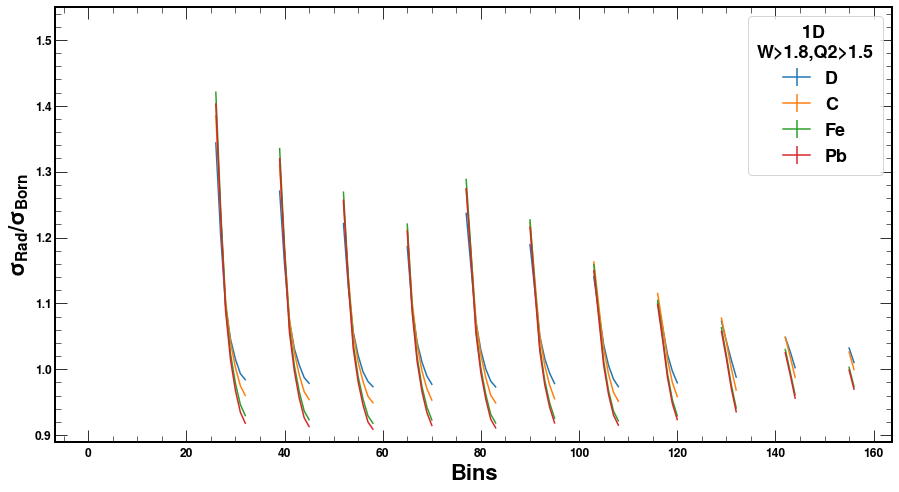

In [8]:
## here I'm working with the arrays to get rid of the zeros (nicer looking plots)

for i in range(156):
    if (y['Pb_external_w18_q215_1Dim_RC'][i] == 0):        y['Pb_external_w18_q215_1Dim_RC'][i] = np.nan
    if (y['C_external_w18_q215_1Dim_RC'][i] == 0):         y['C_external_w18_q215_1Dim_RC'][i] = np.nan
    if (y['Fe_external_w18_q215_1Dim_RC'][i] == 0):        y['Fe_external_w18_q215_1Dim_RC'][i] = np.nan
    if (y['D_external_w18_q215_1Dim_RC'][i] == 0):         y['D_external_w18_q215_1Dim_RC'][i] = np.nan        

fig = plt.figure(figsize=(15,8))
for target in ['D', 'C', 'Fe', 'Pb']:
    plt.errorbar(x_2,y['%s_external_w18_q215_1Dim_RC'%target],yerr=0,fmt='-',label=target)
plt.ylim([0.89,1.55])
plt.xlabel('Bins',fontsize=22, fontweight='bold', loc='center')
plt.ylabel('$\sigma_{Rad}/\sigma_{Born}$',fontsize=22, fontweight='bold', loc='center')
plt.legend(title='         1D\nW>1.8,Q2>1.5',loc='best',ncol=1,frameon=True,fontsize=18,title_fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('RC_External_w18_q215_1D_156Bins.pdf', bbox_inches='tight')
plt.savefig('RC_External_w18_q215_1D_156Bins.png', bbox_inches='tight')


plt.show()


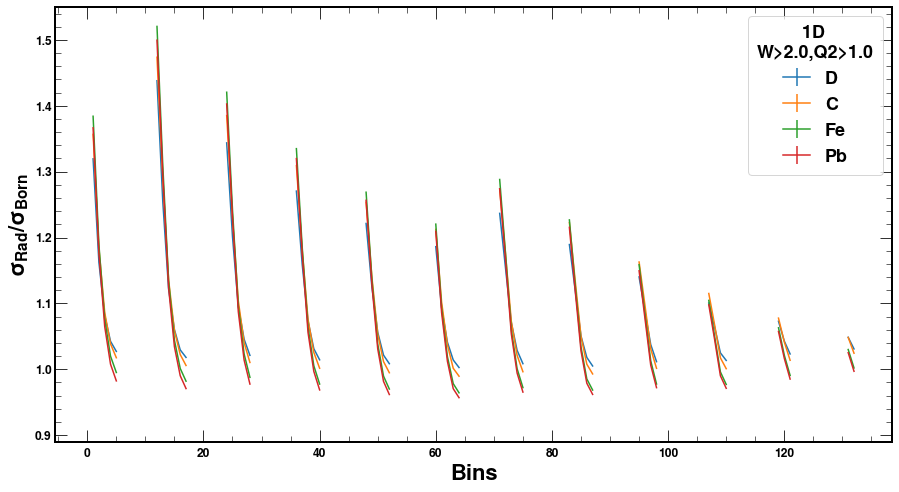

In [9]:
for i in range(132):
    if (y['Pb_external_w20_q210_1Dim_RC'][i] == 0):        y['Pb_external_w20_q210_1Dim_RC'][i] = np.nan
    if (y['C_external_w20_q210_1Dim_RC'][i] == 0):         y['C_external_w20_q210_1Dim_RC'][i] = np.nan
    if (y['Fe_external_w20_q210_1Dim_RC'][i] == 0):        y['Fe_external_w20_q210_1Dim_RC'][i] = np.nan
    if (y['D_external_w20_q210_1Dim_RC'][i] == 0):         y['D_external_w20_q210_1Dim_RC'][i] = np.nan        

fig = plt.figure(figsize=(15,8))
for target in ['D', 'C', 'Fe', 'Pb']:
    plt.errorbar(x,y['%s_external_w20_q210_1Dim_RC'%target],yerr=0,fmt='-',label=target)
plt.ylim([0.89,1.55])
plt.xlabel('Bins',fontsize=22, fontweight='bold', loc='center')
plt.ylabel('$\sigma_{Rad}/\sigma_{Born}$',fontsize=22, fontweight='bold', loc='center')
plt.legend(title='         1D\nW>2.0,Q2>1.0',loc='best',ncol=1,frameon=True,fontsize=18,title_fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('RC_External_w20_q210_1D_132Bins.pdf', bbox_inches='tight')
plt.savefig('RC_External_w20_q210_1D_132Bins.png', bbox_inches='tight')


plt.show()


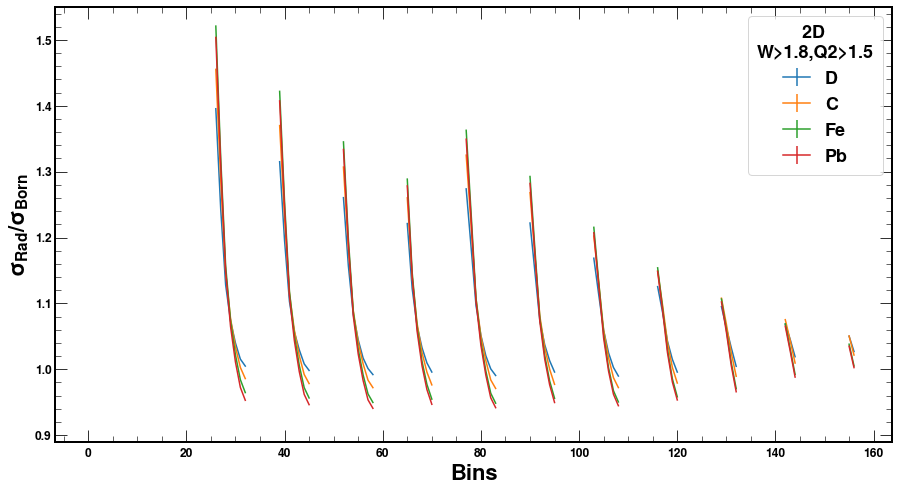

In [10]:
for i in range(156):
    if (y['Pb_external_w18_q215_2Dim_RC'][i] == 0):        y['Pb_external_w18_q215_2Dim_RC'][i] = np.nan
    if (y['C_external_w18_q215_2Dim_RC'][i] == 0):         y['C_external_w18_q215_2Dim_RC'][i] = np.nan
    if (y['Fe_external_w18_q215_2Dim_RC'][i] == 0):        y['Fe_external_w18_q215_2Dim_RC'][i] = np.nan
    if (y['D_external_w18_q215_2Dim_RC'][i] == 0):         y['D_external_w18_q215_2Dim_RC'][i] = np.nan        

fig = plt.figure(figsize=(15,8))
for target in ['D', 'C', 'Fe', 'Pb']:
    plt.errorbar(x_2,y['%s_external_w18_q215_2Dim_RC'%target],yerr=0,fmt='-',label=target)
plt.ylim([0.89,1.55])
plt.xlabel('Bins',fontsize=22, fontweight='bold', loc='center')
plt.ylabel('$\sigma_{Rad}/\sigma_{Born}$',fontsize=22, fontweight='bold', loc='center')
plt.legend(title='         2D\nW>1.8,Q2>1.5',loc='best',ncol=1,frameon=True,fontsize=18,title_fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('RC_External_w18_q215_2D_156Bins.pdf', bbox_inches='tight')
plt.savefig('RC_External_w18_q215_2D_156Bins.png', bbox_inches='tight')



plt.show()


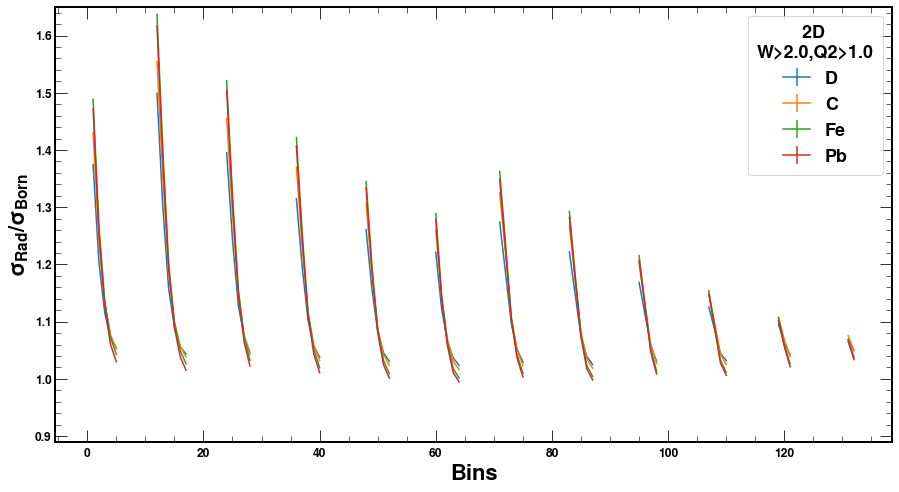

In [11]:
for i in range(132):
    if (y['Pb_external_w20_q210_2Dim_RC'][i] == 0):        y['Pb_external_w20_q210_2Dim_RC'][i] = np.nan
    if (y['C_external_w20_q210_2Dim_RC'][i] == 0):         y['C_external_w20_q210_2Dim_RC'][i] = np.nan
    if (y['Fe_external_w20_q210_2Dim_RC'][i] == 0):        y['Fe_external_w20_q210_2Dim_RC'][i] = np.nan
    if (y['D_external_w20_q210_2Dim_RC'][i] == 0):         y['D_external_w20_q210_2Dim_RC'][i] = np.nan        

fig = plt.figure(figsize=(15,8))
for target in ['D', 'C', 'Fe', 'Pb']:
    plt.errorbar(x,y['%s_external_w20_q210_2Dim_RC'%target],yerr=0,fmt='-',label=target)
plt.ylim([0.89,1.65])
plt.xlabel('Bins',fontsize=22, fontweight='bold', loc='center')
plt.ylabel('$\sigma_{Rad}/\sigma_{Born}$',fontsize=22, fontweight='bold', loc='center')
plt.legend(title='         2D\nW>2.0,Q2>1.0',loc='best',ncol=1,frameon=True,fontsize=18,title_fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('RC_External_w20_q210_2D_132Bins.pdf', bbox_inches='tight')
plt.savefig('RC_External_w20_q210_2D_132Bins.png', bbox_inches='tight')


plt.show()


# Ratios of RC factors from externals, 1D v/s 2D

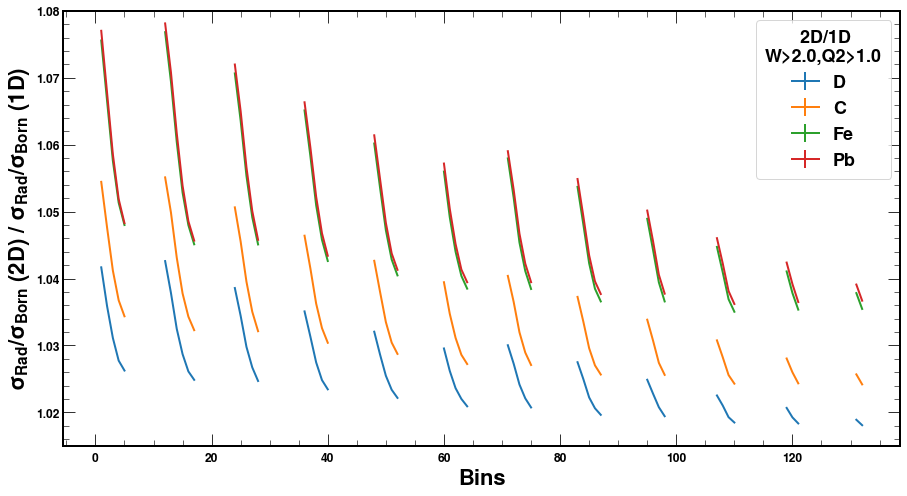

In [12]:
fig = plt.figure(figsize=(15,8))
for target in ['D', 'C', 'Fe', 'Pb']:
    plt.errorbar(x,y['%s_external_w20_q210_2Dim_RC'%target]/y['%s_external_w20_q210_1Dim_RC'%target],yerr=0,
                 fmt='-',label=target, lw=2)
plt.ylim([1.015,1.08])
plt.xlabel('Bins',fontsize=22, fontweight='bold', loc='center')
plt.ylabel('$\sigma_{Rad}/\sigma_{Born}$ (2D) / $\sigma_{Rad}/\sigma_{Born}$ (1D)',fontsize=22, fontweight='bold', loc='center')
plt.legend(title='       2D/1D\nW>2.0,Q2>1.0',loc='best',ncol=1,frameon=True,fontsize=18,title_fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('RC_External_w20_q210_2Dto1Dratio_132Bins.pdf', bbox_inches='tight')
plt.savefig('RC_External_w20_q210_2Dto1Dratio_132Bins.png', bbox_inches='tight')

plt.show()


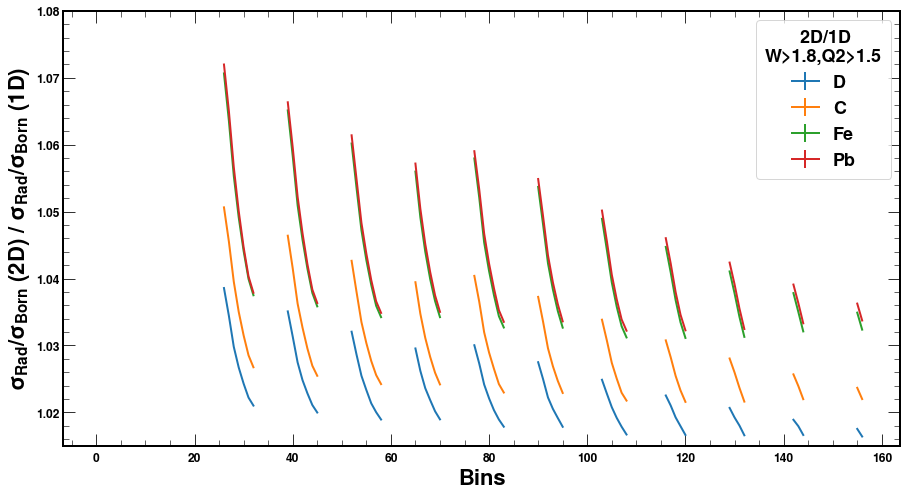

In [13]:
fig = plt.figure(figsize=(15,8))
for target in ['D', 'C', 'Fe', 'Pb']:
    plt.errorbar(x_2,y['%s_external_w18_q215_2Dim_RC'%target]/y['%s_external_w18_q215_1Dim_RC'%target],
                 yerr=0,fmt='-',label=target, lw=2)
plt.ylim([1.015,1.08])
plt.xlabel('Bins',fontsize=22, fontweight='bold', loc='center')
plt.ylabel('$\sigma_{Rad}/\sigma_{Born}$ (2D) / $\sigma_{Rad}/\sigma_{Born}$ (1D)',fontsize=22, loc='center',
           fontweight='bold')
plt.legend(title='       2D/1D\nW>1.8,Q2>1.5',loc='best',ncol=1,frameon=True,fontsize=18,title_fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('RC_External_w18_q215_2Dto1Dratio_156Bins.pdf', bbox_inches='tight')
plt.savefig('RC_External_w18_q215_2Dto1Dratio_156Bins.png', bbox_inches='tight')

plt.show()


## Effects of the RC, according to Barak

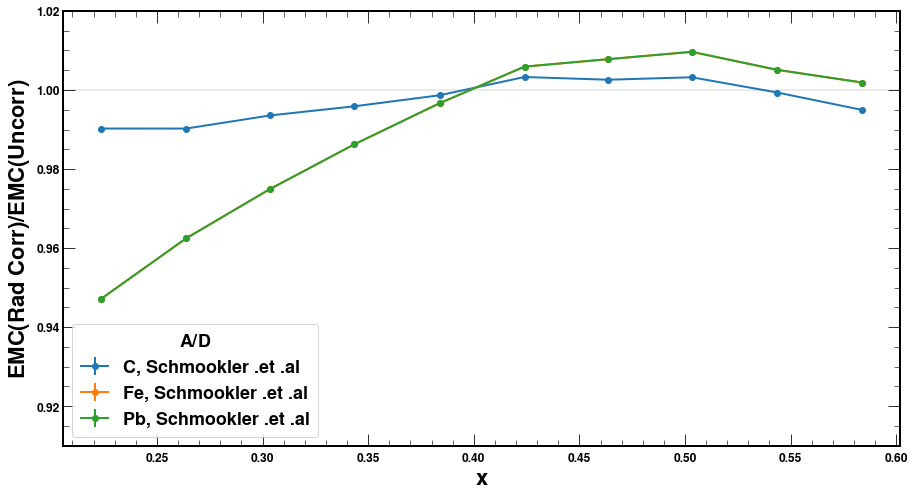

In [14]:
## Extracted from  plot figure 5.13, pag 77 'Report_ROund4-3611106-2018-02-07-v6.pdf'
RC_effect_Barak={}

RC_effect_Barak['x'] = np.array([ 0.22363977485928704,  0.2637898686679174, 0.30356472795497186, 0.3433395872420263, 0.3838649155722327, 
                 0.4240150093808631, 0.4634146341463415, 0.5031894934333959, 0.5437148217636023,0.5838649155722326 ])
RC_effect_Barak['Pb']= np.array([ 0.7474358974358973 , 0.8217948717948718, 0.8737179487179487, 0.917948717948718, 0.9576923076923076,
                 0.982051282051282 , 0.9955128205128205, 1.0057692307692307,  1.0121794871794871 , 1.0185897435897435 ])
RC_effect_Barak['Fe']= np.array([ 0.7474358974358973 , 0.8217948717948718, 0.8737179487179487, 0.917948717948718, 0.9576923076923076,
                 0.982051282051282 , 0.9955128205128205, 1.0057692307692307,  1.0121794871794871 , 1.0185897435897435 ])           
RC_effect_Barak['D2']= np.array([ 0.7891025641025641, 0.8538461538461538, 0.8961538461538461,0.9307692307692307 ,0.9608974358974358 ,
                  0.9762820512820511 , 0.9878205128205129, 0.9961538461538462,1.007051282051282 , 1.0166666666666666])
RC_effect_Barak['C']= np.array([0.7814102564102565,0.8455128205128206,0.8903846153846153,0.9269230769230768,0.9596153846153845,
                0.9794871794871794,0.9903846153846152,0.9993589743589744,1.0064102564102564,1.0115384615384615 ])

RC_effect_Barak['PbtoD2ratio']=RC_effect_Barak['Pb'] / RC_effect_Barak['D2']
RC_effect_Barak['FetoD2ratio']=RC_effect_Barak['Fe'] / RC_effect_Barak['D2']
RC_effect_Barak['CtoD2ratio']=RC_effect_Barak['C'] / RC_effect_Barak['D2']     
                               
                               
fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    plt.errorbar(RC_effect_Barak['x'],RC_effect_Barak['%stoD2ratio'%target],yerr=0,
                 lw=2,fmt='-o',label="%s, Schmookler .et .al"%target, color=colors[target]  ) 
plt.ylim([0.91,1.02])
#plt.xlim([0.12,0.57])

plt.xlabel('$x$',fontsize=22, loc='center', fontweight='bold')
plt.ylabel('$EMC(Rad$ $Corr) / EMC (Uncorr)$',fontsize=22, loc='center', fontweight='bold')
plt.legend(loc='best',ncol=1,frameon=True,fontsize=18, title='$A/D$', title_fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

## Fe and Pb are the same        
                               

## Effects of the CC, according to Barak

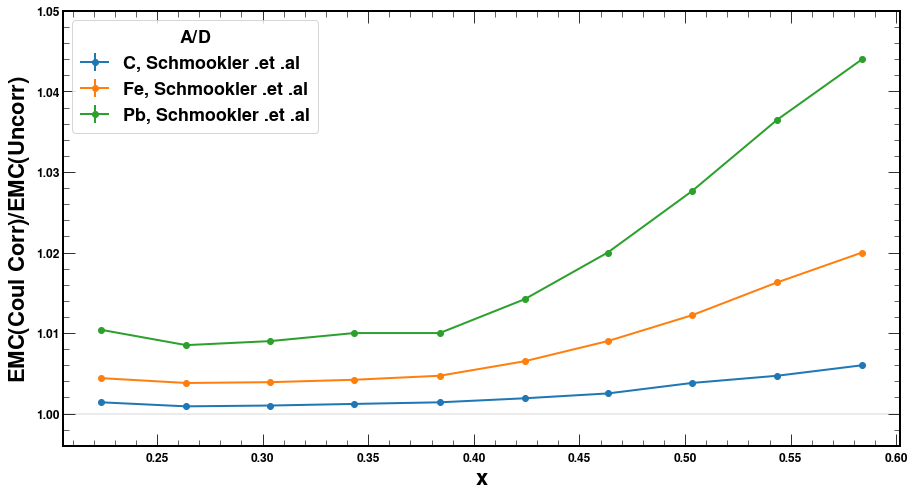

In [15]:
##Effective Coulomb Correction DIS events plot figure 5.16, pag 80 'Report_ROund4-3611106-2018-02-07-v6.pdf'
CC_effect_Barak={}

CC_effect_Barak['x'] = np.array([  0.2236,  0.26378, 0.30356, 0.34333, 0.38386,  
                                   0.42405, 0.46341, 0.50318, 0.54371,0.58386 ])
CC_effect_Barak['Pb']= np.array([ 1.0104 ,1.0085,1.009  ,1.01  , 1.010,  
                                  1.0142 ,1.02  ,1.0276 ,1.0365, 1.044 ])
CC_effect_Barak['Fe']= np.array([  1.0044, 1.0038, 1.0039, 1.0042,1.0047,
                                   1.0065, 1.0090, 1.0122, 1.0163, 1.02  ])           
CC_effect_Barak['D2']= np.array([ 1,1,1,1,1,1,1,1,1,1 ])
CC_effect_Barak['C'] = np.array([ 1.0014 ,1.0009, 1.001 , 1.0012 , 1.0014, 
                                  1.0019 ,1.0025, 1.0038, 1.0047 , 1.0060 ])

CC_effect_Barak['PbtoD2ratio']=CC_effect_Barak['Pb'] / CC_effect_Barak['D2']
CC_effect_Barak['FetoD2ratio']=CC_effect_Barak['Fe'] / CC_effect_Barak['D2']
CC_effect_Barak['CtoD2ratio'] =CC_effect_Barak['C']  / CC_effect_Barak['D2']     
                               
                               
fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    plt.errorbar(CC_effect_Barak['x'],CC_effect_Barak['%stoD2ratio'%target],yerr=0,
                 lw=2,fmt='-o',label="%s, Schmookler .et .al"%target, color=colors[target]  ) 
plt.ylim([0.996,1.05])
#plt.xlim([0.12,0.57])

plt.xlabel('$x$',fontsize=22, loc='center', fontweight='bold')
plt.ylabel('$EMC(Coul $ $Corr) / EMC (Uncorr)$',fontsize=22, loc='center', fontweight='bold')
plt.legend(loc='best',ncol=1,frameon=True,fontsize=18, title='$A/D$', title_fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

         


# Making Q2/x panels

# Comparison EMC (raw yields) different DIS selection cuts

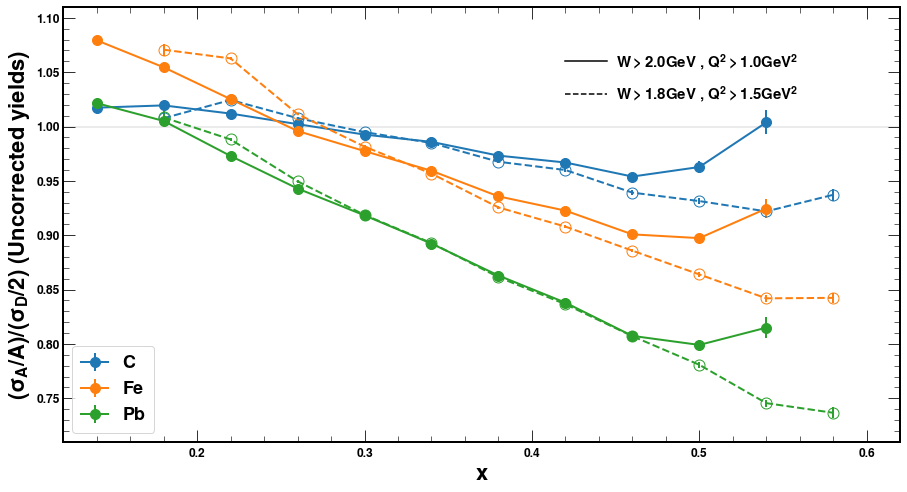

In [16]:
emc_raw={}
# raw means no correction (AC or CC or RC or ISO) to the data
x_emc_raw = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54])
x_emc_raw_2 = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54 , 0.58])
emc_raw['C_w20_q210']  = np.array([ 1.01732 , 1.01942 , 1.0119 , 1.00218 , 0.992564 , 0.985872 , 0.973232 , 0.966894 , 0.953972 , 0.96275 , 1.00379  ])
emc_raw['Fe_w20_q210'] = np.array([ 1.07931 , 1.05448 , 1.02515 , 0.99587 , 0.977382 , 0.959292 , 0.935763 , 0.92263 , 0.900789 , 0.897329 , 0.924474  ])
emc_raw['Pb_w20_q210'] = np.array([ 1.02152 , 1.0051 , 0.972885 , 0.942952 , 0.918253 , 0.892297 , 0.862957 , 0.837995 , 0.807421 , 0.799095 , 0.814977 ])

emc_raw['C_w18_q215']  = np.array([ 0 , 1.00762 , 1.02441 , 1.00771 , 0.994877 , 0.984818 , 0.967578 , 0.959982 , 0.939192 , 0.931417 , 0.921918 , 0.937192 ])
emc_raw['Fe_w18_q215'] = np.array([ 0 , 1.07064 , 1.06264 , 1.01141 , 0.981519 , 0.956677 , 0.925576 , 0.907933 , 0.885801 , 0.863943 , 0.84196 , 0.842402 ])
emc_raw['Pb_w18_q215'] = np.array([ 0 , 1.00833 , 0.988104 , 0.949586 , 0.918684 , 0.8928 , 0.861438 , 0.836536 , 0.807143 , 0.780835 , 0.745555 , 0.736692 ])

emc_raw['C_w20_q210_err']  = np.array([ 0.00164359 , 0.00107071 , 0.00102946 , 0.00107251 , 0.00122078 , 0.0014814 , 0.00185027 , 0.00244645 , 0.00334539 , 0.00526087 , 0.0109457 ])
emc_raw['Fe_w20_q210_err'] = np.array([ 0.00143926 , 0.000903729 , 0.000847176 , 0.000865025 , 0.00097973 , 0.00118002 , 0.00147297 , 0.00194929 , 0.00265813 , 0.00413138 , 0.00859448 ])
emc_raw['Pb_w20_q210_err'] = np.array([0.00162572 , 0.0010417 , 0.000984052 , 0.00100975 , 0.00114009 , 0.00136835 , 0.00170373 , 0.00223209 , 0.0030253 , 0.00465863 , 0.00956671  ])

emc_raw['C_w18_q215_err']  = np.array([0 , 0.00624223 , 0.00176527 , 0.00141538 , 0.00136139 , 0.00139062 , 0.0014724 , 0.00174616 , 0.00215137 , 0.00279276 , 0.00381683 , 0.00575077 ])
emc_raw['Fe_w18_q215_err'] = np.array([0 , 0.00562474 , 0.00151728 , 0.00116281 , 0.00109779 , 0.00110446 , 0.0011506 , 0.00135137 , 0.00167893 , 0.00216526 , 0.00293829 , 0.0043669 ])
emc_raw['Pb_w18_q215_err'] = np.array([0 , 0.00633012 , 0.0017177 , 0.00134487 , 0.00127365 , 0.00128407 , 0.00134198 , 0.00156997 , 0.00194512 , 0.00250186 , 0.0033498 , 0.00494231  ])

if (emc_raw['C_w18_q215'][0] == 0):         emc_raw['C_w18_q215'][0] = np.nan
if (emc_raw['Fe_w18_q215'][0] == 0):        emc_raw['Fe_w18_q215'][0] = np.nan
if (emc_raw['Pb_w18_q215'][0] == 0):        emc_raw['Pb_w18_q215'][0] = np.nan

fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    plt.errorbar(x_emc_raw,emc_raw['%s_w20_q210'%target],yerr=emc_raw['%s_w20_q210_err'%target],
                 lw=2,fmt='-o',label="%s"%target, color=colors[target], ms=10   ) 
    plt.errorbar(x_emc_raw_2,emc_raw['%s_w18_q215'%target],yerr=emc_raw['%s_w18_q215_err'%target],
                 lw=2,fmt='--o', color=colors[target], ms=11 , fillstyle='none')    
plt.ylim([0.71,1.11])
plt.xlim([0.12,0.62])
plt.xlabel('$x$',fontsize=22, fontweight='bold', loc='center')
plt.ylabel('$(\sigma_{A}/A)/(\sigma_{D}/2)$ (Uncorrected yields)',fontsize=22, loc='center', fontweight='bold')
plt.legend(loc='lower left',ncol=1,frameon=True,fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.text(0.45, 1.06, '$W>2.0 GeV $ , $ Q^{2}>1.0 GeV^{2}$', fontsize=15, va='center', fontweight="bold")
plt.text(0.45, 1.03, '$W>1.8 GeV $ , $ Q^{2}>1.5 GeV^{2}$', fontsize=15, va='center', fontweight="bold")

plt.axhline(y = 1.06, color = 'black', linestyle = '-'  , xmin = 0.6, xmax = 0.65)
plt.axhline(y = 1.03, color = 'black', linestyle = '--' , xmin = 0.6, xmax = 0.65)


plt.savefig('EMC_rawYields_comp_DIS_cuts.pdf', bbox_inches='tight')
plt.savefig('EMC_rawYields_comp_DIS_cuts.png', bbox_inches='tight')

plt.show()

## note: I can't make the comparison with AC because by default Hayk's simulations have the W>2.0 in them

# EMC bin content

here I'm constructing the EMC ratio based on the data content in each bin


In [17]:
def get_EMC_Unc_w20_q210(target):
    if target=='C':  
        norm=1.118
    if target=='Fe': 
        norm=1.054
    if target=='Pb': 
        norm=2.090
        
    y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w20_q210'%target].reshape(12,11))/sumColumn(y['%s_EMC_raw_LT_w20_q210'%target].reshape(12,11)))*(norm)    
    err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w20_q210'%target].reshape(12,11)) / sumColumn(y['%s_EMC_raw_LT_w20_q210'%target].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w20_q210'%target].reshape(12,11))) + 1./(sumColumn(y['%s_EMC_raw_LT_w20_q210'%target].reshape(12,11))) )    
    x_tmp   = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54])    
       
    return x_tmp,y_tmp,err_tmp

def get_EMC_Unc_w18_q215(target):
    if target=='C':  
        norm=1.118
    if target=='Fe': 
        norm=1.054
    if target=='Pb': 
        norm=2.090
        
    y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)    
    err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )    
    x_tmp   = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54 , 0.58])    
       
    return x_tmp,y_tmp,err_tmp

def get_ST_LT_arrays_w20_q210(target):
    y_tmp_ST = y['%s_EMC_raw_ST_w20_q210'%target]
    y_tmp_LT = y['%s_EMC_raw_LT_w20_q210'%target]
    return y_tmp_ST , y_tmp_LT

def get_ST_LT_arrays_w18_q215(target):
    y_tmp_ST = y['%s_EMC_raw_ST_w18_q215'%target]
    y_tmp_LT = y['%s_EMC_raw_LT_w18_q215'%target]
    return y_tmp_ST , y_tmp_LT



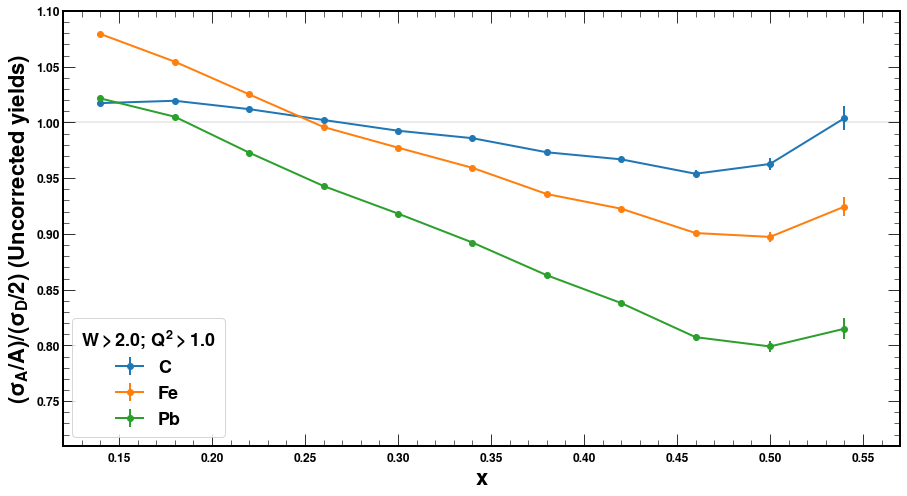

In [18]:
fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_temp,y_temp,err_temp = get_EMC_Unc_w20_q210(target)
    plt.errorbar(x_temp,y_temp,yerr=err_temp,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
plt.ylim([0.71,1.1])
plt.xlim([0.12,0.57])

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.xlabel('$x$',fontsize=22, loc='center', fontweight="bold")
plt.ylabel('$(\sigma_{A}/A)/(\sigma_{D}/2)$ (Uncorrected yields)',fontsize=22, loc='center', fontweight="bold")
plt.legend(loc='best',ncol=1,frameon=True,fontsize=18, title='$W>2.0$; $Q^{2}>1.0$'  , title_fontsize=18)
plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )


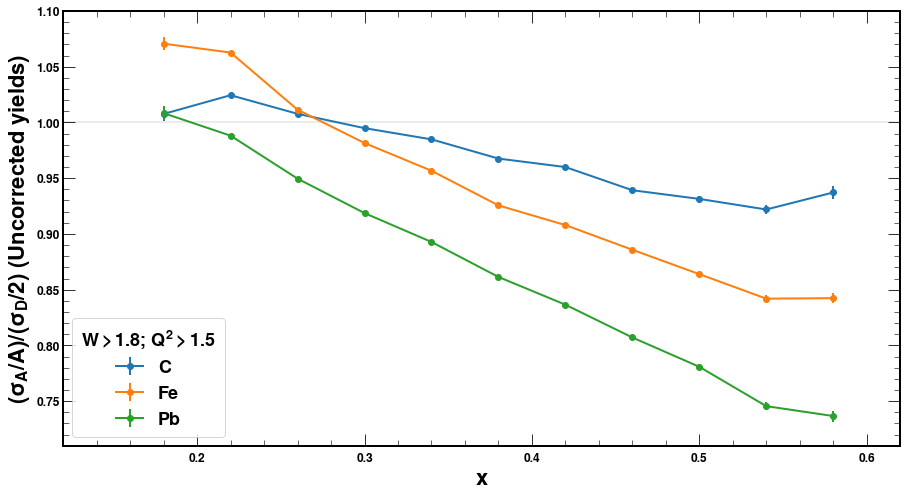

In [19]:
fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_temp,y_temp,err_temp = get_EMC_Unc_w18_q215(target)
    plt.errorbar(x_temp,y_temp,yerr=err_temp,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
plt.ylim([0.71,1.1])
plt.xlim([0.12,0.62])

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.xlabel('$x$',fontsize=22, loc='center', fontweight="bold")
plt.ylabel('$(\sigma_{A}/A)/(\sigma_{D}/2)$ (Uncorrected yields)',fontsize=22, loc='center', fontweight="bold")
plt.legend(loc='best',ncol=1,frameon=True,fontsize=18, title='$W>1.8$; $Q^{2}>1.5$'  , title_fontsize=18)
plt.show()


In [20]:
def applyRC_w20_q210_1D_EXT( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_external_w20_q210_1Dim_RC'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_external_w20_q210_1Dim_RC']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_RC=(sumColumn(arr_ST.reshape(12,11))/sumColumn(arr_LT.reshape(12,11)))*Norm    
    err_tmp_RC = err_tmp
    x_tmp_RC = x_tmp
    
    return x_tmp_RC , y_tmp_RC , err_tmp_RC, arr_ST, arr_LT


def applyRC_w20_q210_2D_EXT( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_external_w20_q210_2Dim_RC'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_external_w20_q210_2Dim_RC']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_RC=(sumColumn(arr_ST.reshape(12,11))/sumColumn(arr_LT.reshape(12,11)))*Norm    
    err_tmp_RC = err_tmp
    x_tmp_RC = x_tmp
    
    return x_tmp_RC , y_tmp_RC , err_tmp_RC, arr_ST, arr_LT


def applyRC_w18_q215_1D_EXT( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_external_w18_q215_1Dim_RC'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_external_w18_q215_1Dim_RC']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_RC=(sumColumn(arr_ST.reshape(13,12))/sumColumn(arr_LT.reshape(13,12)))*Norm    
    err_tmp_RC = err_tmp
    x_tmp_RC = x_tmp
    
    return x_tmp_RC , y_tmp_RC , err_tmp_RC, arr_ST, arr_LT


def applyRC_w18_q215_2D_EXT( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_external_w18_q215_2Dim_RC'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_external_w18_q215_2Dim_RC']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_RC=(sumColumn(arr_ST.reshape(13,12))/sumColumn(arr_LT.reshape(13,12)))*Norm    
    err_tmp_RC = err_tmp
    x_tmp_RC = x_tmp
    
    return x_tmp_RC , y_tmp_RC , err_tmp_RC, arr_ST, arr_LT

def applyRC_w20_q210_INC( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_Inclusive_RC_w20_q210'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_Inclusive_RC_w20_q210']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_RC=(sumColumn(arr_ST.reshape(12,11))/sumColumn(arr_LT.reshape(12,11)))*Norm    
    err_tmp_RC = err_tmp
    x_tmp_RC = x_tmp
    
    return x_tmp_RC , y_tmp_RC , err_tmp_RC , arr_ST, arr_LT


def applyRC_w18_q215_INC( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_Inclusive_RC_w18_q215'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_Inclusive_RC_w18_q215']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_RC=(sumColumn(arr_ST.reshape(13,12))/sumColumn(arr_LT.reshape(13,12)))*Norm    
    err_tmp_RC = err_tmp
    x_tmp_RC = x_tmp
    
    return x_tmp_RC , y_tmp_RC , err_tmp_RC , arr_ST , arr_LT


def applyCC_w18_q215_EXT( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (y['%s_external_w18_q215_CC'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (y['D_external_w18_q215_CC']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_CC=(sumColumn(arr_ST.reshape(13,12))/sumColumn(arr_LT.reshape(13,12)))*Norm    
    err_tmp_CC = err_tmp
    x_tmp_CC = x_tmp
    
    return x_tmp_CC , y_tmp_CC , err_tmp_CC , arr_ST, arr_LT

def applyCC_w20_q210_EXT( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (y['%s_external_w20_q210_CC'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (y['D_external_w20_q210_CC']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_CC=(sumColumn(arr_ST.reshape(12,11))/sumColumn(arr_LT.reshape(12,11)))*Norm    
    err_tmp_CC = err_tmp
    x_tmp_CC = x_tmp
    
    return x_tmp_CC , y_tmp_CC , err_tmp_CC, arr_ST , arr_LT



def applyCC_w20_q210_INC( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (y['%s_Inclusive_CC_w20_q210'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (y['D_Inclusive_CC_w20_q210']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_CC=(sumColumn(arr_ST.reshape(12,11))/sumColumn(arr_LT.reshape(12,11)))*Norm    
    err_tmp_CC = err_tmp
    x_tmp_CC = x_tmp
    
    return x_tmp_CC , y_tmp_CC , err_tmp_CC, arr_ST , arr_LT


def applyCC_w18_q215_INC( x_tmp , y_tmp_ST , y_tmp_LT ,err_tmp ,target ):
    if target=='C':  Norm=1.118
    if target=='Fe': Norm=1.054
    if target=='Pb': Norm=2.090
    np.nan_to_num(np.nan)
    arr_ST =  np.multiply( y_tmp_ST, (y['%s_Inclusive_CC_w18_q215'%target]) ) 
    arr_ST[np.isnan(arr_ST)]     = 0
    
    arr_LT =  np.multiply( y_tmp_LT, (y['D_Inclusive_CC_w18_q215']) ) 
    arr_LT[np.isnan(arr_LT)]     = 0

    y_tmp_CC=(sumColumn(arr_ST.reshape(13,12))/sumColumn(arr_LT.reshape(13,12)))*Norm    
    err_tmp_CC = err_tmp
    x_tmp_CC = x_tmp
    
    return x_tmp_CC , y_tmp_CC , err_tmp_CC, arr_ST , arr_LT




# Effect of the RC (EXT) on raw data, with 1D procedure

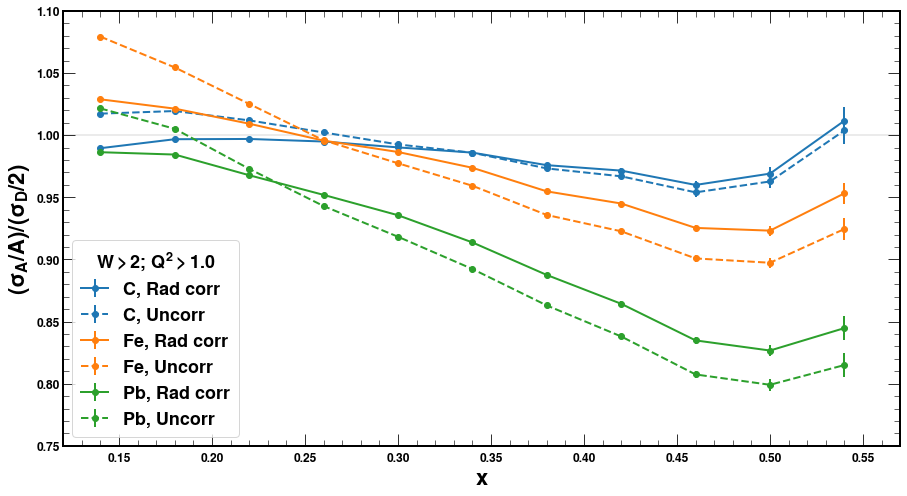

In [21]:

fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                           = get_ST_LT_arrays_w20_q210(target)
    x_tmp_RC,y_tmp_RC,err_tmp_RC, d1, d2 = applyRC_w20_q210_1D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    plt.errorbar(x_tmp_RC,y_tmp_RC,yerr=err_tmp_RC,
                 lw=2,fmt='-o',label="%s, Rad corr"%target, color=colors[target]  ) 
    plt.errorbar(x_emc_raw,y_tmp,yerr=err_tmp,lw=2,fmt='--o',label="%s, Uncorr"%target, color=colors[target]  ) 

plt.ylim([0.75,1.1])
plt.xlim([0.12,0.57])
plt.xlabel('$x$',fontsize=22, loc='center', fontweight="bold")
plt.ylabel('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, loc='center', fontweight="bold")

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.legend(loc='best',ncol=1,frameon=True,fontsize=18, title='$W>2$; $Q^{2}>1.0$', title_fontsize=18)

plt.show()



same plot with ratio below

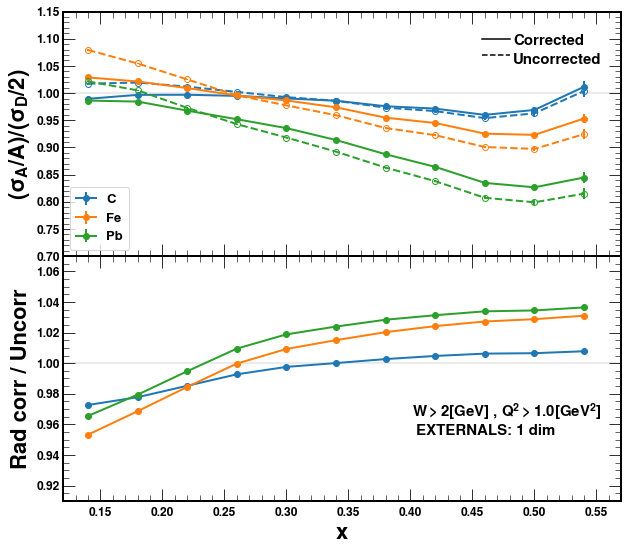

In [22]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                           = get_ST_LT_arrays_w20_q210(target)
    x_tmp_RC,y_tmp_RC,err_tmp_RC, d1, d2 = applyRC_w20_q210_1D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0].errorbar(x_tmp,y_tmp_RC,yerr=err_tmp_RC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_RC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.91,1.07])
axs[0].set_xlim([0.12,0.57])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.61, 0.25, '$W>2 [GeV]$ , $Q^{2}>1.0 [GeV^2]$\n EXTERNALS: 1 dim', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_Cor_to_Unc_w20_q210_EXTERNALS_1D.pdf', bbox_inches='tight')
plt.savefig('EMC_Cor_to_Unc_w20_q210_EXTERNALS_1D.png', bbox_inches='tight')


plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

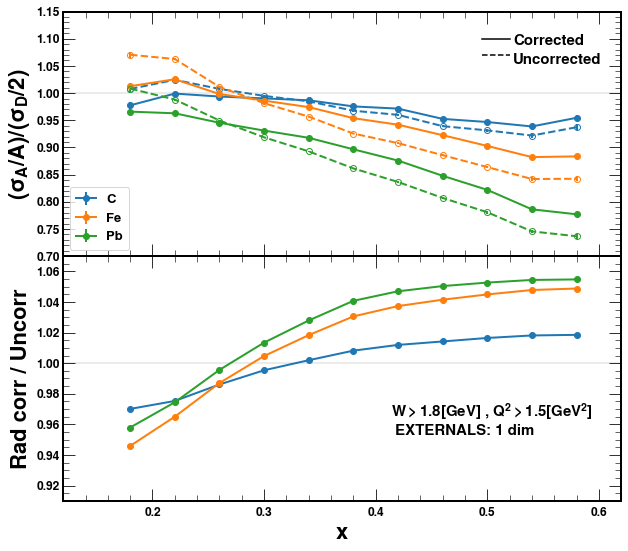

In [23]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                           = get_ST_LT_arrays_w18_q215(target)
    x_tmp_RC,y_tmp_RC,err_tmp_RC, d1, d2 = applyRC_w18_q215_1D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )

    axs[0].errorbar(x_tmp,y_tmp_RC,yerr=err_tmp_RC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp   ,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_RC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.91,1.07])
axs[0].set_xlim([0.12,0.62])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)
#axs[1].legend(loc='best',ncol=1,frameon=True,fontsize=13)

fig.text(0.58, 0.25, '$W>1.8 [GeV]$ , $Q^{2}>1.5 [GeV^2]$\n EXTERNALS: 1 dim', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('EMC_Cor_to_Unc_w18_q215_EXTERNALS_1D.pdf', bbox_inches='tight')
plt.savefig('EMC_Cor_to_Unc_w18_q215_EXTERNALS_1D.png', bbox_inches='tight')

plt.show()


# Effect of the RC (EXT) on raw data, with 2D procedure.

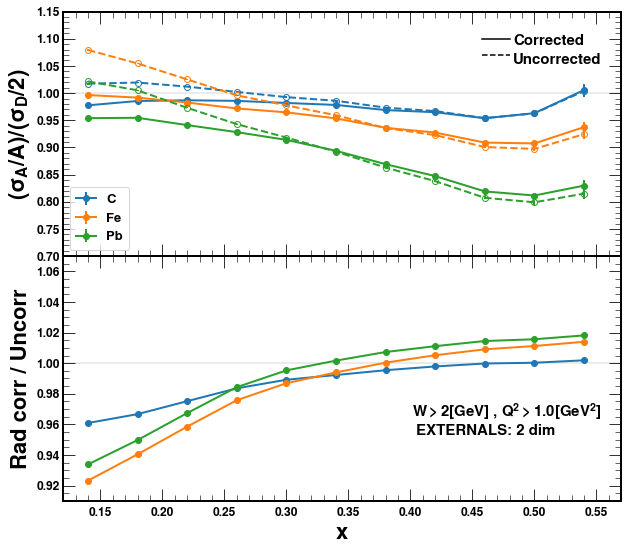

In [24]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                           = get_ST_LT_arrays_w20_q210(target)
    x_tmp_RC,y_tmp_RC,err_tmp_RC, d1, d2 = applyRC_w20_q210_2D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0].errorbar(x_tmp,y_tmp_RC,yerr=err_tmp_RC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_RC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 

axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.91,1.07])
axs[0].set_xlim([0.12,0.57])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)
#axs[1].legend(loc='best',ncol=1,frameon=True,fontsize=13)

fig.text(0.61, 0.25, '$W>2 [GeV]$ , $Q^{2}>1.0 [GeV^2]$\n EXTERNALS: 2 dim', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('EMC_Cor_to_Unc_w20_q210_EXTERNALS_2D.pdf', bbox_inches='tight')
plt.savefig('EMC_Cor_to_Unc_w20_q210_EXTERNALS_2D.png', bbox_inches='tight')

plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

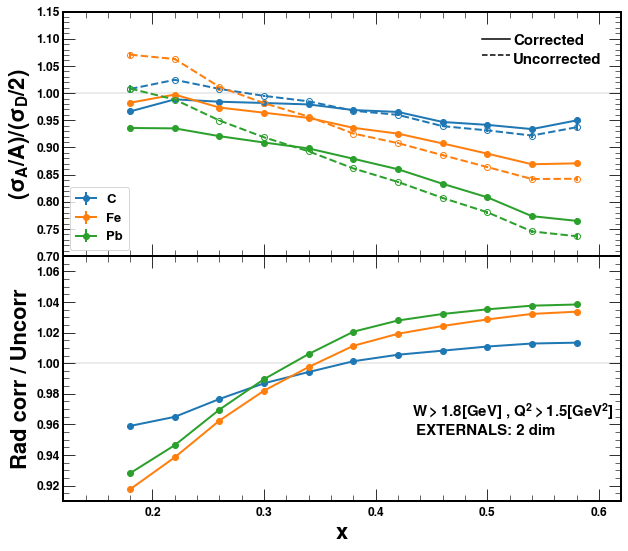

In [25]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                           = get_ST_LT_arrays_w18_q215(target)
    x_tmp_RC,y_tmp_RC,err_tmp_RC, d1, d2 = applyRC_w18_q215_2D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )

    axs[0].errorbar(x_tmp,y_tmp_RC,yerr=err_tmp_RC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp   ,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_RC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 

axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.91,1.07])
axs[0].set_xlim([0.12,0.62])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)
#axs[1].legend(loc='best',ncol=1,frameon=True,fontsize=13)

fig.text(0.61, 0.25, '$W>1.8 [GeV]$ , $Q^{2}>1.5 [GeV^2]$\n EXTERNALS: 2 dim', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('EMC_Cor_to_Unc_w18_q215_EXTERNALS_2D.pdf', bbox_inches='tight')
plt.savefig('EMC_Cor_to_Unc_w18_q215_EXTERNALS_2D.png', bbox_inches='tight')

plt.show()


# Effect of the RC (INCLUSIVE), for 0.5 degrees increments in $\Theta$

<ipython-input-20-13e6d14844e7>:77: RuntimeWarning: divide by zero encountered in divide
  arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_Inclusive_RC_w20_q210'%target]) )
<ipython-input-20-13e6d14844e7>:77: RuntimeWarning: invalid value encountered in multiply
  arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_Inclusive_RC_w20_q210'%target]) )
<ipython-input-20-13e6d14844e7>:80: RuntimeWarning: divide by zero encountered in divide
  arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_Inclusive_RC_w20_q210']) )
<ipython-input-20-13e6d14844e7>:80: RuntimeWarning: invalid value encountered in multiply
  arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_Inclusive_RC_w20_q210']) )


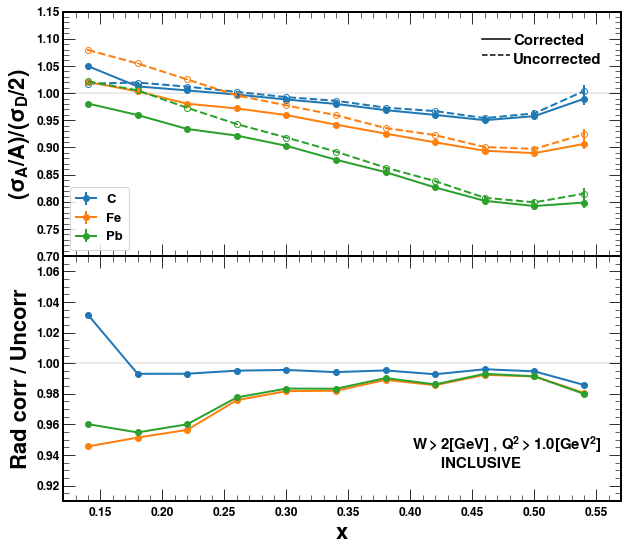

In [26]:
fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                           = get_ST_LT_arrays_w20_q210(target)
    x_tmp_RC,y_tmp_RC,err_tmp_RC, d1, d2 = applyRC_w20_q210_INC( x_tmp , y_st , y_lt ,err_tmp ,target )

    axs[0].errorbar(x_tmp,y_tmp_RC,yerr=err_tmp_RC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp   ,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_RC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.91,1.07])
axs[0].set_xlim([0.12,0.57])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)
#axs[1].legend(loc='best',ncol=1,frameon=True,fontsize=13)

fig.text(0.61, 0.2, '$W>2 [GeV]$ , $Q^{2}>1.0 [GeV^2]$\n       INCLUSIVE', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_Cor_to_Unc_w20_q210_INCLUSIVE.pdf', bbox_inches='tight')
plt.savefig('EMC_Cor_to_Unc_w20_q210_INCLUSIVE.png', bbox_inches='tight')


plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

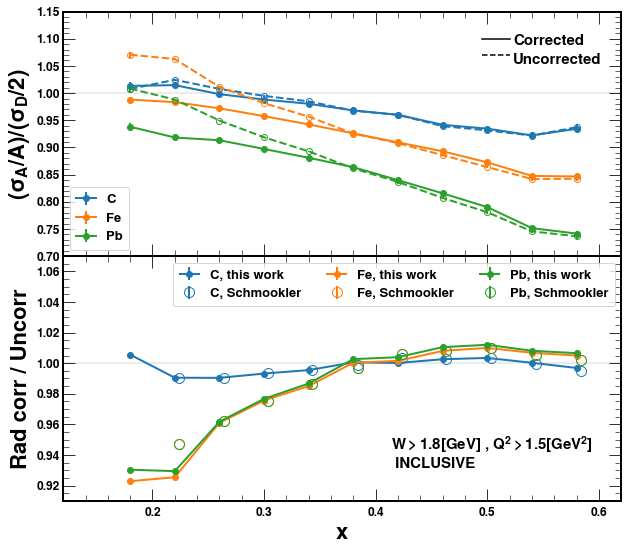

In [27]:
fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:

    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                           = get_ST_LT_arrays_w18_q215(target)
    x_tmp_RC,y_tmp_RC,err_tmp_RC, d1, d2 = applyRC_w18_q215_INC( x_tmp , y_st , y_lt ,err_tmp ,target )

    axs[0].errorbar(x_tmp,y_tmp_RC,yerr=err_tmp_RC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp   ,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_RC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target] , label="%s, this work"%target ) 
    axs[1].errorbar(RC_effect_Barak['x'],RC_effect_Barak['%stoD2ratio'%target],yerr=0,
                 lw=2,fmt='o',fillstyle='none',label="%s, Schmookler"%target, ms=10,color=colors[target]  )
           
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.91,1.07])
axs[0].set_xlim([0.12,0.62])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)
axs[1].legend(loc='best',ncol=3,frameon=True,fontsize=13)

fig.text(0.58, 0.2, '$W>1.8 [GeV]$ , $Q^{2}>1.5 [GeV^2]$\n INCLUSIVE', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)


plt.savefig('EMC_Cor_to_Unc_w18_q215_INCLUSIVE.pdf', bbox_inches='tight')
plt.savefig('EMC_Cor_to_Unc_w18_q215_INCLUSIVE.png', bbox_inches='tight')


plt.show()


# Comparison EXT/INC, different cases

<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

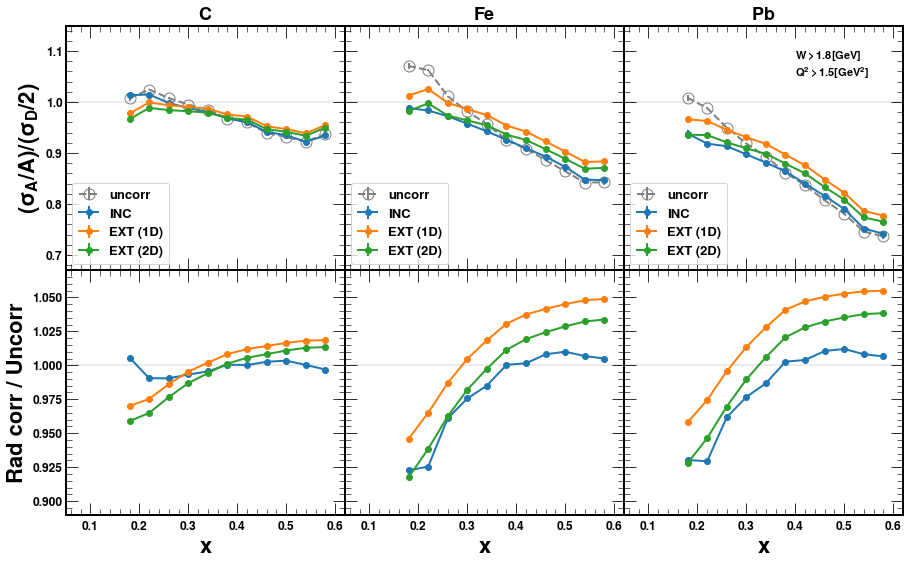

In [29]:
###this is a comparison of the EMC and the Ratio Coor/uncorr for W>1.8, Q2>1.5. 
###In the comparison I have INCLUSIVE, EXTERNAL 1D, EXTERNAL 2D

fig, axs = plt.subplots(2, 3,sharex=True, sharey=False,figsize=(15,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0][0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1][0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[0][1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1][1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[0][2].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1][2].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )

for target in ['C']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                           = get_ST_LT_arrays_w18_q215(target)
    x_tmp_RCi,y_tmp_RCi,err_tmp_RCi, d1i, d2i = applyRC_w18_q215_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe1,y_tmp_RCe1,err_tmp_RCe1, d1e1, d2e1 = applyRC_w18_q215_1D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe2,y_tmp_RCe2,err_tmp_RCe2, d1e2, d2e2 = applyRC_w18_q215_2D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0][0].errorbar(x_tmp,y_tmp,yerr=err_tmp,
                    lw=2,fmt='--o',fillstyle='none', ms=11,color='gray' , label="uncorr" )     
    axs[0][0].errorbar(x_tmp,y_tmp_RCi,yerr=err_tmp_RCi,
                    lw=2,fmt='-o',label="INC", color=colors['C']  )
    axs[1][0].errorbar(x_tmp,y_tmp_RCi / y_tmp ,yerr=0,
                    lw=2,fmt='-o', color=colors['C'] , label="INC"  ) 
    axs[0][0].errorbar(x_tmp,y_tmp_RCe1,
                       yerr=err_tmp_RCe1,lw=2,fmt='-o',label="EXT (1D)"  , color=colors['Fe']) 
    axs[1][0].errorbar(x_tmp,y_tmp_RCe1 / y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (1D)" , color=colors['Fe'] )      
    axs[0][0].errorbar(x_tmp,y_tmp_RCe2,
                       yerr=err_tmp_RCe2,lw=2,fmt='-o',label="EXT (2D)"  , color=colors['Pb']) 
    axs[1][0].errorbar(x_tmp, y_tmp_RCe2/y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (2D)"  , color=colors['Pb']) 
    
for target in ['Fe']:
    
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                           = get_ST_LT_arrays_w18_q215(target)
    x_tmp_RCi,y_tmp_RCi,err_tmp_RCi, d1i, d2i = applyRC_w18_q215_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe1,y_tmp_RCe1,err_tmp_RCe1, d1e1, d2e1 = applyRC_w18_q215_1D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe2,y_tmp_RCe2,err_tmp_RCe2, d1e2, d2e2 = applyRC_w18_q215_2D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0][1].errorbar(x_tmp,y_tmp,yerr=err_tmp,
                    lw=2,fmt='--o',fillstyle='none', ms=11,color='gray' , label="uncorr" )     
    axs[0][1].errorbar(x_tmp,y_tmp_RCi,yerr=err_tmp_RCi,
                    lw=2,fmt='-o',label="INC", color=colors['C']  )
    axs[1][1].errorbar(x_tmp,y_tmp_RCi / y_tmp ,yerr=0,
                    lw=2,fmt='-o', color=colors['C'] , label="INC"  ) 
    axs[0][1].errorbar(x_tmp,y_tmp_RCe1,
                       yerr=err_tmp_RCe1,lw=2,fmt='-o',label="EXT (1D)"  , color=colors['Fe']) 
    axs[1][1].errorbar(x_tmp,y_tmp_RCe1 / y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (1D)" , color=colors['Fe'] )      
    axs[0][1].errorbar(x_tmp,y_tmp_RCe2,
                       yerr=err_tmp_RCe2,lw=2,fmt='-o',label="EXT (2D)"  , color=colors['Pb']) 
    axs[1][1].errorbar(x_tmp, y_tmp_RCe2/y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (2D)"  , color=colors['Pb'])     


for target in ['Pb']:
    
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                           = get_ST_LT_arrays_w18_q215(target)
    x_tmp_RCi,y_tmp_RCi,err_tmp_RCi, d1i, d2i = applyRC_w18_q215_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe1,y_tmp_RCe1,err_tmp_RCe1, d1e1, d2e1 = applyRC_w18_q215_1D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe2,y_tmp_RCe2,err_tmp_RCe2, d1e2, d2e2 = applyRC_w18_q215_2D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0][2].errorbar(x_tmp,y_tmp,yerr=err_tmp,
                    lw=2,fmt='--o',fillstyle='none', ms=11,color='gray' , label="uncorr" )     
    axs[0][2].errorbar(x_tmp,y_tmp_RCi,yerr=err_tmp_RCi,
                    lw=2,fmt='-o',label="INC", color=colors['C']  )
    axs[1][2].errorbar(x_tmp,y_tmp_RCi / y_tmp ,yerr=0,
                    lw=2,fmt='-o', color=colors['C'] , label="INC"  ) 
    axs[0][2].errorbar(x_tmp,y_tmp_RCe1,
                       yerr=err_tmp_RCe1,lw=2,fmt='-o',label="EXT (1D)"  , color=colors['Fe']) 
    axs[1][2].errorbar(x_tmp,y_tmp_RCe1 / y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (1D)" , color=colors['Fe'] )      
    axs[0][2].errorbar(x_tmp,y_tmp_RCe2,
                       yerr=err_tmp_RCe2,lw=2,fmt='-o',label="EXT (2D)"  , color=colors['Pb']) 
    axs[1][2].errorbar(x_tmp, y_tmp_RCe2/y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (2D)"  , color=colors['Pb'])     
    
       
axs[0][0].set_ylim([0.67,1.15])
axs[0][1].set_ylim([0.67,1.15])
axs[0][2].set_ylim([0.67,1.15])

axs[0][0].set_xlim([0.05,0.62])
axs[0][1].set_xlim([0.05,0.62])
axs[0][2].set_xlim([0.05,0.62])

axs[1][0].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[1][1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[1][2].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")

axs[0][0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1][0].yaxis.set_label_text('Rad corr / Uncorr' ,fontsize=22, fontweight="bold")


axs[0][0].legend(loc='best',ncol=1,frameon=True,fontsize=13)
axs[0][1].legend(loc='best',ncol=1,frameon=True,fontsize=13)
axs[0][2].legend(loc='best',ncol=1,frameon=True,fontsize=13)

fig.text(0.8, 0.82, '$ W >1.8 [GeV]$ \n$Q^{2}>1.5 [GeV^2]$', fontsize=11, va='center', fontweight="bold")

axs[0][0].tick_params(axis='both', which='major', labelsize=12)

axs[1][0].tick_params(axis='both', which='major', labelsize=12)
axs[1][0].tick_params(axis='both', which='minor', labelsize=12)

axs[1][1].tick_params(axis='x', which='major', labelsize=12)
axs[1][1].tick_params(axis='y', which='major', labelsize=0)

axs[1][2].tick_params(axis='x', which='major', labelsize=12)
axs[1][2].tick_params(axis='y', which='major', labelsize=0)

axs[0][1].tick_params(axis='y', which='major', labelsize=0)
axs[0][2].tick_params(axis='y', which='major', labelsize=0)

axs[1][0].set_ylim([0.89,1.07])
axs[1][1].set_ylim([0.89,1.07])
axs[1][2].set_ylim([0.89,1.07])

axs[0,0].set_title('$C$',fontsize=18,fontweight="bold")
axs[0,1].set_title('$Fe$',fontsize=18,fontweight="bold")
axs[0,2].set_title('$Pb$',fontsize=18,fontweight="bold")

plt.savefig('EMC_Cor_to_Unc_w18_q215_INCL_EXT_comp.pdf', bbox_inches='tight')
plt.savefig('EMC_Cor_to_Unc_w18_q215_INCL_EXT_comp.png', bbox_inches='tight')


plt.show()


In [48]:
###this is a comparison of the EMC and the Ratio Coor/uncorr for W>2.0, Q2>1.0 
###In the comparison I have INCLUSIVE, EXTERNAL 1D, EXTERNAL 2D

## 2D EXT
#applying the RC factors
y['C_EMC_raw_ST_RC_2D_w20_q210'] = np.multiply( y['C_EMC_raw_ST_w20_q210'], (1.0/y['C_external_w20_q210_2Dim_RC']) )
y['C_EMC_raw_LT_RC_2D_w20_q210'] = np.multiply( y['C_EMC_raw_LT_w20_q210'], (1.0/y['D_external_w20_q210_2Dim_RC']) )
y['Fe_EMC_raw_ST_RC_2D_w20_q210'] = np.multiply( y['Fe_EMC_raw_ST_w20_q210'], (1.0/y['Fe_external_w20_q210_2Dim_RC']) )
y['Fe_EMC_raw_LT_RC_2D_w20_q210'] = np.multiply( y['Fe_EMC_raw_LT_w20_q210'], (1.0/y['D_external_w20_q210_2Dim_RC']) )
y['Pb_EMC_raw_ST_RC_2D_w20_q210'] = np.multiply( y['Pb_EMC_raw_ST_w20_q210'], (1.0/y['Pb_external_w20_q210_2Dim_RC']) )
y['Pb_EMC_raw_LT_RC_2D_w20_q210'] = np.multiply( y['Pb_EMC_raw_LT_w20_q210'], (1.0/y['D_external_w20_q210_2Dim_RC']) )

np.nan_to_num(np.nan)
# converting the np.nan into zeros
y['C_EMC_raw_ST_RC_2D_w20_q210'][np.isnan(y['C_EMC_raw_ST_RC_2D_w20_q210'])]     = 0
y['C_EMC_raw_LT_RC_2D_w20_q210'][np.isnan(y['C_EMC_raw_LT_RC_2D_w20_q210'])]     = 0
y['Fe_EMC_raw_ST_RC_2D_w20_q210'][np.isnan(y['Fe_EMC_raw_ST_RC_2D_w20_q210'])]   = 0
y['Fe_EMC_raw_LT_RC_2D_w20_q210'][np.isnan(y['Fe_EMC_raw_LT_RC_2D_w20_q210'])]   = 0
y['Pb_EMC_raw_ST_RC_2D_w20_q210'][np.isnan(y['Pb_EMC_raw_ST_RC_2D_w20_q210'])]   = 0
y['Pb_EMC_raw_LT_RC_2D_w20_q210'][np.isnan(y['Pb_EMC_raw_LT_RC_2D_w20_q210'])]   = 0


y['EMC_ratio_Pb_RC_w20_q210_2D']=(sumColumn(y['Pb_EMC_raw_ST_RC_2D_w20_q210'].reshape(12,11))/sumColumn(y['Pb_EMC_raw_LT_RC_2D_w20_q210'].reshape(12,11)))*(2.09)  
y['EMC_ratio_Fe_RC_w20_q210_2D']=(sumColumn(y['Fe_EMC_raw_ST_RC_2D_w20_q210'].reshape(12,11))/sumColumn(y['Fe_EMC_raw_LT_RC_2D_w20_q210'].reshape(12,11)))*(1.054)  
y['EMC_ratio_C_RC_w20_q210_2D']=(sumColumn(y['C_EMC_raw_ST_RC_2D_w20_q210'].reshape(12,11))/sumColumn(y['C_EMC_raw_LT_RC_2D_w20_q210'].reshape(12,11)))*(1.118)    
## creating the errors, using the ususal sqrt(N) error
y['EMC_ratio_Fe_err_w20_q210_2D']=1.054*(sumColumn(y['Fe_EMC_raw_ST_w20_q210'].reshape(12,11)) / sumColumn(y['Fe_EMC_raw_LT_w20_q210'].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['Fe_EMC_raw_ST_w20_q210'].reshape(12,11))) + 1./(sumColumn(y['Fe_EMC_raw_LT_w20_q210'].reshape(12,11))) )    
y['EMC_ratio_C_err_w20_q210_2D'] =1.118*(sumColumn(y['C_EMC_raw_ST_w20_q210'].reshape(12,11)) / sumColumn(y['C_EMC_raw_LT_w20_q210'].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['C_EMC_raw_ST_w20_q210'].reshape(12,11))) + 1./(sumColumn(y['C_EMC_raw_LT_w20_q210'].reshape(12,11)))     )    
y['EMC_ratio_Pb_err_w20_q210_2D']=2.090*(sumColumn(y['Pb_EMC_raw_ST_w20_q210'].reshape(12,11)) / sumColumn(y['Pb_EMC_raw_LT_w20_q210'].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['Pb_EMC_raw_ST_w20_q210'].reshape(12,11))) + 1./(sumColumn(y['Pb_EMC_raw_LT_w20_q210'].reshape(12,11))) )

## 1D EXT
#applying the RC factors
y['C_EMC_raw_ST_RC_1D_w20_q210'] = np.multiply( y['C_EMC_raw_ST_w20_q210'], (1.0/y['C_external_w20_q210_1Dim_RC']) )
y['C_EMC_raw_LT_RC_1D_w20_q210'] = np.multiply( y['C_EMC_raw_LT_w20_q210'], (1.0/y['D_external_w20_q210_1Dim_RC']) )
y['Fe_EMC_raw_ST_RC_1D_w20_q210'] = np.multiply( y['Fe_EMC_raw_ST_w20_q210'], (1.0/y['Fe_external_w20_q210_1Dim_RC']) )
y['Fe_EMC_raw_LT_RC_1D_w20_q210'] = np.multiply( y['Fe_EMC_raw_LT_w20_q210'], (1.0/y['D_external_w20_q210_1Dim_RC']) )
y['Pb_EMC_raw_ST_RC_1D_w20_q210'] = np.multiply( y['Pb_EMC_raw_ST_w20_q210'], (1.0/y['Pb_external_w20_q210_1Dim_RC']) )
y['Pb_EMC_raw_LT_RC_1D_w20_q210'] = np.multiply( y['Pb_EMC_raw_LT_w20_q210'], (1.0/y['D_external_w20_q210_1Dim_RC']) )

np.nan_to_num(np.nan)
# converting the np.nan into zeros
y['C_EMC_raw_ST_RC_1D_w20_q210'][np.isnan(y['C_EMC_raw_ST_RC_1D_w20_q210'])]     = 0
y['C_EMC_raw_LT_RC_1D_w20_q210'][np.isnan(y['C_EMC_raw_LT_RC_1D_w20_q210'])]     = 0
y['Fe_EMC_raw_ST_RC_1D_w20_q210'][np.isnan(y['Fe_EMC_raw_ST_RC_1D_w20_q210'])]   = 0
y['Fe_EMC_raw_LT_RC_1D_w20_q210'][np.isnan(y['Fe_EMC_raw_LT_RC_1D_w20_q210'])]   = 0
y['Pb_EMC_raw_ST_RC_1D_w20_q210'][np.isnan(y['Pb_EMC_raw_ST_RC_1D_w20_q210'])]   = 0
y['Pb_EMC_raw_LT_RC_1D_w20_q210'][np.isnan(y['Pb_EMC_raw_LT_RC_1D_w20_q210'])]   = 0

y['EMC_ratio_Pb_RC_w20_q210_1D']=(sumColumn(y['Pb_EMC_raw_ST_RC_1D_w20_q210'].reshape(12,11))/sumColumn(y['Pb_EMC_raw_LT_RC_1D_w20_q210'].reshape(12,11)))*(2.09)  
y['EMC_ratio_Fe_RC_w20_q210_1D']=(sumColumn(y['Fe_EMC_raw_ST_RC_1D_w20_q210'].reshape(12,11))/sumColumn(y['Fe_EMC_raw_LT_RC_1D_w20_q210'].reshape(12,11)))*(1.054)  
y['EMC_ratio_C_RC_w20_q210_1D']=(sumColumn(y['C_EMC_raw_ST_RC_1D_w20_q210'].reshape(12,11))/sumColumn(y['C_EMC_raw_LT_RC_1D_w20_q210'].reshape(12,11)))*(1.118)    
## creating the errors, using the ususal sqrt(N) error
y['EMC_ratio_Fe_err_w20_q210_1D']=1.054*(sumColumn(y['Fe_EMC_raw_ST_w20_q210'].reshape(12,11)) / sumColumn(y['Fe_EMC_raw_LT_w20_q210'].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['Fe_EMC_raw_ST_w20_q210'].reshape(12,11))) + 1./(sumColumn(y['Fe_EMC_raw_LT_w20_q210'].reshape(12,11))) )    
y['EMC_ratio_C_err_w20_q210_1D'] =1.118*(sumColumn(y['C_EMC_raw_ST_w20_q210'].reshape(12,11)) / sumColumn(y['C_EMC_raw_LT_w20_q210'].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['C_EMC_raw_ST_w20_q210'].reshape(12,11))) + 1./(sumColumn(y['C_EMC_raw_LT_w20_q210'].reshape(12,11)))     )    
y['EMC_ratio_Pb_err_w20_q210_1D']=2.090*(sumColumn(y['Pb_EMC_raw_ST_w20_q210'].reshape(12,11)) / sumColumn(y['Pb_EMC_raw_LT_w20_q210'].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['Pb_EMC_raw_ST_w20_q210'].reshape(12,11))) + 1./(sumColumn(y['Pb_EMC_raw_LT_w20_q210'].reshape(12,11))) )

## INCL

#applying the RC factors
y['C_EMC_raw_ST_RC_w20_q210'] = np.multiply( y['C_EMC_raw_ST_w20_q210'], (1.0/y['C_Inclusive_RC']) )
y['C_EMC_raw_LT_RC_w20_q210'] = np.multiply( y['C_EMC_raw_LT_w20_q210'], (1.0/y['D_Inclusive_RC']) )
y['Fe_EMC_raw_ST_RC_w20_q210'] = np.multiply( y['Fe_EMC_raw_ST_w20_q210'], (1.0/y['Fe_Inclusive_RC']) )
y['Fe_EMC_raw_LT_RC_w20_q210'] = np.multiply( y['Fe_EMC_raw_LT_w20_q210'], (1.0/y['D_Inclusive_RC']) )
y['Pb_EMC_raw_ST_RC_w20_q210'] = np.multiply( y['Pb_EMC_raw_ST_w20_q210'], (1.0/y['Pb_Inclusive_RC']) )
y['Pb_EMC_raw_LT_RC_w20_q210'] = np.multiply( y['Pb_EMC_raw_LT_w20_q210'], (1.0/y['D_Inclusive_RC']) )

np.nan_to_num(np.nan)
# converting the np.nan into zeros
y['C_EMC_raw_ST_RC_w20_q210'][np.isnan(y['C_EMC_raw_ST_RC_w20_q210'])]     = 0
y['C_EMC_raw_LT_RC_w20_q210'][np.isnan(y['C_EMC_raw_LT_RC_w20_q210'])]     = 0
y['Fe_EMC_raw_ST_RC_w20_q210'][np.isnan(y['Fe_EMC_raw_ST_RC_w20_q210'])]   = 0
y['Fe_EMC_raw_LT_RC_w20_q210'][np.isnan(y['Fe_EMC_raw_LT_RC_w20_q210'])]   = 0
y['Pb_EMC_raw_ST_RC_w20_q210'][np.isnan(y['Pb_EMC_raw_ST_RC_w20_q210'])]   = 0
y['Pb_EMC_raw_LT_RC_w20_q210'][np.isnan(y['Pb_EMC_raw_LT_RC_w20_q210'])]   = 0


y['EMC_ratio_Pb_RC_w20_q210']=(sumColumn(y['Pb_EMC_raw_ST_RC_w20_q210'].reshape(12,11))/sumColumn(y['Pb_EMC_raw_LT_RC_w20_q210'].reshape(12,11)))*(2.09)  
y['EMC_ratio_Fe_RC_w20_q210']=(sumColumn(y['Fe_EMC_raw_ST_RC_w20_q210'].reshape(12,11))/sumColumn(y['Fe_EMC_raw_LT_RC_w20_q210'].reshape(12,11)))*(1.054)  
y['EMC_ratio_C_RC_w20_q210']=(sumColumn(y['C_EMC_raw_ST_RC_w20_q210'].reshape(12,11))/sumColumn(y['C_EMC_raw_LT_RC_w20_q210'].reshape(12,11)))*(1.118)    
## creating the errors, using the ususal sqrt(N) error
y['EMC_ratio_Fe_err_w20_q210']=1.054*(sumColumn(y['Fe_EMC_raw_ST_w20_q210'].reshape(12,11)) / sumColumn(y['Fe_EMC_raw_LT_w20_q210'].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['Fe_EMC_raw_ST_w20_q210'].reshape(12,11))) + 1./(sumColumn(y['Fe_EMC_raw_LT_w20_q210'].reshape(12,11))) )    
y['EMC_ratio_C_err_w20_q210'] =1.118*(sumColumn(y['C_EMC_raw_ST_w20_q210'].reshape(12,11)) / sumColumn(y['C_EMC_raw_LT_w20_q210'].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['C_EMC_raw_ST_w20_q210'].reshape(12,11))) + 1./(sumColumn(y['C_EMC_raw_LT_w20_q210'].reshape(12,11)))     )    
y['EMC_ratio_Pb_err_w20_q210']=2.090*(sumColumn(y['Pb_EMC_raw_ST_w20_q210'].reshape(12,11)) / sumColumn(y['Pb_EMC_raw_LT_w20_q210'].reshape(12,11)) ) * np.sqrt( 1./(sumColumn(y['Pb_EMC_raw_ST_w20_q210'].reshape(12,11))) + 1./(sumColumn(y['Pb_EMC_raw_LT_w20_q210'].reshape(12,11))) )

fig, axs = plt.subplots(2, 3,sharex=True, sharey=False,figsize=(15,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0][0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1][0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[0][1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1][1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[0][2].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1][2].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )

for target in ['C']:
    axs[0][0].errorbar(x_emc_raw,y['EMC_ratio_%s_w20_q210'%target],yerr=y['EMC_ratio_%s_err_w20_q210'%target],
                    lw=2,fmt='--o',fillstyle='none', ms=11,color='gray' , label="uncorr" )     
    axs[0][0].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210'%target],yerr=y['EMC_ratio_%s_err_w20_q210'%target],
                    lw=2,fmt='-o',label="INC", color=colors['C']  ) 
    axs[1][0].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210'%target] / y['EMC_ratio_%s_w20_q210'%target] ,yerr=0,
                    lw=2,fmt='-o', color=colors['C'] , label="INC"  ) 

    axs[0][0].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_1D'%target],
                       yerr=y['EMC_ratio_%s_err_w20_q210_1D'%target],lw=2,fmt='-o',label="EXT (1D)"  , color=colors['Fe']) 
    axs[1][0].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_1D'%target] / y['EMC_ratio_%s_w20_q210'%target] ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (1D)" , color=colors['Fe'] ) 
           
    axs[0][0].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_2D'%target],
                       yerr=y['EMC_ratio_%s_err_w20_q210_2D'%target],lw=2,fmt='-o',label="EXT (2D)"  , color=colors['Pb']) 
    axs[1][0].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_2D'%target] / y['EMC_ratio_%s_w20_q210'%target] ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (2D)"  , color=colors['Pb']) 
    
for target in ['Fe']:
    axs[0][1].errorbar(x_emc_raw,y['EMC_ratio_%s_w20_q210'%target],yerr=y['EMC_ratio_%s_err_w20_q210'%target],
                    lw=2,fmt='--o',fillstyle='none', ms=11,color='gray' , label="uncorr" )     
    axs[0][1].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210'%target],yerr=y['EMC_ratio_%s_err_w20_q210'%target],
                    lw=2,fmt='-o',label="INC", color=colors['C']  ) 
    axs[1][1].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210'%target] / y['EMC_ratio_%s_w20_q210'%target] ,
                       yerr=0,lw=2,fmt='-o', color=colors['C'] , label="INC"  ) 

    axs[0][1].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_1D'%target],
                       yerr=y['EMC_ratio_%s_err_w20_q210_1D'%target],lw=2,fmt='-o',label="EXT (1D)", 
                       color=colors['Fe'] ) 
    axs[1][1].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_1D'%target] / y['EMC_ratio_%s_w20_q210'%target] ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (1D)", color=colors['Fe'] ) 
           
    axs[0][1].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_2D'%target],
                       yerr=y['EMC_ratio_%s_err_w20_q210_2D'%target],lw=2,fmt='-o',label="EXT (2D)", 
                       color=colors['Pb'] ) 
    axs[1][1].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_2D'%target] / y['EMC_ratio_%s_w20_q210'%target] ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (2D)" , color=colors['Pb']) 
        
for target in ['Pb']:
    axs[0][2].errorbar(x_emc_raw,y['EMC_ratio_%s_w20_q210'%target],yerr=y['EMC_ratio_%s_err_w20_q210'%target],
                    lw=2,fmt='--o',fillstyle='none', ms=11,color='gray' , label="uncorr" )     
    axs[0][2].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210'%target],yerr=y['EMC_ratio_%s_err_w20_q210'%target],
                    lw=2,fmt='-o',label="INC", color=colors['C']  ) 
    axs[1][2].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210'%target] / y['EMC_ratio_%s_w20_q210'%target] ,
                       yerr=0, lw=2,fmt='-o', color=colors['C'] , label="INC"  ) 

    axs[0][2].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_1D'%target],
                       yerr=y['EMC_ratio_%s_err_w20_q210_1D'%target],lw=2,fmt='-o',
                       label="EXT (1D)", color=colors['Fe'] ) 
    axs[1][2].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_1D'%target] / y['EMC_ratio_%s_w20_q210'%target] ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (1D)" , color=colors['Fe']) 
           
    axs[0][2].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_2D'%target],
                       yerr=y['EMC_ratio_%s_err_w20_q210_2D'%target],lw=2,fmt='-o',
                       label="EXT (2D)", color=colors['Pb'] ) 
    axs[1][2].errorbar(x_emc_raw,y['EMC_ratio_%s_RC_w20_q210_2D'%target] / y['EMC_ratio_%s_w20_q210'%target] ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (2D)", color=colors['Pb'] ) 
        
axs[0][0].set_ylim([0.67,1.15])
axs[0][1].set_ylim([0.67,1.15])
axs[0][2].set_ylim([0.67,1.15])

axs[0][0].set_xlim([0.05,0.61])
axs[0][1].set_xlim([0.05,0.61])
axs[0][2].set_xlim([0.05,0.61])

axs[1][0].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[1][1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[1][2].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")

axs[0][0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1][0].yaxis.set_label_text('Rad corr / Uncorr' ,fontsize=22, fontweight="bold")


axs[0][0].legend(loc='best',ncol=1,frameon=True,fontsize=13)
#axs[1][0].legend(loc='best',ncol=1,frameon=True,fontsize=13)

axs[0][1].legend(loc='best',ncol=1,frameon=True,fontsize=13)
#axs[1][1].legend(loc='best',ncol=1,frameon=True,fontsize=13)

axs[0][2].legend(loc='best',ncol=1,frameon=True,fontsize=13)
#axs[1][2].legend(loc='best',ncol=1,frameon=True,fontsize=13)


fig.text(0.8, 0.82, '$ W >2.0 [GeV]$\n$Q^{2}>1.0 [GeV^2]$', fontsize=11, va='center', fontweight="bold")
#fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
#fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

#axs[0][0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
#axs[0][0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)


axs[0][0].tick_params(axis='both', which='major', labelsize=12)

axs[1][0].tick_params(axis='both', which='major', labelsize=12)
axs[1][0].tick_params(axis='both', which='minor', labelsize=12)

axs[1][1].tick_params(axis='x', which='major', labelsize=12)
axs[1][1].tick_params(axis='y', which='major', labelsize=0)

axs[1][2].tick_params(axis='x', which='major', labelsize=12)
axs[1][2].tick_params(axis='y', which='major', labelsize=0)

axs[0][1].tick_params(axis='y', which='major', labelsize=0)
axs[0][2].tick_params(axis='y', which='major', labelsize=0)

axs[1][0].set_ylim([0.89,1.07])
axs[1][1].set_ylim([0.89,1.07])
axs[1][2].set_ylim([0.89,1.07])

axs[0,0].set_title('$C$',fontsize=18,fontweight="bold")
axs[0,1].set_title('$Fe$',fontsize=18,fontweight="bold")
axs[0,2].set_title('$Pb$',fontsize=18,fontweight="bold")

plt.savefig('EMC_Cor_to_Unc_w20_q210_INCL_EXT_comp.pdf', bbox_inches='tight')
plt.savefig('EMC_Cor_to_Unc_w20_q210_INCL_EXT_comp.png', bbox_inches='tight')


plt.show()


KeyError: 'C_Inclusive_RC'

<ipython-input-20-13e6d14844e7>:77: RuntimeWarning: divide by zero encountered in divide
  arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_Inclusive_RC_w20_q210'%target]) )
<ipython-input-20-13e6d14844e7>:77: RuntimeWarning: invalid value encountered in multiply
  arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_Inclusive_RC_w20_q210'%target]) )
<ipython-input-20-13e6d14844e7>:80: RuntimeWarning: divide by zero encountered in divide
  arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_Inclusive_RC_w20_q210']) )
<ipython-input-20-13e6d14844e7>:80: RuntimeWarning: invalid value encountered in multiply
  arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_Inclusive_RC_w20_q210']) )


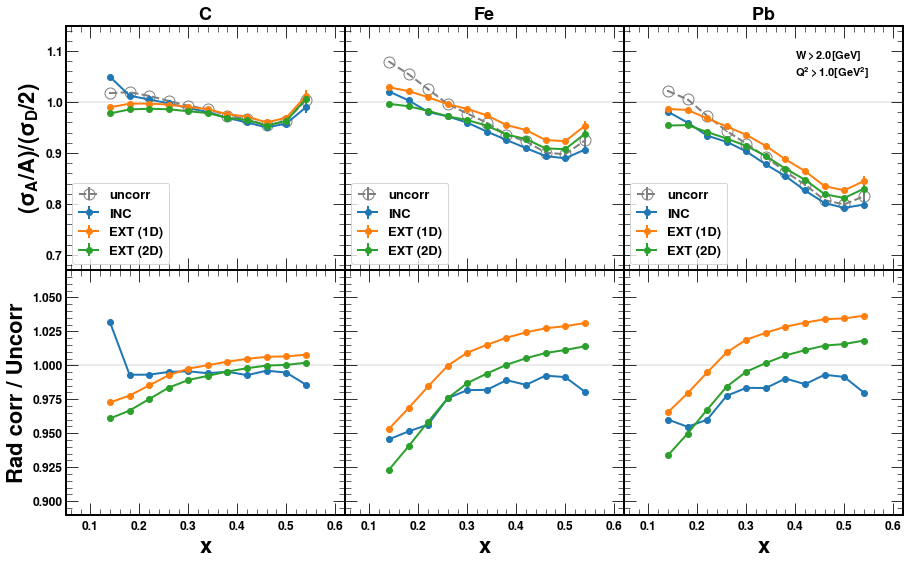

In [49]:
###this is a comparison of the EMC and the Ratio Coor/uncorr for W>1.8, Q2>1.5. 
###In the comparison I have INCLUSIVE, EXTERNAL 1D, EXTERNAL 2D

fig, axs = plt.subplots(2, 3,sharex=True, sharey=False,figsize=(15,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0][0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1][0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[0][1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1][1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[0][2].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1][2].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )

for target in ['C']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                           = get_ST_LT_arrays_w20_q210(target)
    x_tmp_RCi,y_tmp_RCi,err_tmp_RCi, d1i, d2i = applyRC_w20_q210_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe1,y_tmp_RCe1,err_tmp_RCe1, d1e1, d2e1 = applyRC_w20_q210_1D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe2,y_tmp_RCe2,err_tmp_RCe2, d1e2, d2e2 = applyRC_w20_q210_2D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0][0].errorbar(x_tmp,y_tmp,yerr=err_tmp,
                    lw=2,fmt='--o',fillstyle='none', ms=11,color='gray' , label="uncorr" )     
    axs[0][0].errorbar(x_tmp,y_tmp_RCi,yerr=err_tmp_RCi,
                    lw=2,fmt='-o',label="INC", color=colors['C']  )
    axs[1][0].errorbar(x_tmp,y_tmp_RCi / y_tmp ,yerr=0,
                    lw=2,fmt='-o', color=colors['C'] , label="INC"  ) 
    axs[0][0].errorbar(x_tmp,y_tmp_RCe1,
                       yerr=err_tmp_RCe1,lw=2,fmt='-o',label="EXT (1D)"  , color=colors['Fe']) 
    axs[1][0].errorbar(x_tmp,y_tmp_RCe1 / y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (1D)" , color=colors['Fe'] )      
    axs[0][0].errorbar(x_tmp,y_tmp_RCe2,
                       yerr=err_tmp_RCe2,lw=2,fmt='-o',label="EXT (2D)"  , color=colors['Pb']) 
    axs[1][0].errorbar(x_tmp, y_tmp_RCe2/y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (2D)"  , color=colors['Pb']) 
    
for target in ['Fe']:
    
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                           = get_ST_LT_arrays_w20_q210(target)
    x_tmp_RCi,y_tmp_RCi,err_tmp_RCi, d1i, d2i = applyRC_w20_q210_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe1,y_tmp_RCe1,err_tmp_RCe1, d1e1, d2e1 = applyRC_w20_q210_1D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe2,y_tmp_RCe2,err_tmp_RCe2, d1e2, d2e2 = applyRC_w20_q210_2D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0][1].errorbar(x_tmp,y_tmp,yerr=err_tmp,
                    lw=2,fmt='--o',fillstyle='none', ms=11,color='gray' , label="uncorr" )     
    axs[0][1].errorbar(x_tmp,y_tmp_RCi,yerr=err_tmp_RCi,
                    lw=2,fmt='-o',label="INC", color=colors['C']  )
    axs[1][1].errorbar(x_tmp,y_tmp_RCi / y_tmp ,yerr=0,
                    lw=2,fmt='-o', color=colors['C'] , label="INC"  ) 
    axs[0][1].errorbar(x_tmp,y_tmp_RCe1,
                       yerr=err_tmp_RCe1,lw=2,fmt='-o',label="EXT (1D)"  , color=colors['Fe']) 
    axs[1][1].errorbar(x_tmp,y_tmp_RCe1 / y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (1D)" , color=colors['Fe'] )      
    axs[0][1].errorbar(x_tmp,y_tmp_RCe2,
                       yerr=err_tmp_RCe2,lw=2,fmt='-o',label="EXT (2D)"  , color=colors['Pb']) 
    axs[1][1].errorbar(x_tmp, y_tmp_RCe2/y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (2D)"  , color=colors['Pb'])     


for target in ['Pb']:
    
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                           = get_ST_LT_arrays_w20_q210(target)
    x_tmp_RCi,y_tmp_RCi,err_tmp_RCi, d1i, d2i = applyRC_w20_q210_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe1,y_tmp_RCe1,err_tmp_RCe1, d1e1, d2e1 = applyRC_w20_q210_1D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_RCe2,y_tmp_RCe2,err_tmp_RCe2, d1e2, d2e2 = applyRC_w20_q210_2D_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0][2].errorbar(x_tmp,y_tmp,yerr=err_tmp,
                    lw=2,fmt='--o',fillstyle='none', ms=11,color='gray' , label="uncorr" )     
    axs[0][2].errorbar(x_tmp,y_tmp_RCi,yerr=err_tmp_RCi,
                    lw=2,fmt='-o',label="INC", color=colors['C']  )
    axs[1][2].errorbar(x_tmp,y_tmp_RCi / y_tmp ,yerr=0,
                    lw=2,fmt='-o', color=colors['C'] , label="INC"  ) 
    axs[0][2].errorbar(x_tmp,y_tmp_RCe1,
                       yerr=err_tmp_RCe1,lw=2,fmt='-o',label="EXT (1D)"  , color=colors['Fe']) 
    axs[1][2].errorbar(x_tmp,y_tmp_RCe1 / y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (1D)" , color=colors['Fe'] )      
    axs[0][2].errorbar(x_tmp,y_tmp_RCe2,
                       yerr=err_tmp_RCe2,lw=2,fmt='-o',label="EXT (2D)"  , color=colors['Pb']) 
    axs[1][2].errorbar(x_tmp, y_tmp_RCe2/y_tmp ,
                       yerr=0,lw=2,fmt='-o' ,label="EXT (2D)"  , color=colors['Pb'])     
    
       
axs[0][0].set_ylim([0.67,1.15])
axs[0][1].set_ylim([0.67,1.15])
axs[0][2].set_ylim([0.67,1.15])

axs[0][0].set_xlim([0.05,0.62])
axs[0][1].set_xlim([0.05,0.62])
axs[0][2].set_xlim([0.05,0.62])

axs[1][0].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[1][1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[1][2].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")

axs[0][0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1][0].yaxis.set_label_text('Rad corr / Uncorr' ,fontsize=22, fontweight="bold")


axs[0][0].legend(loc='best',ncol=1,frameon=True,fontsize=13)
axs[0][1].legend(loc='best',ncol=1,frameon=True,fontsize=13)
axs[0][2].legend(loc='best',ncol=1,frameon=True,fontsize=13)

fig.text(0.8, 0.82, '$ W >2.0 [GeV]$ \n$Q^{2}>1.0 [GeV^2]$', fontsize=11, va='center', fontweight="bold")

axs[0][0].tick_params(axis='both', which='major', labelsize=12)

axs[1][0].tick_params(axis='both', which='major', labelsize=12)
axs[1][0].tick_params(axis='both', which='minor', labelsize=12)

axs[1][1].tick_params(axis='x', which='major', labelsize=12)
axs[1][1].tick_params(axis='y', which='major', labelsize=0)

axs[1][2].tick_params(axis='x', which='major', labelsize=12)
axs[1][2].tick_params(axis='y', which='major', labelsize=0)

axs[0][1].tick_params(axis='y', which='major', labelsize=0)
axs[0][2].tick_params(axis='y', which='major', labelsize=0)

axs[1][0].set_ylim([0.89,1.07])
axs[1][1].set_ylim([0.89,1.07])
axs[1][2].set_ylim([0.89,1.07])

axs[0,0].set_title('$C$',fontsize=18,fontweight="bold")
axs[0,1].set_title('$Fe$',fontsize=18,fontweight="bold")
axs[0,2].set_title('$Pb$',fontsize=18,fontweight="bold")

plt.savefig('EMC_Cor_to_Unc_w20_q210_INCL_EXT_comp.pdf', bbox_inches='tight')
plt.savefig('EMC_Cor_to_Unc_w20_q210_INCL_EXT_comp.png', bbox_inches='tight')


plt.show()


# INCLUDING COULOMB CORRECTIONS

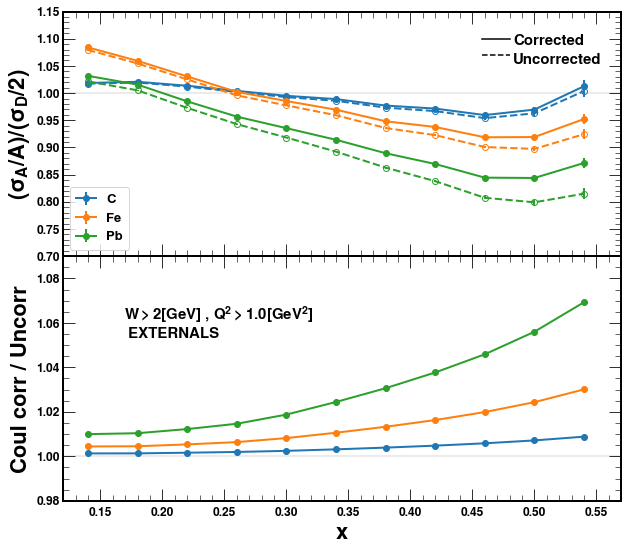

In [30]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                           = get_ST_LT_arrays_w20_q210(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, d1, d2 = applyCC_w20_q210_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0].errorbar(x_tmp,y_tmp_CC,yerr=err_tmp_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.98,1.09])
axs[0].set_xlim([0.12,0.57])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>2 [GeV]$ , $Q^{2}>1.0 [GeV^2]$\n EXTERNALS', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_CoulCor_to_Unc_w20_q210_EXTERNALS.pdf', bbox_inches='tight')
plt.savefig('EMC_CoulCor_to_Unc_w20_q210_EXTERNALS.png', bbox_inches='tight')


plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

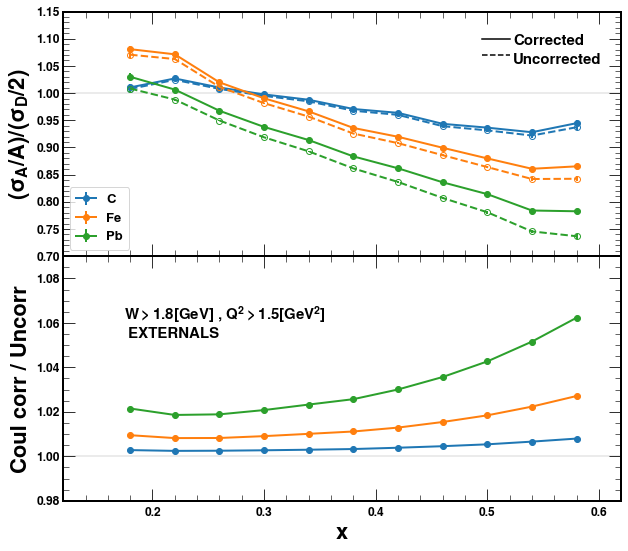

In [31]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                           = get_ST_LT_arrays_w18_q215(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, d1, d2 = applyCC_w18_q215_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0].errorbar(x_tmp,y_tmp_CC,yerr=err_tmp_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.98,1.09])
axs[0].set_xlim([0.12,0.62])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>1.8 [GeV]$ , $Q^{2}>1.5 [GeV^2]$\n EXTERNALS', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_CoulCor_to_Unc_w18_q215_EXTERNALS.pdf', bbox_inches='tight')
plt.savefig('EMC_CoulCor_to_Unc_w18_q215_EXTERNALS.png', bbox_inches='tight')


plt.show()


INC CC

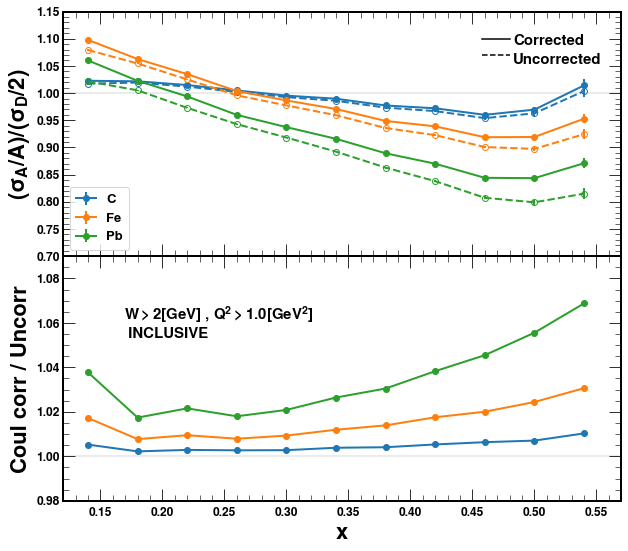

In [32]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                           = get_ST_LT_arrays_w20_q210(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, d1, d2 = applyCC_w20_q210_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0].errorbar(x_tmp,y_tmp_CC,yerr=err_tmp_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.98,1.09])
axs[0].set_xlim([0.12,0.57])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>2 [GeV]$ , $Q^{2}>1.0 [GeV^2]$\n INCLUSIVE', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_CoulCor_to_Unc_w20_q210_INCLUSIVE.pdf', bbox_inches='tight')
plt.savefig('EMC_CoulCor_to_Unc_w20_q210_INCLUSIVE.png', bbox_inches='tight')


plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

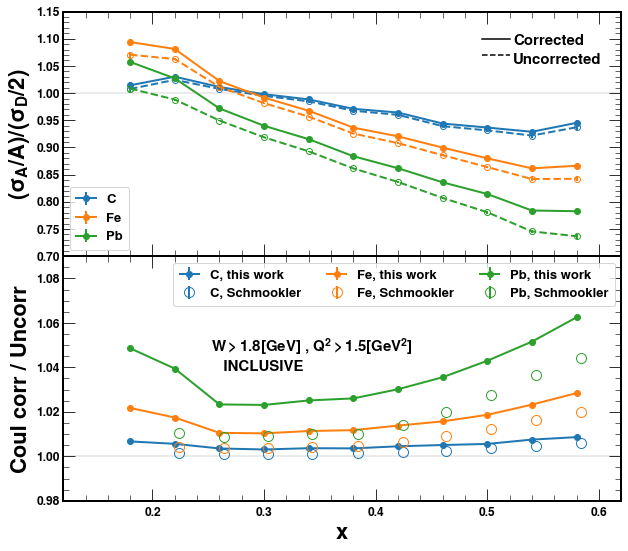

In [33]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                  = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                           = get_ST_LT_arrays_w18_q215(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, d1, d2 = applyCC_w18_q215_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0].errorbar(x_tmp,y_tmp_CC,yerr=err_tmp_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp,y_tmp_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target],
                    label="%s, this work"%target  ) 
    axs[1].errorbar(CC_effect_Barak['x'],CC_effect_Barak['%stoD2ratio'%target],yerr=0,
                 lw=2,fmt='o',fillstyle='none',label="%s, Schmookler"%target, color=colors[target],ms=10  ) 
    
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.98,1.09])
axs[0].set_xlim([0.12,0.62])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)
axs[1].legend(loc='best',ncol=3,frameon=True,fontsize=13)

fig.text(0.33, 0.35, '$W>1.8 [GeV]$ , $Q^{2}>1.5 [GeV^2]$\n   INCLUSIVE', fontsize=15, va='center', 
         fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_CoulCor_to_Unc_w18_q215_INCLUSIVE.pdf', bbox_inches='tight')
plt.savefig('EMC_CoulCor_to_Unc_w18_q215_INCLUSIVE.png', bbox_inches='tight')


plt.show()


# Comparison INC/EXT for Coulomb Corrections

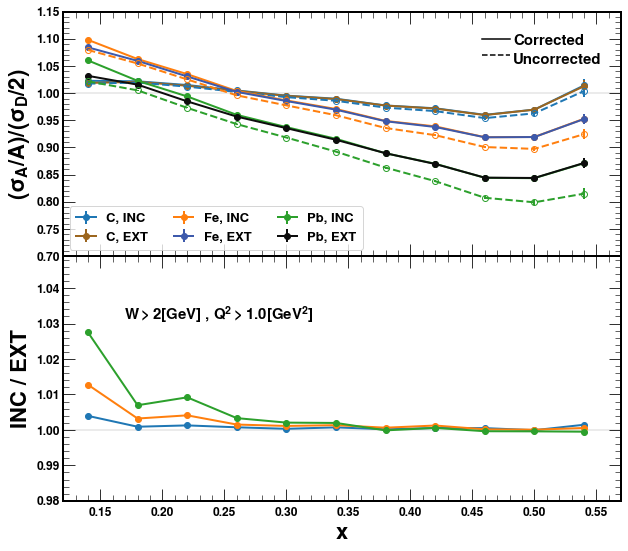

In [34]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                       = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                                = get_ST_LT_arrays_w20_q210(target)
    x_tmp_CCi,y_tmp_CCi,err_tmp_CCi, d1i, d2i = applyCC_w20_q210_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_CCe,y_tmp_CCe,err_tmp_CCe, d1e, d2e = applyCC_w20_q210_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0].errorbar(x_tmp,y_tmp_CCi,yerr=err_tmp_CCi,lw=2,fmt='-o',label="%s, INC"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp_CCe,yerr=err_tmp_CCe,lw=2,fmt='-o',label="%s, EXT"%target, color=colors2[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    
    axs[1].errorbar(x_tmp,y_tmp_CCi / y_tmp_CCe ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.98,1.049])
axs[0].set_xlim([0.12,0.57])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('INC / EXT' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=3,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>2 [GeV]$ , $Q^{2}>1.0 [GeV^2]$\n', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_CoulCorINC_to_EXT_w20_q210.pdf', bbox_inches='tight')
plt.savefig('EMC_CoulCorINC_to_EXT_w20_q210.png', bbox_inches='tight')


plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

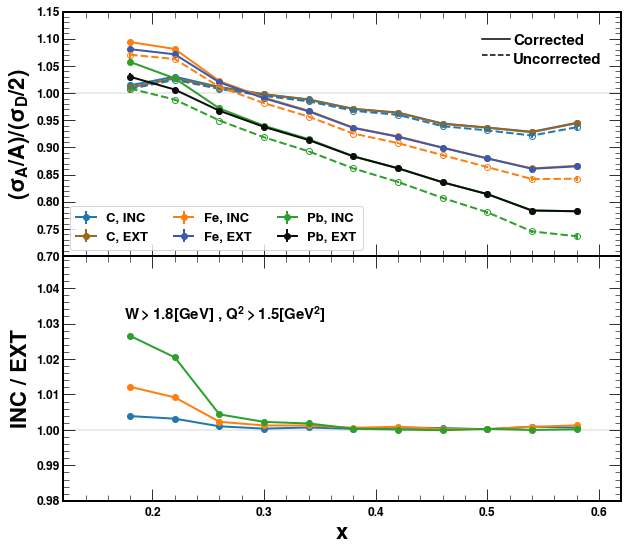

In [35]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                       = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                                = get_ST_LT_arrays_w18_q215(target)
    x_tmp_CCi,y_tmp_CCi,err_tmp_CCi, d1i, d2i = applyCC_w18_q215_INC( x_tmp , y_st , y_lt ,err_tmp ,target )
    x_tmp_CCe,y_tmp_CCe,err_tmp_CCe, d1e, d2e = applyCC_w18_q215_EXT( x_tmp , y_st , y_lt ,err_tmp ,target )
    
    axs[0].errorbar(x_tmp,y_tmp_CCi,yerr=err_tmp_CCi,lw=2,fmt='-o',label="%s, INC"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp_CCe,yerr=err_tmp_CCe,lw=2,fmt='-o',label="%s, EXT"%target, color=colors2[target]  ) 
    axs[0].errorbar(x_tmp,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    
    axs[1].errorbar(x_tmp,y_tmp_CCi / y_tmp_CCe ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.98,1.049])
axs[0].set_xlim([0.12,0.62])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('INC / EXT' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=3,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>1.8 [GeV]$ , $Q^{2}>1.5 [GeV^2]$\n', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_CoulCorINC_to_EXT_w18_q215.pdf', bbox_inches='tight')
plt.savefig('EMC_CoulCorINC_to_EXT_w18_q215.png', bbox_inches='tight')


plt.show()


# RC + CC 

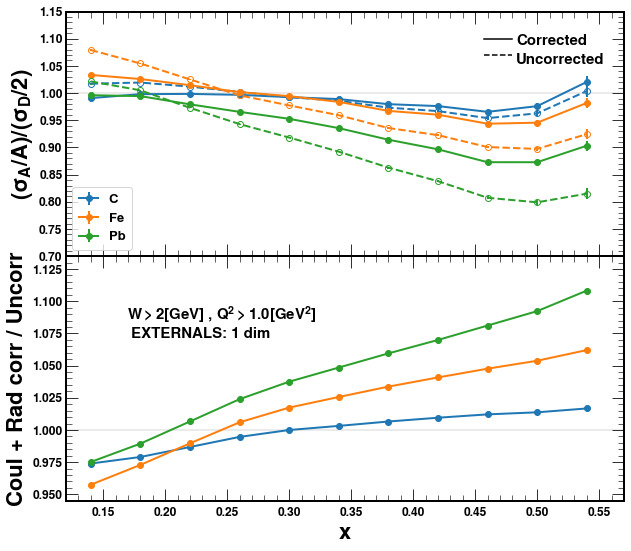

In [36]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                           = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                                    = get_ST_LT_arrays_w20_q210(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, st_CC, lt_CC    = applyCC_w20_q210_EXT( x_tmp , y_st , y_lt ,err_tmp,target )
    x_tmp_RC_CC,y_tmp_RC_CC,err_tmp_RC_CC, d1, d2 = applyRC_w20_q210_1D_EXT( x_tmp_CC,st_CC,lt_CC,err_tmp,target )
    
    axs[0].errorbar(x_tmp_RC_CC,y_tmp_RC_CC,yerr=err_tmp_RC_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp_RC_CC,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp_RC_CC,y_tmp_RC_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
    
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.945,1.135])
axs[0].set_xlim([0.12,0.57])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul + Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>2 [GeV]$ , $Q^{2}>1.0 [GeV^2]$\n EXTERNALS: 1 dim', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w20_q210_EXTERNALS_1D.pdf', bbox_inches='tight')
plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w20_q210_EXTERNALS_1D.png', bbox_inches='tight')


plt.show()


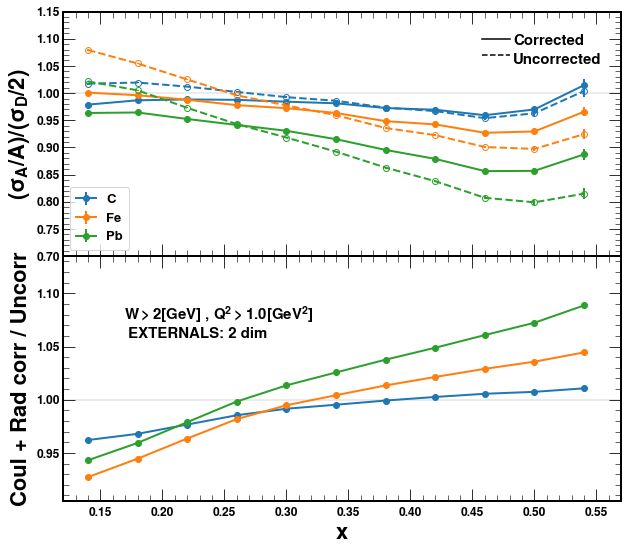

In [37]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                           = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                                    = get_ST_LT_arrays_w20_q210(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, st_CC, lt_CC    = applyCC_w20_q210_EXT( x_tmp , y_st , y_lt ,err_tmp,target )
    x_tmp_RC_CC,y_tmp_RC_CC,err_tmp_RC_CC, d1, d2 = applyRC_w20_q210_2D_EXT( x_tmp_CC,st_CC,lt_CC,err_tmp,target )
    
    axs[0].errorbar(x_tmp_RC_CC,y_tmp_RC_CC,yerr=err_tmp_RC_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp_RC_CC,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp_RC_CC,y_tmp_RC_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.905,1.135])
axs[0].set_xlim([0.12,0.57])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul + Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>2 [GeV]$ , $Q^{2}>1.0 [GeV^2]$\n EXTERNALS: 2 dim', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w20_q210_EXTERNALS_2D.pdf', bbox_inches='tight')
plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w20_q210_EXTERNALS_2D.png', bbox_inches='tight')


plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

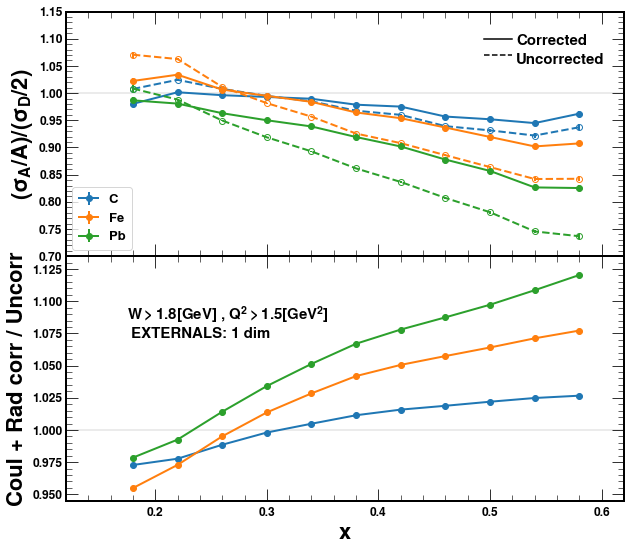

In [38]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                           = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                                    = get_ST_LT_arrays_w18_q215(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, st_CC, lt_CC    = applyCC_w18_q215_EXT( x_tmp , y_st , y_lt ,err_tmp,target )
    x_tmp_RC_CC,y_tmp_RC_CC,err_tmp_RC_CC, d1, d2 = applyRC_w18_q215_1D_EXT(x_tmp_CC,st_CC,lt_CC,err_tmp,target)
    
    axs[0].errorbar(x_tmp_RC_CC,y_tmp_RC_CC,yerr=err_tmp_RC_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp_RC_CC,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp_RC_CC,y_tmp_RC_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
    
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.945,1.135])
axs[0].set_xlim([0.12,0.62])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul + Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>1.8 [GeV]$ , $Q^{2}>1.5 [GeV^2]$\n EXTERNALS: 1 dim', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w18_q215_EXTERNALS_1D.pdf', bbox_inches='tight')
plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w18_q215_EXTERNALS_1D.png', bbox_inches='tight')


plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

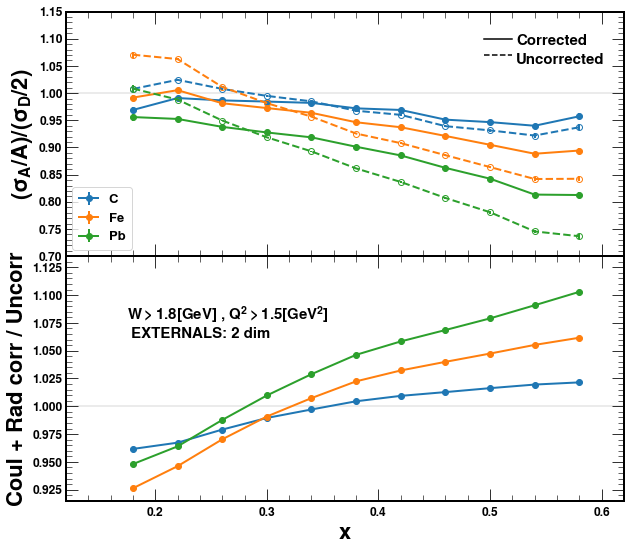

In [39]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                           = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                                    = get_ST_LT_arrays_w18_q215(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, st_CC, lt_CC    = applyCC_w18_q215_EXT( x_tmp , y_st , y_lt ,err_tmp,target )
    x_tmp_RC_CC,y_tmp_RC_CC,err_tmp_RC_CC, d1, d2 = applyRC_w18_q215_2D_EXT(x_tmp_CC,st_CC,lt_CC,err_tmp,target)
    
    axs[0].errorbar(x_tmp_RC_CC,y_tmp_RC_CC,yerr=err_tmp_RC_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp_RC_CC,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp_RC_CC,y_tmp_RC_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
    
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.915,1.135])
axs[0].set_xlim([0.12,0.62])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul + Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>1.8 [GeV]$ , $Q^{2}>1.5 [GeV^2]$\n EXTERNALS: 2 dim', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w18_q215_EXTERNALS_2D.pdf', bbox_inches='tight')
plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w18_q215_EXTERNALS_2D.png', bbox_inches='tight')


plt.show()


# now using INC

<ipython-input-20-13e6d14844e7>:77: RuntimeWarning: divide by zero encountered in divide
  arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_Inclusive_RC_w20_q210'%target]) )
<ipython-input-20-13e6d14844e7>:77: RuntimeWarning: invalid value encountered in multiply
  arr_ST =  np.multiply( y_tmp_ST, (1.0/y['%s_Inclusive_RC_w20_q210'%target]) )
<ipython-input-20-13e6d14844e7>:80: RuntimeWarning: divide by zero encountered in divide
  arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_Inclusive_RC_w20_q210']) )
<ipython-input-20-13e6d14844e7>:80: RuntimeWarning: invalid value encountered in multiply
  arr_LT =  np.multiply( y_tmp_LT, (1.0/y['D_Inclusive_RC_w20_q210']) )


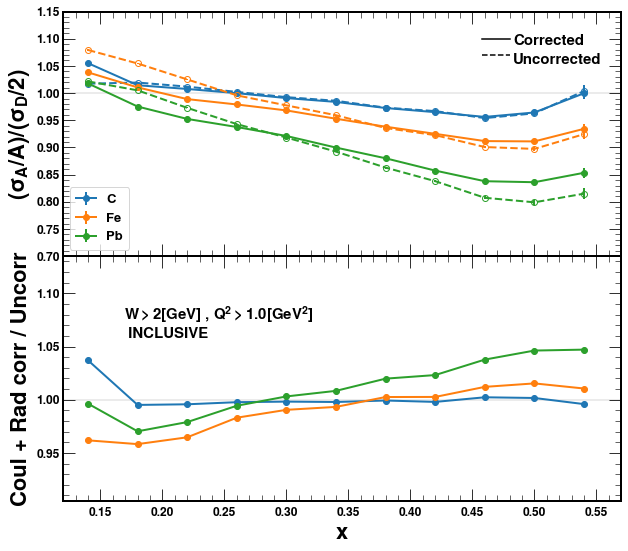

In [40]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                           = get_EMC_Unc_w20_q210(target)
    y_st, y_lt                                    = get_ST_LT_arrays_w20_q210(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, st_CC, lt_CC    = applyCC_w20_q210_INC( x_tmp , y_st , y_lt ,err_tmp,target )
    x_tmp_RC_CC,y_tmp_RC_CC,err_tmp_RC_CC, d1, d2 = applyRC_w20_q210_INC( x_tmp_CC,st_CC,lt_CC,err_tmp,target )
    
    axs[0].errorbar(x_tmp_RC_CC,y_tmp_RC_CC,yerr=err_tmp_RC_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp_RC_CC,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp_RC_CC,y_tmp_RC_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.905,1.135])
axs[0].set_xlim([0.12,0.57])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul + Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>2 [GeV]$ , $Q^{2}>1.0 [GeV^2]$\n INCLUSIVE', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w20_q210_INCLUSIVE.pdf', bbox_inches='tight')
plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w20_q210_INCLUSIVE.png', bbox_inches='tight')


plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

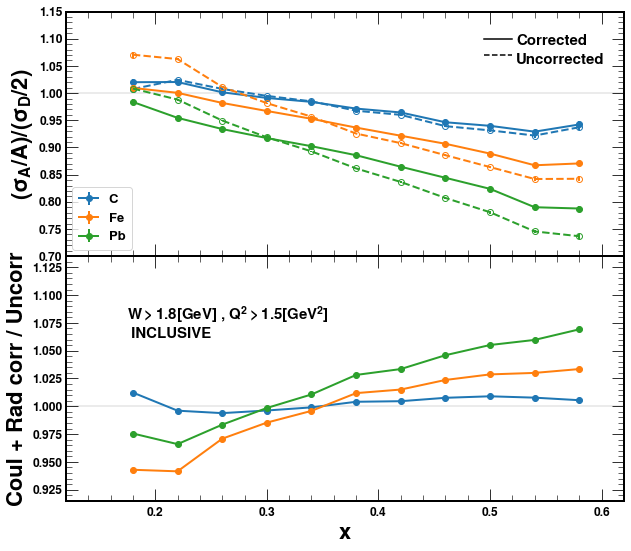

In [41]:

fig, axs = plt.subplots(2, 1,sharex=True, sharey=False,figsize=(10,9),gridspec_kw={'hspace': 0, 'wspace':0})

axs[0].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
axs[1].axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                           = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                                    = get_ST_LT_arrays_w18_q215(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, st_CC, lt_CC    = applyCC_w18_q215_INC( x_tmp , y_st , y_lt ,err_tmp,target )
    x_tmp_RC_CC,y_tmp_RC_CC,err_tmp_RC_CC, d1, d2 = applyRC_w18_q215_INC(x_tmp_CC,st_CC,lt_CC,err_tmp,target)
    
    axs[0].errorbar(x_tmp_RC_CC,y_tmp_RC_CC,yerr=err_tmp_RC_CC,lw=2,fmt='-o',label="%s"%target, color=colors[target]  ) 
    axs[0].errorbar(x_tmp_RC_CC,y_tmp,yerr=err_tmp,lw=2,fmt='--o',fillstyle='none', color=colors[target]  ) 
    axs[1].errorbar(x_tmp_RC_CC,y_tmp_RC_CC / y_tmp ,yerr=0,lw=2,fmt='-o', color=colors[target]  ) 
    
    
axs[0].set_ylim([0.7,1.15])
axs[1].set_ylim([0.915,1.135])
axs[0].set_xlim([0.12,0.62])
axs[1].xaxis.set_label_text('$x$',fontsize=22, fontweight="bold")
axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$' ,fontsize=22, fontweight="bold")
axs[1].yaxis.set_label_text('Coul + Rad corr / Uncorr' ,fontsize=22, fontweight="bold")
axs[0].legend(loc='lower left',ncol=1,frameon=True,fontsize=13)

fig.text(0.21, 0.4, '$W>1.8 [GeV]$ , $Q^{2}>1.5 [GeV^2]$\n INCLUSIVE', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.835, 'Corrected', fontsize=15, va='center', fontweight="bold")
fig.text(0.75, 0.805, 'Uncorrected', fontsize=15, va='center', fontweight="bold")

axs[0].axhline(y = 1.1, color = 'black', linestyle = '-'  , xmin = 0.75, xmax = 0.8)
axs[0].axhline(y = 1.07, color = 'black', linestyle = '--' , xmin = 0.75, xmax = 0.8)

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='minor', labelsize=12)

plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w18_q215_INCLUSIVE.pdf', bbox_inches='tight')
plt.savefig('EMC_Coul_Rad_Cor_to_Unc_w18_q215_INCLUSIVE.png', bbox_inches='tight')


plt.show()


# Fitting process (extraction of EMC slopes)

In [42]:
import scipy.optimize

<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

parameters for C are:
[-0.27250802  1.07526196]
errors for C are:
[[ 1.62013208e-04 -5.53387815e-05]
 [-5.53387815e-05  1.99885418e-05]]
parameters for Fe are:
[-0.39239862  1.08545177]
errors for Fe are:
[[ 4.27508925e-05 -1.47966153e-05]
 [-1.47966153e-05  5.40614260e-06]]
parameters for Pb are:
[-0.46325209  1.05739053]
errors for Pb are:
[[ 2.86348951e-04 -9.89710850e-05]
 [-9.89710850e-05  3.61412859e-05]]


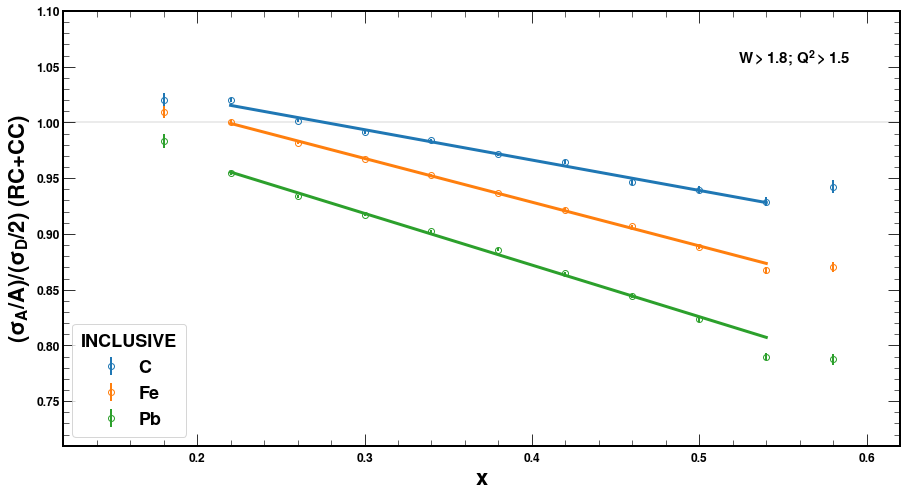

In [44]:
fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                           = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                                    = get_ST_LT_arrays_w18_q215(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, st_CC, lt_CC    = applyCC_w18_q215_INC( x_tmp , y_st , y_lt ,err_tmp,target )
    x_tmp_RC_CC,y_tmp_RC_CC,err_tmp_RC_CC, d1, d2 = applyRC_w18_q215_INC(x_tmp_CC,st_CC,lt_CC,err_tmp,target)
    
    plt.errorbar(x_tmp_RC_CC,y_tmp_RC_CC,yerr=err_tmp_RC_CC,lw=2,fmt='o',label="%s"%target, 
                    color=colors[target], fillstyle='none'  ) 
    
    x2=x_tmp[2:11]
    y2=y_tmp_RC_CC[2:11]
    err= err_tmp[2:11]
    
    popt, pcov = scipy.optimize.curve_fit(f, x2,y2, sigma=err ,p0=(-0.5,1))
    plt.plot(x2, f(x2, *popt), lw=3)
    print('parameters for %s are:'%target)
    print(popt)
    print('errors for %s are:'%target)
    print(pcov)    
    
    
fig.text(0.75, 0.8, '$W>1.8$; $Q^{2}>1.5$', fontsize=15, va='center', fontweight="bold")
    
    
plt.ylim([0.71,1.1])
plt.xlim([0.12,0.62])

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.xlabel('$x$',fontsize=22, loc='center', fontweight="bold")
plt.ylabel('$(\sigma_{A}/A)/(\sigma_{D}/2)$ (RC+CC)',fontsize=22, loc='center', fontweight="bold")
plt.legend(loc='best',ncol=1,frameon=True,fontsize=18, title='INCLUSIVE'  , title_fontsize=18)
plt.savefig('EMC_fit_w18_q210_INC_RC_CC.pdf', bbox_inches='tight')
plt.savefig('EMC_fit_w18_q210_INC_RC_CC.png', bbox_inches='tight')


plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

parameters for C are:
[-0.1541035   1.02926332]
errors for C are:
[[ 3.42436934e-04 -1.16966034e-04]
 [-1.16966034e-04  4.22484990e-05]]
parameters for Fe are:
[-0.33064057  1.07283971]
errors for Fe are:
[[ 2.52234062e-04 -8.73013416e-05]
 [-8.73013416e-05  3.18967192e-05]]
parameters for Pb are:
[-0.38528454  1.04291808]
errors for Pb are:
[[ 7.35196062e-04 -2.54106578e-04]
 [-2.54106578e-04  9.27921372e-05]]


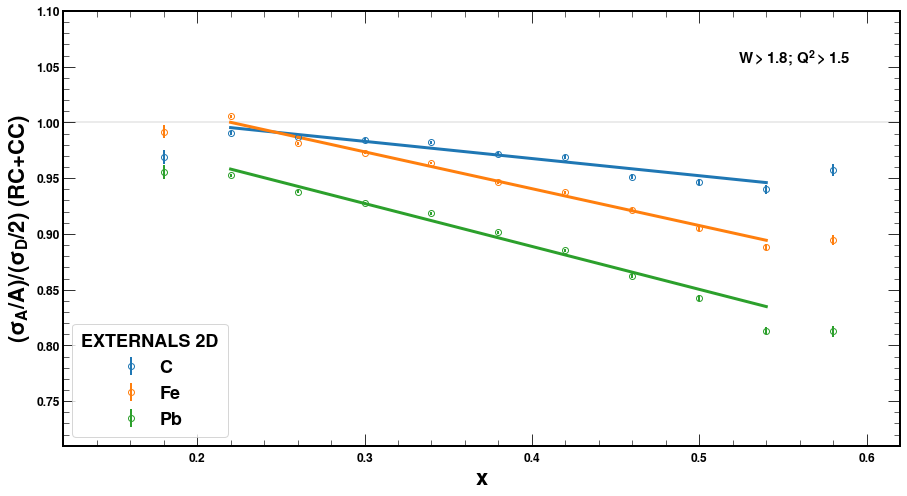

In [45]:
fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                           = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                                    = get_ST_LT_arrays_w18_q215(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, st_CC, lt_CC    = applyCC_w18_q215_EXT( x_tmp , y_st , y_lt ,err_tmp,target )
    x_tmp_RC_CC,y_tmp_RC_CC,err_tmp_RC_CC, d1, d2 = applyRC_w18_q215_2D_EXT(x_tmp_CC,st_CC,lt_CC,err_tmp,target)
    
    plt.errorbar(x_tmp_RC_CC,y_tmp_RC_CC,yerr=err_tmp_RC_CC,lw=2,fmt='o',label="%s"%target, 
                    color=colors[target], fillstyle='none'  ) 
    x2=x_tmp[2:11]
    y2=y_tmp_RC_CC[2:11]
    err= err_tmp[2:11]
    
    popt, pcov = scipy.optimize.curve_fit(f, x2,y2, sigma=err ,p0=(-0.5,1))
    plt.plot(x2, f(x2, *popt), lw=3)
    print('parameters for %s are:'%target)
    print(popt)
    print('errors for %s are:'%target)
    print(pcov)    
    
    
fig.text(0.75, 0.8, '$W>1.8$; $Q^{2}>1.5$', fontsize=15, va='center', fontweight="bold")
    
    
plt.ylim([0.71,1.1])
plt.xlim([0.12,0.62])

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.xlabel('$x$',fontsize=22, loc='center', fontweight="bold")
plt.ylabel('$(\sigma_{A}/A)/(\sigma_{D}/2)$ (RC+CC)',fontsize=22, loc='center', fontweight="bold")
plt.legend(loc='best',ncol=1,frameon=True,fontsize=18, title='EXTERNALS 2D'  , title_fontsize=18)

plt.savefig('EMC_fit_w18_q210_EXT_2D_RC_CC.pdf', bbox_inches='tight')
plt.savefig('EMC_fit_w18_q210_EXT_2D_RC_CC.png', bbox_inches='tight')

plt.show()


<ipython-input-17-461559fa8870>:23: RuntimeWarning: invalid value encountered in divide
  y_tmp   = (sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))/sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)))*(norm)
<ipython-input-17-461559fa8870>:24: RuntimeWarning: invalid value encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-input-17-461559fa8870>:24: RuntimeWarning: divide by zero encountered in divide
  err_tmp = norm*(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12)) / sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12)) ) * np.sqrt( 1./(sumColumn(y['%s_EMC_raw_ST_w18_q215'%target].reshape(13,12))) + 1./(sumColumn(y['%s_EMC_raw_LT_w18_q215'%target].reshape(13,12))) )
<ipython-i

parameters for C are:
[-0.17372773  1.0437886 ]
errors for C are:
[[ 3.02843694e-04 -1.03442186e-04]
 [-1.03442186e-04  3.73636420e-05]]
parameters for Fe are:
[-0.37993661  1.11045362]
errors for Fe are:
[[ 2.59613254e-04 -8.98553719e-05]
 [-8.98553719e-05  3.28298688e-05]]
parameters for Pb are:
[-0.4353328  1.0807027]
errors for Pb are:
[[ 5.54282372e-04 -1.91577194e-04]
 [-1.91577194e-04  6.99582735e-05]]


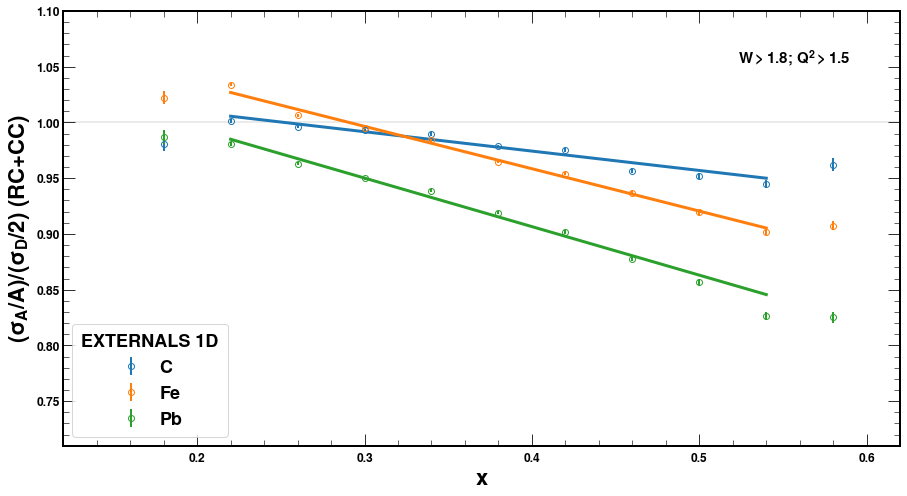

In [46]:
fig = plt.figure(figsize=(15,8))
plt.axhline(y=1.0,color='black',linestyle='-', alpha=0.1 )
for target in ['C', 'Fe', 'Pb']:
    x_tmp,y_tmp,err_tmp                           = get_EMC_Unc_w18_q215(target)
    y_st, y_lt                                    = get_ST_LT_arrays_w18_q215(target)
    x_tmp_CC,y_tmp_CC,err_tmp_CC, st_CC, lt_CC    = applyCC_w18_q215_EXT( x_tmp , y_st , y_lt ,err_tmp,target )
    x_tmp_RC_CC,y_tmp_RC_CC,err_tmp_RC_CC, d1, d2 = applyRC_w18_q215_1D_EXT(x_tmp_CC,st_CC,lt_CC,err_tmp,target)
    
    plt.errorbar(x_tmp_RC_CC,y_tmp_RC_CC,yerr=err_tmp_RC_CC,lw=2,fmt='o',label="%s"%target, 
                    color=colors[target], fillstyle='none'  ) 
    
    x2=x_tmp[2:11]
    y2=y_tmp_RC_CC[2:11]
    err= err_tmp[2:11]
    popt, pcov = scipy.optimize.curve_fit(f, x2,y2, sigma=err ,p0=(-0.5,1))
    plt.plot(x2, f(x2, *popt), lw=3)
    print('parameters for %s are:'%target)
    print(popt)
    print('errors for %s are:'%target)
    print(pcov)    
    
    
fig.text(0.75, 0.8, '$W>1.8$; $Q^{2}>1.5$', fontsize=15, va='center', fontweight="bold")
    
    
plt.ylim([0.71,1.1])
plt.xlim([0.12,0.62])

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.xlabel('$x$',fontsize=22, loc='center', fontweight="bold")
plt.ylabel('$(\sigma_{A}/A)/(\sigma_{D}/2)$ (RC+CC)',fontsize=22, loc='center', fontweight="bold")
plt.legend(loc='best',ncol=1,frameon=True,fontsize=18, title='EXTERNALS 1D'  , title_fontsize=18)

plt.savefig('EMC_fit_w18_q210_EXT_1D_RC_CC.pdf', bbox_inches='tight')
plt.savefig('EMC_fit_w18_q210_EXT_1D_RC_CC.png', bbox_inches='tight')

plt.show()


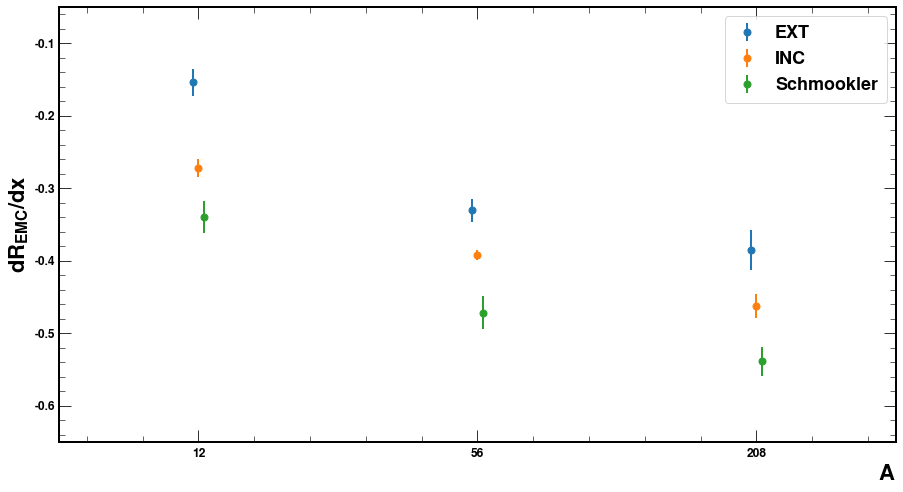

In [47]:
slopes={}
                                    ##   C           Fe          Pb
slopes['EXT_w18_q215'] = np.array([-0.1541035 , -0.33064057 , -0.38528454 ])
slopes['EXT_w18_q215_err'] = np.array([ 3.42436934e-04,2.52234062e-04,7.35196062e-04  ])

slopes['INC_w18_q215'] = np.array([ -0.272429 , -0.39202143,-0.46232261 ])
slopes['INC_w18_q215_err'] = np.array([1.61939674e-04,4.26985501e-05 , 2.85290751e-04  ])

slopes['barak'] = np.array([-0.340 , -0.472 , -0.539 ])
slopes['barak_err'] = np.array([0.022 , 0.023 , 0.020 ])

x_pos= np.array([1,2,3])

fig = plt.figure(figsize=(15,8))
plt.errorbar(x_pos-0.02,slopes['EXT_w18_q215'] , yerr = np.sqrt(slopes['EXT_w18_q215_err']),  lw=2,fmt='o', 
             fillstyle='full' , label='EXT', ms=7 )
plt.errorbar(x_pos,slopes['INC_w18_q215'] , yerr = np.sqrt(slopes['INC_w18_q215_err']),  lw=2,fmt='o', 
             fillstyle='full', label='INC' , ms=7 )
plt.errorbar(x_pos+0.02,slopes['barak'] , yerr = slopes['barak_err'],  lw=2,fmt='o', 
             fillstyle='full', label='Schmookler' , ms=7 )


my_xticks = ['12','56', '208']
plt.xticks(x_pos, my_xticks,fontsize=55)
plt.legend(loc='best',ncol=1,frameon=True,fontsize=18, title_fontsize=18)    
plt.ylim([-0.65,-0.05])
plt.xlim([0.5,3.5])


plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.xlabel('$A$',fontsize=22, loc='right', fontweight="bold")
plt.ylabel('$d R_{EMC}/dx$',fontsize=22, loc='center', fontweight="bold")

plt.savefig('EMC_slopesComparison_w18_q210_Barak.pdf', bbox_inches='tight')
plt.savefig('EMC_slopesComparison_w18_q210_Barak.png', bbox_inches='tight')

plt.show()


In [ ]:
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

y_test = np.array([1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
predic = np.array([1,2,4,3,5, 1,2,4,3,5, 1,2,3,4,4])

columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

confm = confusion_matrix(y_test, predic)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)


plt.matshow( y['Fe_external_w18_q215_2Dim_RC'].reshape(12,11)   )
plt.colorbar()
plt.show()
